In [22]:
from torch.utils.data import DataLoader
import math
from sentence_transformers import SentenceTransformer, LoggingHandler, losses, util, InputExample
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
import logging
from datetime import datetime
import os
import gzip
import csv
import pandas as pd

dataset_path = 'from_all_entries_shuffled.tsv'

writer_positive_asc = pd.ExcelWriter('sorted_by_diff/positive_asc.xlsx', engine='xlsxwriter')
writer_positive_des = pd.ExcelWriter('sorted_by_diff/positive_des.xlsx', engine='xlsxwriter')
writer_negative_asc = pd.ExcelWriter('sorted_by_diff/negative_asc.xlsx', engine='xlsxwriter')
writer_negative_des = pd.ExcelWriter('sorted_by_diff/negative_des.xlsx', engine='xlsxwriter')
writer_all_entries = pd.ExcelWriter('sorted_by_diff/Negative_all_term_diff.xlsx', engine='xlsxwriter')

positive_pairs = []
negative_pairs = []

flag = 1

fine_model = SentenceTransformer('fine-tuned_model/fine-tuning-distilroberta-base-paraphrase-v1-2021-05-10_14-17-46')
base_model = SentenceTransformer('distilroberta-base-paraphrase-v1')

with open(dataset_path, 'rt', encoding='utf8') as fIn:
    reader = csv.DictReader(fIn, delimiter='\t', quoting=csv.QUOTE_NONE)
    for row in reader:
        
        #Compute embedding for both lists
        embeddings1 = base_model.encode(row['sentence1'], convert_to_tensor=True)
        embeddings2 = base_model.encode(row['sentence2'], convert_to_tensor=True)

        #Compute cosine-similarits
        cosine_score_base = util.pytorch_cos_sim(embeddings1, embeddings2)

        #Compute embedding for both lists
        embeddings3 = fine_model.encode(row['sentence1'], convert_to_tensor=True)
        embeddings4 = fine_model.encode(row['sentence2'], convert_to_tensor=True)

        #Compute cosine-similarits
        cosine_score_fine = util.pytorch_cos_sim(embeddings3, embeddings4)

        row['Base_model'] = float(cosine_score_base)
        row['Fine_model'] = float(cosine_score_fine)
        row['difference'] = float(abs(cosine_score_base-cosine_score_fine))
        
        print(str(round((flag/136392)*100,3))+'% completed')
        flag=flag+1
                    
        if row['score'] == '1.0':    
            positive_pairs.append(row)
        elif row['score'] == '0.0':
            negative_pairs.append(row)
                     
ascending = pd.DataFrame(negative_pairs).sort_values(by=['difference'])
ascending.to_excel(writer_all_entries, sheet_name='Negative_all_pairs_diff',index=False) 
writer_all_entries.save()

'''
ascending = ascending.head(5000)
descending = pd.DataFrame(positive_pairs).sort_values(by=['difference'], ascending=False)
descending = descending.head(5000)
ascending.to_excel(writer_positive_asc, sheet_name='Positive_pairs_ascending',index=False) 
descending.to_excel(writer_positive_des, sheet_name='Positive_pairs_descending',index=False) 

ascending_ = pd.DataFrame(negative_pairs).sort_values(by=['difference'])
ascending_ = ascending_.head(5000)
descending_ = pd.DataFrame(negative_pairs).sort_values(by=['difference'], ascending=False)
descending_ = descending_.head(5000)
ascending_.to_excel(writer_negative_asc, sheet_name='Negative_pairs_ascending',index=False) 
descending_.to_excel(writer_negative_des, sheet_name='Negative_pairs_descending',index=False) 


writer_positive_asc.save()
writer_positive_des.save()
writer_negative_asc.save()
writer_negative_des.save()'''


0.001% completed
0.001% completed
0.002% completed
0.003% completed
0.004% completed
0.004% completed
0.005% completed
0.006% completed
0.007% completed
0.007% completed
0.008% completed
0.009% completed
0.01% completed
0.01% completed
0.011% completed
0.012% completed
0.012% completed
0.013% completed
0.014% completed
0.015% completed
0.015% completed
0.016% completed
0.017% completed
0.018% completed
0.018% completed
0.019% completed
0.02% completed
0.021% completed
0.021% completed
0.022% completed
0.023% completed
0.023% completed
0.024% completed
0.025% completed
0.026% completed
0.026% completed
0.027% completed
0.028% completed
0.029% completed
0.029% completed
0.03% completed
0.031% completed
0.032% completed
0.032% completed
0.033% completed
0.034% completed
0.034% completed
0.035% completed
0.036% completed
0.037% completed
0.037% completed
0.038% completed
0.039% completed
0.04% completed
0.04% completed
0.041% completed
0.042% completed
0.043% completed
0.043% completed
0.0

0.359% completed
0.36% completed
0.361% completed
0.361% completed
0.362% completed
0.363% completed
0.364% completed
0.364% completed
0.365% completed
0.366% completed
0.367% completed
0.367% completed
0.368% completed
0.369% completed
0.37% completed
0.37% completed
0.371% completed
0.372% completed
0.372% completed
0.373% completed
0.374% completed
0.375% completed
0.375% completed
0.376% completed
0.377% completed
0.378% completed
0.378% completed
0.379% completed
0.38% completed
0.381% completed
0.381% completed
0.382% completed
0.383% completed
0.383% completed
0.384% completed
0.385% completed
0.386% completed
0.386% completed
0.387% completed
0.388% completed
0.389% completed
0.389% completed
0.39% completed
0.391% completed
0.392% completed
0.392% completed
0.393% completed
0.394% completed
0.394% completed
0.395% completed
0.396% completed
0.397% completed
0.397% completed
0.398% completed
0.399% completed
0.4% completed
0.4% completed
0.401% completed
0.402% completed
0.403%

1.07% completed
1.071% completed
1.072% completed
1.073% completed
1.073% completed
1.074% completed
1.075% completed
1.076% completed
1.076% completed
1.077% completed
1.078% completed
1.079% completed
1.079% completed
1.08% completed
1.081% completed
1.081% completed
1.082% completed
1.083% completed
1.084% completed
1.084% completed
1.085% completed
1.086% completed
1.087% completed
1.087% completed
1.088% completed
1.089% completed
1.09% completed
1.09% completed
1.091% completed
1.092% completed
1.092% completed
1.093% completed
1.094% completed
1.095% completed
1.095% completed
1.096% completed
1.097% completed
1.098% completed
1.098% completed
1.099% completed
1.1% completed
1.101% completed
1.101% completed
1.102% completed
1.103% completed
1.103% completed
1.104% completed
1.105% completed
1.106% completed
1.106% completed
1.107% completed
1.108% completed
1.109% completed
1.109% completed
1.11% completed
1.111% completed
1.112% completed
1.112% completed
1.113% completed
1.11

1.43% completed
1.43% completed
1.431% completed
1.432% completed
1.433% completed
1.433% completed
1.434% completed
1.435% completed
1.436% completed
1.436% completed
1.437% completed
1.438% completed
1.439% completed
1.439% completed
1.44% completed
1.441% completed
1.441% completed
1.442% completed
1.443% completed
1.444% completed
1.444% completed
1.445% completed
1.446% completed
1.447% completed
1.447% completed
1.448% completed
1.449% completed
1.449% completed
1.45% completed
1.451% completed
1.452% completed
1.452% completed
1.453% completed
1.454% completed
1.455% completed
1.455% completed
1.456% completed
1.457% completed
1.458% completed
1.458% completed
1.459% completed
1.46% completed
1.46% completed
1.461% completed
1.462% completed
1.463% completed
1.463% completed
1.464% completed
1.465% completed
1.466% completed
1.466% completed
1.467% completed
1.468% completed
1.469% completed
1.469% completed
1.47% completed
1.471% completed
1.471% completed
1.472% completed
1.47

1.79% completed
1.791% completed
1.792% completed
1.793% completed
1.793% completed
1.794% completed
1.795% completed
1.796% completed
1.796% completed
1.797% completed
1.798% completed
1.798% completed
1.799% completed
1.8% completed
1.801% completed
1.801% completed
1.802% completed
1.803% completed
1.804% completed
1.804% completed
1.805% completed
1.806% completed
1.807% completed
1.807% completed
1.808% completed
1.809% completed
1.809% completed
1.81% completed
1.811% completed
1.812% completed
1.812% completed
1.813% completed
1.814% completed
1.815% completed
1.815% completed
1.816% completed
1.817% completed
1.818% completed
1.818% completed
1.819% completed
1.82% completed
1.82% completed
1.821% completed
1.822% completed
1.823% completed
1.823% completed
1.824% completed
1.825% completed
1.826% completed
1.826% completed
1.827% completed
1.828% completed
1.829% completed
1.829% completed
1.83% completed
1.831% completed
1.831% completed
1.832% completed
1.833% completed
1.83

2.148% completed
2.149% completed
2.15% completed
2.15% completed
2.151% completed
2.152% completed
2.153% completed
2.153% completed
2.154% completed
2.155% completed
2.156% completed
2.156% completed
2.157% completed
2.158% completed
2.158% completed
2.159% completed
2.16% completed
2.161% completed
2.161% completed
2.162% completed
2.163% completed
2.164% completed
2.164% completed
2.165% completed
2.166% completed
2.167% completed
2.167% completed
2.168% completed
2.169% completed
2.169% completed
2.17% completed
2.171% completed
2.172% completed
2.172% completed
2.173% completed
2.174% completed
2.175% completed
2.175% completed
2.176% completed
2.177% completed
2.178% completed
2.178% completed
2.179% completed
2.18% completed
2.18% completed
2.181% completed
2.182% completed
2.183% completed
2.183% completed
2.184% completed
2.185% completed
2.186% completed
2.186% completed
2.187% completed
2.188% completed
2.189% completed
2.189% completed
2.19% completed
2.191% completed
2.19

2.507% completed
2.508% completed
2.509% completed
2.51% completed
2.51% completed
2.511% completed
2.512% completed
2.513% completed
2.513% completed
2.514% completed
2.515% completed
2.516% completed
2.516% completed
2.517% completed
2.518% completed
2.518% completed
2.519% completed
2.52% completed
2.521% completed
2.521% completed
2.522% completed
2.523% completed
2.524% completed
2.524% completed
2.525% completed
2.526% completed
2.527% completed
2.527% completed
2.528% completed
2.529% completed
2.529% completed
2.53% completed
2.531% completed
2.532% completed
2.532% completed
2.533% completed
2.534% completed
2.535% completed
2.535% completed
2.536% completed
2.537% completed
2.538% completed
2.538% completed
2.539% completed
2.54% completed
2.54% completed
2.541% completed
2.542% completed
2.543% completed
2.543% completed
2.544% completed
2.545% completed
2.546% completed
2.546% completed
2.547% completed
2.548% completed
2.549% completed
2.549% completed
2.55% completed
2.55

2.865% completed
2.866% completed
2.867% completed
2.867% completed
2.868% completed
2.869% completed
2.87% completed
2.87% completed
2.871% completed
2.872% completed
2.873% completed
2.873% completed
2.874% completed
2.875% completed
2.876% completed
2.876% completed
2.877% completed
2.878% completed
2.878% completed
2.879% completed
2.88% completed
2.881% completed
2.881% completed
2.882% completed
2.883% completed
2.884% completed
2.884% completed
2.885% completed
2.886% completed
2.887% completed
2.887% completed
2.888% completed
2.889% completed
2.889% completed
2.89% completed
2.891% completed
2.892% completed
2.892% completed
2.893% completed
2.894% completed
2.895% completed
2.895% completed
2.896% completed
2.897% completed
2.898% completed
2.898% completed
2.899% completed
2.9% completed
2.9% completed
2.901% completed
2.902% completed
2.903% completed
2.903% completed
2.904% completed
2.905% completed
2.906% completed
2.906% completed
2.907% completed
2.908% completed
2.909

3.223% completed
3.224% completed
3.225% completed
3.225% completed
3.226% completed
3.227% completed
3.227% completed
3.228% completed
3.229% completed
3.23% completed
3.23% completed
3.231% completed
3.232% completed
3.233% completed
3.233% completed
3.234% completed
3.235% completed
3.236% completed
3.236% completed
3.237% completed
3.238% completed
3.238% completed
3.239% completed
3.24% completed
3.241% completed
3.241% completed
3.242% completed
3.243% completed
3.244% completed
3.244% completed
3.245% completed
3.246% completed
3.247% completed
3.247% completed
3.248% completed
3.249% completed
3.249% completed
3.25% completed
3.251% completed
3.252% completed
3.252% completed
3.253% completed
3.254% completed
3.255% completed
3.255% completed
3.256% completed
3.257% completed
3.258% completed
3.258% completed
3.259% completed
3.26% completed
3.26% completed
3.261% completed
3.262% completed
3.263% completed
3.263% completed
3.264% completed
3.265% completed
3.266% completed
3.2

3.582% completed
3.583% completed
3.584% completed
3.585% completed
3.585% completed
3.586% completed
3.587% completed
3.587% completed
3.588% completed
3.589% completed
3.59% completed
3.59% completed
3.591% completed
3.592% completed
3.593% completed
3.593% completed
3.594% completed
3.595% completed
3.596% completed
3.596% completed
3.597% completed
3.598% completed
3.598% completed
3.599% completed
3.6% completed
3.601% completed
3.601% completed
3.602% completed
3.603% completed
3.604% completed
3.604% completed
3.605% completed
3.606% completed
3.607% completed
3.607% completed
3.608% completed
3.609% completed
3.609% completed
3.61% completed
3.611% completed
3.612% completed
3.612% completed
3.613% completed
3.614% completed
3.615% completed
3.615% completed
3.616% completed
3.617% completed
3.618% completed
3.618% completed
3.619% completed
3.62% completed
3.62% completed
3.621% completed
3.622% completed
3.623% completed
3.623% completed
3.624% completed
3.625% completed
3.62

3.944% completed
3.945% completed
3.945% completed
3.946% completed
3.947% completed
3.947% completed
3.948% completed
3.949% completed
3.95% completed
3.95% completed
3.951% completed
3.952% completed
3.953% completed
3.953% completed
3.954% completed
3.955% completed
3.956% completed
3.956% completed
3.957% completed
3.958% completed
3.958% completed
3.959% completed
3.96% completed
3.961% completed
3.961% completed
3.962% completed
3.963% completed
3.964% completed
3.964% completed
3.965% completed
3.966% completed
3.967% completed
3.967% completed
3.968% completed
3.969% completed
3.969% completed
3.97% completed
3.971% completed
3.972% completed
3.972% completed
3.973% completed
3.974% completed
3.975% completed
3.975% completed
3.976% completed
3.977% completed
3.978% completed
3.978% completed
3.979% completed
3.98% completed
3.98% completed
3.981% completed
3.982% completed
3.983% completed
3.983% completed
3.984% completed
3.985% completed
3.986% completed
3.986% completed
3.9

4.305% completed
4.305% completed
4.306% completed
4.307% completed
4.307% completed
4.308% completed
4.309% completed
4.31% completed
4.31% completed
4.311% completed
4.312% completed
4.313% completed
4.313% completed
4.314% completed
4.315% completed
4.316% completed
4.316% completed
4.317% completed
4.318% completed
4.318% completed
4.319% completed
4.32% completed
4.321% completed
4.321% completed
4.322% completed
4.323% completed
4.324% completed
4.324% completed
4.325% completed
4.326% completed
4.327% completed
4.327% completed
4.328% completed
4.329% completed
4.329% completed
4.33% completed
4.331% completed
4.332% completed
4.332% completed
4.333% completed
4.334% completed
4.335% completed
4.335% completed
4.336% completed
4.337% completed
4.337% completed
4.338% completed
4.339% completed
4.34% completed
4.34% completed
4.341% completed
4.342% completed
4.343% completed
4.343% completed
4.344% completed
4.345% completed
4.346% completed
4.346% completed
4.347% completed
4.3

4.661% completed
4.662% completed
4.662% completed
4.663% completed
4.664% completed
4.664% completed
4.665% completed
4.666% completed
4.667% completed
4.667% completed
4.668% completed
4.669% completed
4.67% completed
4.67% completed
4.671% completed
4.672% completed
4.673% completed
4.673% completed
4.674% completed
4.675% completed
4.675% completed
4.676% completed
4.677% completed
4.678% completed
4.678% completed
4.679% completed
4.68% completed
4.681% completed
4.681% completed
4.682% completed
4.683% completed
4.684% completed
4.684% completed
4.685% completed
4.686% completed
4.686% completed
4.687% completed
4.688% completed
4.689% completed
4.689% completed
4.69% completed
4.691% completed
4.692% completed
4.692% completed
4.693% completed
4.694% completed
4.695% completed
4.695% completed
4.696% completed
4.697% completed
4.697% completed
4.698% completed
4.699% completed
4.7% completed
4.7% completed
4.701% completed
4.702% completed
4.703% completed
4.703% completed
4.704

5.019% completed
5.02% completed
5.021% completed
5.022% completed
5.022% completed
5.023% completed
5.024% completed
5.024% completed
5.025% completed
5.026% completed
5.027% completed
5.027% completed
5.028% completed
5.029% completed
5.03% completed
5.03% completed
5.031% completed
5.032% completed
5.033% completed
5.033% completed
5.034% completed
5.035% completed
5.035% completed
5.036% completed
5.037% completed
5.038% completed
5.038% completed
5.039% completed
5.04% completed
5.041% completed
5.041% completed
5.042% completed
5.043% completed
5.044% completed
5.044% completed
5.045% completed
5.046% completed
5.046% completed
5.047% completed
5.048% completed
5.049% completed
5.049% completed
5.05% completed
5.051% completed
5.052% completed
5.052% completed
5.053% completed
5.054% completed
5.055% completed
5.055% completed
5.056% completed
5.057% completed
5.057% completed
5.058% completed
5.059% completed
5.06% completed
5.06% completed
5.061% completed
5.062% completed
5.06

5.378% completed
5.379% completed
5.379% completed
5.38% completed
5.381% completed
5.382% completed
5.382% completed
5.383% completed
5.384% completed
5.384% completed
5.385% completed
5.386% completed
5.387% completed
5.387% completed
5.388% completed
5.389% completed
5.39% completed
5.39% completed
5.391% completed
5.392% completed
5.393% completed
5.393% completed
5.394% completed
5.395% completed
5.395% completed
5.396% completed
5.397% completed
5.398% completed
5.398% completed
5.399% completed
5.4% completed
5.401% completed
5.401% completed
5.402% completed
5.403% completed
5.404% completed
5.404% completed
5.405% completed
5.406% completed
5.406% completed
5.407% completed
5.408% completed
5.409% completed
5.409% completed
5.41% completed
5.411% completed
5.412% completed
5.412% completed
5.413% completed
5.414% completed
5.415% completed
5.415% completed
5.416% completed
5.417% completed
5.417% completed
5.418% completed
5.419% completed
5.42% completed
5.42% completed
5.421

5.736% completed
5.736% completed
5.737% completed
5.738% completed
5.739% completed
5.739% completed
5.74% completed
5.741% completed
5.742% completed
5.742% completed
5.743% completed
5.744% completed
5.744% completed
5.745% completed
5.746% completed
5.747% completed
5.747% completed
5.748% completed
5.749% completed
5.75% completed
5.75% completed
5.751% completed
5.752% completed
5.753% completed
5.753% completed
5.754% completed
5.755% completed
5.755% completed
5.756% completed
5.757% completed
5.758% completed
5.758% completed
5.759% completed
5.76% completed
5.761% completed
5.761% completed
5.762% completed
5.763% completed
5.764% completed
5.764% completed
5.765% completed
5.766% completed
5.766% completed
5.767% completed
5.768% completed
5.769% completed
5.769% completed
5.77% completed
5.771% completed
5.772% completed
5.772% completed
5.773% completed
5.774% completed
5.775% completed
5.775% completed
5.776% completed
5.777% completed
5.777% completed
5.778% completed
5.

6.093% completed
6.094% completed
6.095% completed
6.096% completed
6.096% completed
6.097% completed
6.098% completed
6.099% completed
6.099% completed
6.1% completed
6.101% completed
6.102% completed
6.102% completed
6.103% completed
6.104% completed
6.104% completed
6.105% completed
6.106% completed
6.107% completed
6.107% completed
6.108% completed
6.109% completed
6.11% completed
6.11% completed
6.111% completed
6.112% completed
6.113% completed
6.113% completed
6.114% completed
6.115% completed
6.115% completed
6.116% completed
6.117% completed
6.118% completed
6.118% completed
6.119% completed
6.12% completed
6.121% completed
6.121% completed
6.122% completed
6.123% completed
6.124% completed
6.124% completed
6.125% completed
6.126% completed
6.126% completed
6.127% completed
6.128% completed
6.129% completed
6.129% completed
6.13% completed
6.131% completed
6.132% completed
6.132% completed
6.133% completed
6.134% completed
6.135% completed
6.135% completed
6.136% completed
6.1

6.452% completed
6.453% completed
6.453% completed
6.454% completed
6.455% completed
6.456% completed
6.456% completed
6.457% completed
6.458% completed
6.459% completed
6.459% completed
6.46% completed
6.461% completed
6.462% completed
6.462% completed
6.463% completed
6.464% completed
6.464% completed
6.465% completed
6.466% completed
6.467% completed
6.467% completed
6.468% completed
6.469% completed
6.47% completed
6.47% completed
6.471% completed
6.472% completed
6.473% completed
6.473% completed
6.474% completed
6.475% completed
6.475% completed
6.476% completed
6.477% completed
6.478% completed
6.478% completed
6.479% completed
6.48% completed
6.481% completed
6.481% completed
6.482% completed
6.483% completed
6.484% completed
6.484% completed
6.485% completed
6.486% completed
6.486% completed
6.487% completed
6.488% completed
6.489% completed
6.489% completed
6.49% completed
6.491% completed
6.492% completed
6.492% completed
6.493% completed
6.494% completed
6.495% completed
6.

6.81% completed
6.811% completed
6.811% completed
6.812% completed
6.813% completed
6.813% completed
6.814% completed
6.815% completed
6.816% completed
6.816% completed
6.817% completed
6.818% completed
6.819% completed
6.819% completed
6.82% completed
6.821% completed
6.822% completed
6.822% completed
6.823% completed
6.824% completed
6.824% completed
6.825% completed
6.826% completed
6.827% completed
6.827% completed
6.828% completed
6.829% completed
6.83% completed
6.83% completed
6.831% completed
6.832% completed
6.833% completed
6.833% completed
6.834% completed
6.835% completed
6.835% completed
6.836% completed
6.837% completed
6.838% completed
6.838% completed
6.839% completed
6.84% completed
6.841% completed
6.841% completed
6.842% completed
6.843% completed
6.844% completed
6.844% completed
6.845% completed
6.846% completed
6.846% completed
6.847% completed
6.848% completed
6.849% completed
6.849% completed
6.85% completed
6.851% completed
6.852% completed
6.852% completed
6.8

7.166% completed
7.167% completed
7.168% completed
7.168% completed
7.169% completed
7.17% completed
7.171% completed
7.171% completed
7.172% completed
7.173% completed
7.173% completed
7.174% completed
7.175% completed
7.176% completed
7.176% completed
7.177% completed
7.178% completed
7.179% completed
7.179% completed
7.18% completed
7.181% completed
7.182% completed
7.182% completed
7.183% completed
7.184% completed
7.184% completed
7.185% completed
7.186% completed
7.187% completed
7.187% completed
7.188% completed
7.189% completed
7.19% completed
7.19% completed
7.191% completed
7.192% completed
7.193% completed
7.193% completed
7.194% completed
7.195% completed
7.195% completed
7.196% completed
7.197% completed
7.198% completed
7.198% completed
7.199% completed
7.2% completed
7.201% completed
7.201% completed
7.202% completed
7.203% completed
7.204% completed
7.204% completed
7.205% completed
7.206% completed
7.206% completed
7.207% completed
7.208% completed
7.209% completed
7.2

7.525% completed
7.526% completed
7.527% completed
7.528% completed
7.528% completed
7.529% completed
7.53% completed
7.531% completed
7.531% completed
7.532% completed
7.533% completed
7.533% completed
7.534% completed
7.535% completed
7.536% completed
7.536% completed
7.537% completed
7.538% completed
7.539% completed
7.539% completed
7.54% completed
7.541% completed
7.541% completed
7.542% completed
7.543% completed
7.544% completed
7.544% completed
7.545% completed
7.546% completed
7.547% completed
7.547% completed
7.548% completed
7.549% completed
7.55% completed
7.55% completed
7.551% completed
7.552% completed
7.552% completed
7.553% completed
7.554% completed
7.555% completed
7.555% completed
7.556% completed
7.557% completed
7.558% completed
7.558% completed
7.559% completed
7.56% completed
7.561% completed
7.561% completed
7.562% completed
7.563% completed
7.563% completed
7.564% completed
7.565% completed
7.566% completed
7.566% completed
7.567% completed
7.568% completed
7.

7.886% completed
7.887% completed
7.888% completed
7.888% completed
7.889% completed
7.89% completed
7.89% completed
7.891% completed
7.892% completed
7.893% completed
7.893% completed
7.894% completed
7.895% completed
7.896% completed
7.896% completed
7.897% completed
7.898% completed
7.899% completed
7.899% completed
7.9% completed
7.901% completed
7.901% completed
7.902% completed
7.903% completed
7.904% completed
7.904% completed
7.905% completed
7.906% completed
7.907% completed
7.907% completed
7.908% completed
7.909% completed
7.91% completed
7.91% completed
7.911% completed
7.912% completed
7.912% completed
7.913% completed
7.914% completed
7.915% completed
7.915% completed
7.916% completed
7.917% completed
7.918% completed
7.918% completed
7.919% completed
7.92% completed
7.921% completed
7.921% completed
7.922% completed
7.923% completed
7.923% completed
7.924% completed
7.925% completed
7.926% completed
7.926% completed
7.927% completed
7.928% completed
7.929% completed
7.92

8.243% completed
8.244% completed
8.245% completed
8.245% completed
8.246% completed
8.247% completed
8.248% completed
8.248% completed
8.249% completed
8.25% completed
8.25% completed
8.251% completed
8.252% completed
8.253% completed
8.253% completed
8.254% completed
8.255% completed
8.256% completed
8.256% completed
8.257% completed
8.258% completed
8.259% completed
8.259% completed
8.26% completed
8.261% completed
8.261% completed
8.262% completed
8.263% completed
8.264% completed
8.264% completed
8.265% completed
8.266% completed
8.267% completed
8.267% completed
8.268% completed
8.269% completed
8.27% completed
8.27% completed
8.271% completed
8.272% completed
8.272% completed
8.273% completed
8.274% completed
8.275% completed
8.275% completed
8.276% completed
8.277% completed
8.278% completed
8.278% completed
8.279% completed
8.28% completed
8.281% completed
8.281% completed
8.282% completed
8.283% completed
8.283% completed
8.284% completed
8.285% completed
8.286% completed
8.2

8.602% completed
8.602% completed
8.603% completed
8.604% completed
8.605% completed
8.605% completed
8.606% completed
8.607% completed
8.608% completed
8.608% completed
8.609% completed
8.61% completed
8.61% completed
8.611% completed
8.612% completed
8.613% completed
8.613% completed
8.614% completed
8.615% completed
8.616% completed
8.616% completed
8.617% completed
8.618% completed
8.619% completed
8.619% completed
8.62% completed
8.621% completed
8.621% completed
8.622% completed
8.623% completed
8.624% completed
8.624% completed
8.625% completed
8.626% completed
8.627% completed
8.627% completed
8.628% completed
8.629% completed
8.63% completed
8.63% completed
8.631% completed
8.632% completed
8.632% completed
8.633% completed
8.634% completed
8.635% completed
8.635% completed
8.636% completed
8.637% completed
8.638% completed
8.638% completed
8.639% completed
8.64% completed
8.641% completed
8.641% completed
8.642% completed
8.643% completed
8.643% completed
8.644% completed
8.6

8.958% completed
8.959% completed
8.959% completed
8.96% completed
8.961% completed
8.962% completed
8.962% completed
8.963% completed
8.964% completed
8.965% completed
8.965% completed
8.966% completed
8.967% completed
8.968% completed
8.968% completed
8.969% completed
8.97% completed
8.97% completed
8.971% completed
8.972% completed
8.973% completed
8.973% completed
8.974% completed
8.975% completed
8.976% completed
8.976% completed
8.977% completed
8.978% completed
8.979% completed
8.979% completed
8.98% completed
8.981% completed
8.981% completed
8.982% completed
8.983% completed
8.984% completed
8.984% completed
8.985% completed
8.986% completed
8.987% completed
8.987% completed
8.988% completed
8.989% completed
8.99% completed
8.99% completed
8.991% completed
8.992% completed
8.992% completed
8.993% completed
8.994% completed
8.995% completed
8.995% completed
8.996% completed
8.997% completed
8.998% completed
8.998% completed
8.999% completed
9.0% completed
9.001% completed
9.001

9.317% completed
9.317% completed
9.318% completed
9.319% completed
9.319% completed
9.32% completed
9.321% completed
9.322% completed
9.322% completed
9.323% completed
9.324% completed
9.325% completed
9.325% completed
9.326% completed
9.327% completed
9.328% completed
9.328% completed
9.329% completed
9.33% completed
9.33% completed
9.331% completed
9.332% completed
9.333% completed
9.333% completed
9.334% completed
9.335% completed
9.336% completed
9.336% completed
9.337% completed
9.338% completed
9.339% completed
9.339% completed
9.34% completed
9.341% completed
9.341% completed
9.342% completed
9.343% completed
9.344% completed
9.344% completed
9.345% completed
9.346% completed
9.347% completed
9.347% completed
9.348% completed
9.349% completed
9.35% completed
9.35% completed
9.351% completed
9.352% completed
9.352% completed
9.353% completed
9.354% completed
9.355% completed
9.355% completed
9.356% completed
9.357% completed
9.358% completed
9.358% completed
9.359% completed
9.3

9.678% completed
9.679% completed
9.679% completed
9.68% completed
9.681% completed
9.682% completed
9.682% completed
9.683% completed
9.684% completed
9.685% completed
9.685% completed
9.686% completed
9.687% completed
9.688% completed
9.688% completed
9.689% completed
9.69% completed
9.69% completed
9.691% completed
9.692% completed
9.693% completed
9.693% completed
9.694% completed
9.695% completed
9.696% completed
9.696% completed
9.697% completed
9.698% completed
9.699% completed
9.699% completed
9.7% completed
9.701% completed
9.701% completed
9.702% completed
9.703% completed
9.704% completed
9.704% completed
9.705% completed
9.706% completed
9.707% completed
9.707% completed
9.708% completed
9.709% completed
9.71% completed
9.71% completed
9.711% completed
9.712% completed
9.712% completed
9.713% completed
9.714% completed
9.715% completed
9.715% completed
9.716% completed
9.717% completed
9.718% completed
9.718% completed
9.719% completed
9.72% completed
9.721% completed
9.721

10.036% completed
10.037% completed
10.037% completed
10.038% completed
10.039% completed
10.039% completed
10.04% completed
10.041% completed
10.042% completed
10.042% completed
10.043% completed
10.044% completed
10.045% completed
10.045% completed
10.046% completed
10.047% completed
10.048% completed
10.048% completed
10.049% completed
10.05% completed
10.05% completed
10.051% completed
10.052% completed
10.053% completed
10.053% completed
10.054% completed
10.055% completed
10.056% completed
10.056% completed
10.057% completed
10.058% completed
10.059% completed
10.059% completed
10.06% completed
10.061% completed
10.061% completed
10.062% completed
10.063% completed
10.064% completed
10.064% completed
10.065% completed
10.066% completed
10.067% completed
10.067% completed
10.068% completed
10.069% completed
10.07% completed
10.07% completed
10.071% completed
10.072% completed
10.072% completed
10.073% completed
10.074% completed
10.075% completed
10.075% completed
10.076% complete

10.373% completed
10.374% completed
10.375% completed
10.375% completed
10.376% completed
10.377% completed
10.377% completed
10.378% completed
10.379% completed
10.38% completed
10.38% completed
10.381% completed
10.382% completed
10.383% completed
10.383% completed
10.384% completed
10.385% completed
10.386% completed
10.386% completed
10.387% completed
10.388% completed
10.388% completed
10.389% completed
10.39% completed
10.391% completed
10.391% completed
10.392% completed
10.393% completed
10.394% completed
10.394% completed
10.395% completed
10.396% completed
10.397% completed
10.397% completed
10.398% completed
10.399% completed
10.399% completed
10.4% completed
10.401% completed
10.402% completed
10.402% completed
10.403% completed
10.404% completed
10.405% completed
10.405% completed
10.406% completed
10.407% completed
10.408% completed
10.408% completed
10.409% completed
10.41% completed
10.41% completed
10.411% completed
10.412% completed
10.413% completed
10.413% completed

10.714% completed
10.715% completed
10.715% completed
10.716% completed
10.717% completed
10.718% completed
10.718% completed
10.719% completed
10.72% completed
10.721% completed
10.721% completed
10.722% completed
10.723% completed
10.724% completed
10.724% completed
10.725% completed
10.726% completed
10.726% completed
10.727% completed
10.728% completed
10.729% completed
10.729% completed
10.73% completed
10.731% completed
10.732% completed
10.732% completed
10.733% completed
10.734% completed
10.735% completed
10.735% completed
10.736% completed
10.737% completed
10.737% completed
10.738% completed
10.739% completed
10.74% completed
10.74% completed
10.741% completed
10.742% completed
10.743% completed
10.743% completed
10.744% completed
10.745% completed
10.745% completed
10.746% completed
10.747% completed
10.748% completed
10.748% completed
10.749% completed
10.75% completed
10.751% completed
10.751% completed
10.752% completed
10.753% completed
10.754% completed
10.754% complet

11.055% completed
11.056% completed
11.056% completed
11.057% completed
11.058% completed
11.059% completed
11.059% completed
11.06% completed
11.061% completed
11.061% completed
11.062% completed
11.063% completed
11.064% completed
11.064% completed
11.065% completed
11.066% completed
11.067% completed
11.067% completed
11.068% completed
11.069% completed
11.07% completed
11.07% completed
11.071% completed
11.072% completed
11.072% completed
11.073% completed
11.074% completed
11.075% completed
11.075% completed
11.076% completed
11.077% completed
11.078% completed
11.078% completed
11.079% completed
11.08% completed
11.081% completed
11.081% completed
11.082% completed
11.083% completed
11.083% completed
11.084% completed
11.085% completed
11.086% completed
11.086% completed
11.087% completed
11.088% completed
11.089% completed
11.089% completed
11.09% completed
11.091% completed
11.092% completed
11.092% completed
11.093% completed
11.094% completed
11.094% completed
11.095% complet

11.396% completed
11.397% completed
11.397% completed
11.398% completed
11.399% completed
11.399% completed
11.4% completed
11.401% completed
11.402% completed
11.402% completed
11.403% completed
11.404% completed
11.405% completed
11.405% completed
11.406% completed
11.407% completed
11.408% completed
11.408% completed
11.409% completed
11.41% completed
11.41% completed
11.411% completed
11.412% completed
11.413% completed
11.413% completed
11.414% completed
11.415% completed
11.416% completed
11.416% completed
11.417% completed
11.418% completed
11.419% completed
11.419% completed
11.42% completed
11.421% completed
11.421% completed
11.422% completed
11.423% completed
11.424% completed
11.424% completed
11.425% completed
11.426% completed
11.427% completed
11.427% completed
11.428% completed
11.429% completed
11.43% completed
11.43% completed
11.431% completed
11.432% completed
11.432% completed
11.433% completed
11.434% completed
11.435% completed
11.435% completed
11.436% completed

11.732% completed
11.733% completed
11.734% completed
11.735% completed
11.735% completed
11.736% completed
11.737% completed
11.737% completed
11.738% completed
11.739% completed
11.74% completed
11.74% completed
11.741% completed
11.742% completed
11.743% completed
11.743% completed
11.744% completed
11.745% completed
11.746% completed
11.746% completed
11.747% completed
11.748% completed
11.748% completed
11.749% completed
11.75% completed
11.751% completed
11.751% completed
11.752% completed
11.753% completed
11.754% completed
11.754% completed
11.755% completed
11.756% completed
11.757% completed
11.757% completed
11.758% completed
11.759% completed
11.759% completed
11.76% completed
11.761% completed
11.762% completed
11.762% completed
11.763% completed
11.764% completed
11.765% completed
11.765% completed
11.766% completed
11.767% completed
11.768% completed
11.768% completed
11.769% completed
11.77% completed
11.77% completed
11.771% completed
11.772% completed
11.773% complete

12.068% completed
12.069% completed
12.07% completed
12.07% completed
12.071% completed
12.072% completed
12.073% completed
12.073% completed
12.074% completed
12.075% completed
12.075% completed
12.076% completed
12.077% completed
12.078% completed
12.078% completed
12.079% completed
12.08% completed
12.081% completed
12.081% completed
12.082% completed
12.083% completed
12.084% completed
12.084% completed
12.085% completed
12.086% completed
12.086% completed
12.087% completed
12.088% completed
12.089% completed
12.089% completed
12.09% completed
12.091% completed
12.092% completed
12.092% completed
12.093% completed
12.094% completed
12.095% completed
12.095% completed
12.096% completed
12.097% completed
12.097% completed
12.098% completed
12.099% completed
12.1% completed
12.1% completed
12.101% completed
12.102% completed
12.103% completed
12.103% completed
12.104% completed
12.105% completed
12.106% completed
12.106% completed
12.107% completed
12.108% completed
12.108% completed


12.409% completed
12.41% completed
12.411% completed
12.411% completed
12.412% completed
12.413% completed
12.413% completed
12.414% completed
12.415% completed
12.416% completed
12.416% completed
12.417% completed
12.418% completed
12.419% completed
12.419% completed
12.42% completed
12.421% completed
12.422% completed
12.422% completed
12.423% completed
12.424% completed
12.424% completed
12.425% completed
12.426% completed
12.427% completed
12.427% completed
12.428% completed
12.429% completed
12.43% completed
12.43% completed
12.431% completed
12.432% completed
12.433% completed
12.433% completed
12.434% completed
12.435% completed
12.435% completed
12.436% completed
12.437% completed
12.438% completed
12.438% completed
12.439% completed
12.44% completed
12.441% completed
12.441% completed
12.442% completed
12.443% completed
12.444% completed
12.444% completed
12.445% completed
12.446% completed
12.446% completed
12.447% completed
12.448% completed
12.449% completed
12.449% complet

12.749% completed
12.75% completed
12.751% completed
12.751% completed
12.752% completed
12.753% completed
12.754% completed
12.754% completed
12.755% completed
12.756% completed
12.757% completed
12.757% completed
12.758% completed
12.759% completed
12.76% completed
12.76% completed
12.761% completed
12.762% completed
12.762% completed
12.763% completed
12.764% completed
12.765% completed
12.765% completed
12.766% completed
12.767% completed
12.768% completed
12.768% completed
12.769% completed
12.77% completed
12.771% completed
12.771% completed
12.772% completed
12.773% completed
12.773% completed
12.774% completed
12.775% completed
12.776% completed
12.776% completed
12.777% completed
12.778% completed
12.779% completed
12.779% completed
12.78% completed
12.781% completed
12.782% completed
12.782% completed
12.783% completed
12.784% completed
12.784% completed
12.785% completed
12.786% completed
12.787% completed
12.787% completed
12.788% completed
12.789% completed
12.79% complete

13.086% completed
13.087% completed
13.087% completed
13.088% completed
13.089% completed
13.089% completed
13.09% completed
13.091% completed
13.092% completed
13.092% completed
13.093% completed
13.094% completed
13.095% completed
13.095% completed
13.096% completed
13.097% completed
13.098% completed
13.098% completed
13.099% completed
13.1% completed
13.1% completed
13.101% completed
13.102% completed
13.103% completed
13.103% completed
13.104% completed
13.105% completed
13.106% completed
13.106% completed
13.107% completed
13.108% completed
13.109% completed
13.109% completed
13.11% completed
13.111% completed
13.111% completed
13.112% completed
13.113% completed
13.114% completed
13.114% completed
13.115% completed
13.116% completed
13.117% completed
13.117% completed
13.118% completed
13.119% completed
13.12% completed
13.12% completed
13.121% completed
13.122% completed
13.122% completed
13.123% completed
13.124% completed
13.125% completed
13.125% completed
13.126% completed


13.427% completed
13.428% completed
13.429% completed
13.43% completed
13.43% completed
13.431% completed
13.432% completed
13.433% completed
13.433% completed
13.434% completed
13.435% completed
13.436% completed
13.436% completed
13.437% completed
13.438% completed
13.438% completed
13.439% completed
13.44% completed
13.441% completed
13.441% completed
13.442% completed
13.443% completed
13.444% completed
13.444% completed
13.445% completed
13.446% completed
13.447% completed
13.447% completed
13.448% completed
13.449% completed
13.449% completed
13.45% completed
13.451% completed
13.452% completed
13.452% completed
13.453% completed
13.454% completed
13.455% completed
13.455% completed
13.456% completed
13.457% completed
13.458% completed
13.458% completed
13.459% completed
13.46% completed
13.46% completed
13.461% completed
13.462% completed
13.463% completed
13.463% completed
13.464% completed
13.465% completed
13.466% completed
13.466% completed
13.467% completed
13.468% complete

13.764% completed
13.765% completed
13.765% completed
13.766% completed
13.767% completed
13.768% completed
13.768% completed
13.769% completed
13.77% completed
13.771% completed
13.771% completed
13.772% completed
13.773% completed
13.774% completed
13.774% completed
13.775% completed
13.776% completed
13.776% completed
13.777% completed
13.778% completed
13.779% completed
13.779% completed
13.78% completed
13.781% completed
13.782% completed
13.782% completed
13.783% completed
13.784% completed
13.785% completed
13.785% completed
13.786% completed
13.787% completed
13.787% completed
13.788% completed
13.789% completed
13.79% completed
13.79% completed
13.791% completed
13.792% completed
13.793% completed
13.793% completed
13.794% completed
13.795% completed
13.796% completed
13.796% completed
13.797% completed
13.798% completed
13.798% completed
13.799% completed
13.8% completed
13.801% completed
13.801% completed
13.802% completed
13.803% completed
13.804% completed
13.804% complete

14.101% completed
14.101% completed
14.102% completed
14.103% completed
14.103% completed
14.104% completed
14.105% completed
14.106% completed
14.106% completed
14.107% completed
14.108% completed
14.109% completed
14.109% completed
14.11% completed
14.111% completed
14.112% completed
14.112% completed
14.113% completed
14.114% completed
14.114% completed
14.115% completed
14.116% completed
14.117% completed
14.117% completed
14.118% completed
14.119% completed
14.12% completed
14.12% completed
14.121% completed
14.122% completed
14.123% completed
14.123% completed
14.124% completed
14.125% completed
14.125% completed
14.126% completed
14.127% completed
14.128% completed
14.128% completed
14.129% completed
14.13% completed
14.131% completed
14.131% completed
14.132% completed
14.133% completed
14.134% completed
14.134% completed
14.135% completed
14.136% completed
14.136% completed
14.137% completed
14.138% completed
14.139% completed
14.139% completed
14.14% completed
14.141% complet

14.441% completed
14.442% completed
14.443% completed
14.444% completed
14.444% completed
14.445% completed
14.446% completed
14.447% completed
14.447% completed
14.448% completed
14.449% completed
14.45% completed
14.45% completed
14.451% completed
14.452% completed
14.452% completed
14.453% completed
14.454% completed
14.455% completed
14.455% completed
14.456% completed
14.457% completed
14.458% completed
14.458% completed
14.459% completed
14.46% completed
14.461% completed
14.461% completed
14.462% completed
14.463% completed
14.463% completed
14.464% completed
14.465% completed
14.466% completed
14.466% completed
14.467% completed
14.468% completed
14.469% completed
14.469% completed
14.47% completed
14.471% completed
14.472% completed
14.472% completed
14.473% completed
14.474% completed
14.474% completed
14.475% completed
14.476% completed
14.477% completed
14.477% completed
14.478% completed
14.479% completed
14.48% completed
14.48% completed
14.481% completed
14.482% complete

14.777% completed
14.778% completed
14.779% completed
14.779% completed
14.78% completed
14.781% completed
14.782% completed
14.782% completed
14.783% completed
14.784% completed
14.785% completed
14.785% completed
14.786% completed
14.787% completed
14.788% completed
14.788% completed
14.789% completed
14.79% completed
14.79% completed
14.791% completed
14.792% completed
14.793% completed
14.793% completed
14.794% completed
14.795% completed
14.796% completed
14.796% completed
14.797% completed
14.798% completed
14.799% completed
14.799% completed
14.8% completed
14.801% completed
14.801% completed
14.802% completed
14.803% completed
14.804% completed
14.804% completed
14.805% completed
14.806% completed
14.807% completed
14.807% completed
14.808% completed
14.809% completed
14.81% completed
14.81% completed
14.811% completed
14.812% completed
14.812% completed
14.813% completed
14.814% completed
14.815% completed
14.815% completed
14.816% completed
14.817% completed
14.818% completed

15.114% completed
15.115% completed
15.115% completed
15.116% completed
15.117% completed
15.117% completed
15.118% completed
15.119% completed
15.12% completed
15.12% completed
15.121% completed
15.122% completed
15.123% completed
15.123% completed
15.124% completed
15.125% completed
15.126% completed
15.126% completed
15.127% completed
15.128% completed
15.128% completed
15.129% completed
15.13% completed
15.131% completed
15.131% completed
15.132% completed
15.133% completed
15.134% completed
15.134% completed
15.135% completed
15.136% completed
15.137% completed
15.137% completed
15.138% completed
15.139% completed
15.139% completed
15.14% completed
15.141% completed
15.142% completed
15.142% completed
15.143% completed
15.144% completed
15.145% completed
15.145% completed
15.146% completed
15.147% completed
15.148% completed
15.148% completed
15.149% completed
15.15% completed
15.15% completed
15.151% completed
15.152% completed
15.153% completed
15.153% completed
15.154% complete

15.45% completed
15.45% completed
15.451% completed
15.452% completed
15.453% completed
15.453% completed
15.454% completed
15.455% completed
15.455% completed
15.456% completed
15.457% completed
15.458% completed
15.458% completed
15.459% completed
15.46% completed
15.461% completed
15.461% completed
15.462% completed
15.463% completed
15.464% completed
15.464% completed
15.465% completed
15.466% completed
15.466% completed
15.467% completed
15.468% completed
15.469% completed
15.469% completed
15.47% completed
15.471% completed
15.472% completed
15.472% completed
15.473% completed
15.474% completed
15.475% completed
15.475% completed
15.476% completed
15.477% completed
15.477% completed
15.478% completed
15.479% completed
15.48% completed
15.48% completed
15.481% completed
15.482% completed
15.483% completed
15.483% completed
15.484% completed
15.485% completed
15.486% completed
15.486% completed
15.487% completed
15.488% completed
15.488% completed
15.489% completed
15.49% completed

15.787% completed
15.788% completed
15.788% completed
15.789% completed
15.79% completed
15.791% completed
15.791% completed
15.792% completed
15.793% completed
15.793% completed
15.794% completed
15.795% completed
15.796% completed
15.796% completed
15.797% completed
15.798% completed
15.799% completed
15.799% completed
15.8% completed
15.801% completed
15.802% completed
15.802% completed
15.803% completed
15.804% completed
15.804% completed
15.805% completed
15.806% completed
15.807% completed
15.807% completed
15.808% completed
15.809% completed
15.81% completed
15.81% completed
15.811% completed
15.812% completed
15.813% completed
15.813% completed
15.814% completed
15.815% completed
15.815% completed
15.816% completed
15.817% completed
15.818% completed
15.818% completed
15.819% completed
15.82% completed
15.821% completed
15.821% completed
15.822% completed
15.823% completed
15.824% completed
15.824% completed
15.825% completed
15.826% completed
15.826% completed
15.827% complete

16.123% completed
16.124% completed
16.125% completed
16.126% completed
16.126% completed
16.127% completed
16.128% completed
16.129% completed
16.129% completed
16.13% completed
16.131% completed
16.131% completed
16.132% completed
16.133% completed
16.134% completed
16.134% completed
16.135% completed
16.136% completed
16.137% completed
16.137% completed
16.138% completed
16.139% completed
16.14% completed
16.14% completed
16.141% completed
16.142% completed
16.142% completed
16.143% completed
16.144% completed
16.145% completed
16.145% completed
16.146% completed
16.147% completed
16.148% completed
16.148% completed
16.149% completed
16.15% completed
16.151% completed
16.151% completed
16.152% completed
16.153% completed
16.153% completed
16.154% completed
16.155% completed
16.156% completed
16.156% completed
16.157% completed
16.158% completed
16.159% completed
16.159% completed
16.16% completed
16.161% completed
16.162% completed
16.162% completed
16.163% completed
16.164% complet

16.459% completed
16.46% completed
16.461% completed
16.461% completed
16.462% completed
16.463% completed
16.464% completed
16.464% completed
16.465% completed
16.466% completed
16.467% completed
16.467% completed
16.468% completed
16.469% completed
16.469% completed
16.47% completed
16.471% completed
16.472% completed
16.472% completed
16.473% completed
16.474% completed
16.475% completed
16.475% completed
16.476% completed
16.477% completed
16.478% completed
16.478% completed
16.479% completed
16.48% completed
16.48% completed
16.481% completed
16.482% completed
16.483% completed
16.483% completed
16.484% completed
16.485% completed
16.486% completed
16.486% completed
16.487% completed
16.488% completed
16.489% completed
16.489% completed
16.49% completed
16.491% completed
16.491% completed
16.492% completed
16.493% completed
16.494% completed
16.494% completed
16.495% completed
16.496% completed
16.497% completed
16.497% completed
16.498% completed
16.499% completed
16.5% completed

16.799% completed
16.8% completed
16.801% completed
16.802% completed
16.802% completed
16.803% completed
16.804% completed
16.805% completed
16.805% completed
16.806% completed
16.807% completed
16.807% completed
16.808% completed
16.809% completed
16.81% completed
16.81% completed
16.811% completed
16.812% completed
16.813% completed
16.813% completed
16.814% completed
16.815% completed
16.816% completed
16.816% completed
16.817% completed
16.818% completed
16.818% completed
16.819% completed
16.82% completed
16.821% completed
16.821% completed
16.822% completed
16.823% completed
16.824% completed
16.824% completed
16.825% completed
16.826% completed
16.827% completed
16.827% completed
16.828% completed
16.829% completed
16.829% completed
16.83% completed
16.831% completed
16.832% completed
16.832% completed
16.833% completed
16.834% completed
16.835% completed
16.835% completed
16.836% completed
16.837% completed
16.837% completed
16.838% completed
16.839% completed
16.84% completed

17.138% completed
17.139% completed
17.14% completed
17.14% completed
17.141% completed
17.142% completed
17.143% completed
17.143% completed
17.144% completed
17.145% completed
17.145% completed
17.146% completed
17.147% completed
17.148% completed
17.148% completed
17.149% completed
17.15% completed
17.151% completed
17.151% completed
17.152% completed
17.153% completed
17.153% completed
17.154% completed
17.155% completed
17.156% completed
17.156% completed
17.157% completed
17.158% completed
17.159% completed
17.159% completed
17.16% completed
17.161% completed
17.162% completed
17.162% completed
17.163% completed
17.164% completed
17.164% completed
17.165% completed
17.166% completed
17.167% completed
17.167% completed
17.168% completed
17.169% completed
17.17% completed
17.17% completed
17.171% completed
17.172% completed
17.173% completed
17.173% completed
17.174% completed
17.175% completed
17.175% completed
17.176% completed
17.177% completed
17.178% completed
17.178% complete

17.475% completed
17.476% completed
17.477% completed
17.478% completed
17.478% completed
17.479% completed
17.48% completed
17.48% completed
17.481% completed
17.482% completed
17.483% completed
17.483% completed
17.484% completed
17.485% completed
17.486% completed
17.486% completed
17.487% completed
17.488% completed
17.489% completed
17.489% completed
17.49% completed
17.491% completed
17.491% completed
17.492% completed
17.493% completed
17.494% completed
17.494% completed
17.495% completed
17.496% completed
17.497% completed
17.497% completed
17.498% completed
17.499% completed
17.5% completed
17.5% completed
17.501% completed
17.502% completed
17.502% completed
17.503% completed
17.504% completed
17.505% completed
17.505% completed
17.506% completed
17.507% completed
17.508% completed
17.508% completed
17.509% completed
17.51% completed
17.511% completed
17.511% completed
17.512% completed
17.513% completed
17.513% completed
17.514% completed
17.515% completed
17.516% completed


17.814% completed
17.815% completed
17.816% completed
17.816% completed
17.817% completed
17.818% completed
17.818% completed
17.819% completed
17.82% completed
17.821% completed
17.821% completed
17.822% completed
17.823% completed
17.824% completed
17.824% completed
17.825% completed
17.826% completed
17.827% completed
17.827% completed
17.828% completed
17.829% completed
17.829% completed
17.83% completed
17.831% completed
17.832% completed
17.832% completed
17.833% completed
17.834% completed
17.835% completed
17.835% completed
17.836% completed
17.837% completed
17.838% completed
17.838% completed
17.839% completed
17.84% completed
17.84% completed
17.841% completed
17.842% completed
17.843% completed
17.843% completed
17.844% completed
17.845% completed
17.846% completed
17.846% completed
17.847% completed
17.848% completed
17.849% completed
17.849% completed
17.85% completed
17.851% completed
17.851% completed
17.852% completed
17.853% completed
17.854% completed
17.854% complet

18.153% completed
18.154% completed
18.154% completed
18.155% completed
18.156% completed
18.156% completed
18.157% completed
18.158% completed
18.159% completed
18.159% completed
18.16% completed
18.161% completed
18.162% completed
18.162% completed
18.163% completed
18.164% completed
18.165% completed
18.165% completed
18.166% completed
18.167% completed
18.167% completed
18.168% completed
18.169% completed
18.17% completed
18.17% completed
18.171% completed
18.172% completed
18.173% completed
18.173% completed
18.174% completed
18.175% completed
18.176% completed
18.176% completed
18.177% completed
18.178% completed
18.178% completed
18.179% completed
18.18% completed
18.181% completed
18.181% completed
18.182% completed
18.183% completed
18.184% completed
18.184% completed
18.185% completed
18.186% completed
18.187% completed
18.187% completed
18.188% completed
18.189% completed
18.189% completed
18.19% completed
18.191% completed
18.192% completed
18.192% completed
18.193% complet

18.489% completed
18.49% completed
18.491% completed
18.492% completed
18.492% completed
18.493% completed
18.494% completed
18.494% completed
18.495% completed
18.496% completed
18.497% completed
18.497% completed
18.498% completed
18.499% completed
18.5% completed
18.5% completed
18.501% completed
18.502% completed
18.503% completed
18.503% completed
18.504% completed
18.505% completed
18.505% completed
18.506% completed
18.507% completed
18.508% completed
18.508% completed
18.509% completed
18.51% completed
18.511% completed
18.511% completed
18.512% completed
18.513% completed
18.514% completed
18.514% completed
18.515% completed
18.516% completed
18.516% completed
18.517% completed
18.518% completed
18.519% completed
18.519% completed
18.52% completed
18.521% completed
18.522% completed
18.522% completed
18.523% completed
18.524% completed
18.525% completed
18.525% completed
18.526% completed
18.527% completed
18.527% completed
18.528% completed
18.529% completed
18.53% completed


18.83% completed
18.831% completed
18.832% completed
18.832% completed
18.833% completed
18.834% completed
18.835% completed
18.835% completed
18.836% completed
18.837% completed
18.838% completed
18.838% completed
18.839% completed
18.84% completed
18.841% completed
18.841% completed
18.842% completed
18.843% completed
18.843% completed
18.844% completed
18.845% completed
18.846% completed
18.846% completed
18.847% completed
18.848% completed
18.849% completed
18.849% completed
18.85% completed
18.851% completed
18.852% completed
18.852% completed
18.853% completed
18.854% completed
18.854% completed
18.855% completed
18.856% completed
18.857% completed
18.857% completed
18.858% completed
18.859% completed
18.86% completed
18.86% completed
18.861% completed
18.862% completed
18.863% completed
18.863% completed
18.864% completed
18.865% completed
18.865% completed
18.866% completed
18.867% completed
18.868% completed
18.868% completed
18.869% completed
18.87% completed
18.871% complete

19.168% completed
19.168% completed
19.169% completed
19.17% completed
19.17% completed
19.171% completed
19.172% completed
19.173% completed
19.173% completed
19.174% completed
19.175% completed
19.176% completed
19.176% completed
19.177% completed
19.178% completed
19.179% completed
19.179% completed
19.18% completed
19.181% completed
19.181% completed
19.182% completed
19.183% completed
19.184% completed
19.184% completed
19.185% completed
19.186% completed
19.187% completed
19.187% completed
19.188% completed
19.189% completed
19.19% completed
19.19% completed
19.191% completed
19.192% completed
19.192% completed
19.193% completed
19.194% completed
19.195% completed
19.195% completed
19.196% completed
19.197% completed
19.198% completed
19.198% completed
19.199% completed
19.2% completed
19.201% completed
19.201% completed
19.202% completed
19.203% completed
19.203% completed
19.204% completed
19.205% completed
19.206% completed
19.206% completed
19.207% completed
19.208% completed

19.508% completed
19.508% completed
19.509% completed
19.51% completed
19.511% completed
19.511% completed
19.512% completed
19.513% completed
19.514% completed
19.514% completed
19.515% completed
19.516% completed
19.517% completed
19.517% completed
19.518% completed
19.519% completed
19.519% completed
19.52% completed
19.521% completed
19.522% completed
19.522% completed
19.523% completed
19.524% completed
19.525% completed
19.525% completed
19.526% completed
19.527% completed
19.528% completed
19.528% completed
19.529% completed
19.53% completed
19.53% completed
19.531% completed
19.532% completed
19.533% completed
19.533% completed
19.534% completed
19.535% completed
19.536% completed
19.536% completed
19.537% completed
19.538% completed
19.539% completed
19.539% completed
19.54% completed
19.541% completed
19.541% completed
19.542% completed
19.543% completed
19.544% completed
19.544% completed
19.545% completed
19.546% completed
19.547% completed
19.547% completed
19.548% complet

19.846% completed
19.846% completed
19.847% completed
19.848% completed
19.849% completed
19.849% completed
19.85% completed
19.851% completed
19.852% completed
19.852% completed
19.853% completed
19.854% completed
19.855% completed
19.855% completed
19.856% completed
19.857% completed
19.857% completed
19.858% completed
19.859% completed
19.86% completed
19.86% completed
19.861% completed
19.862% completed
19.863% completed
19.863% completed
19.864% completed
19.865% completed
19.866% completed
19.866% completed
19.867% completed
19.868% completed
19.868% completed
19.869% completed
19.87% completed
19.871% completed
19.871% completed
19.872% completed
19.873% completed
19.874% completed
19.874% completed
19.875% completed
19.876% completed
19.877% completed
19.877% completed
19.878% completed
19.879% completed
19.879% completed
19.88% completed
19.881% completed
19.882% completed
19.882% completed
19.883% completed
19.884% completed
19.885% completed
19.885% completed
19.886% complet

20.185% completed
20.186% completed
20.187% completed
20.187% completed
20.188% completed
20.189% completed
20.19% completed
20.19% completed
20.191% completed
20.192% completed
20.193% completed
20.193% completed
20.194% completed
20.195% completed
20.195% completed
20.196% completed
20.197% completed
20.198% completed
20.198% completed
20.199% completed
20.2% completed
20.201% completed
20.201% completed
20.202% completed
20.203% completed
20.204% completed
20.204% completed
20.205% completed
20.206% completed
20.206% completed
20.207% completed
20.208% completed
20.209% completed
20.209% completed
20.21% completed
20.211% completed
20.212% completed
20.212% completed
20.213% completed
20.214% completed
20.215% completed
20.215% completed
20.216% completed
20.217% completed
20.217% completed
20.218% completed
20.219% completed
20.22% completed
20.22% completed
20.221% completed
20.222% completed
20.223% completed
20.223% completed
20.224% completed
20.225% completed
20.226% completed

20.526% completed
20.527% completed
20.528% completed
20.528% completed
20.529% completed
20.53% completed
20.531% completed
20.531% completed
20.532% completed
20.533% completed
20.533% completed
20.534% completed
20.535% completed
20.536% completed
20.536% completed
20.537% completed
20.538% completed
20.539% completed
20.539% completed
20.54% completed
20.541% completed
20.542% completed
20.542% completed
20.543% completed
20.544% completed
20.544% completed
20.545% completed
20.546% completed
20.547% completed
20.547% completed
20.548% completed
20.549% completed
20.55% completed
20.55% completed
20.551% completed
20.552% completed
20.553% completed
20.553% completed
20.554% completed
20.555% completed
20.555% completed
20.556% completed
20.557% completed
20.558% completed
20.558% completed
20.559% completed
20.56% completed
20.561% completed
20.561% completed
20.562% completed
20.563% completed
20.564% completed
20.564% completed
20.565% completed
20.566% completed
20.566% complet

20.865% completed
20.866% completed
20.866% completed
20.867% completed
20.868% completed
20.869% completed
20.869% completed
20.87% completed
20.871% completed
20.871% completed
20.872% completed
20.873% completed
20.874% completed
20.874% completed
20.875% completed
20.876% completed
20.877% completed
20.877% completed
20.878% completed
20.879% completed
20.88% completed
20.88% completed
20.881% completed
20.882% completed
20.882% completed
20.883% completed
20.884% completed
20.885% completed
20.885% completed
20.886% completed
20.887% completed
20.888% completed
20.888% completed
20.889% completed
20.89% completed
20.891% completed
20.891% completed
20.892% completed
20.893% completed
20.893% completed
20.894% completed
20.895% completed
20.896% completed
20.896% completed
20.897% completed
20.898% completed
20.899% completed
20.899% completed
20.9% completed
20.901% completed
20.902% completed
20.902% completed
20.903% completed
20.904% completed
20.904% completed
20.905% complete

21.205% completed
21.206% completed
21.207% completed
21.207% completed
21.208% completed
21.209% completed
21.209% completed
21.21% completed
21.211% completed
21.212% completed
21.212% completed
21.213% completed
21.214% completed
21.215% completed
21.215% completed
21.216% completed
21.217% completed
21.218% completed
21.218% completed
21.219% completed
21.22% completed
21.22% completed
21.221% completed
21.222% completed
21.223% completed
21.223% completed
21.224% completed
21.225% completed
21.226% completed
21.226% completed
21.227% completed
21.228% completed
21.229% completed
21.229% completed
21.23% completed
21.231% completed
21.231% completed
21.232% completed
21.233% completed
21.234% completed
21.234% completed
21.235% completed
21.236% completed
21.237% completed
21.237% completed
21.238% completed
21.239% completed
21.24% completed
21.24% completed
21.241% completed
21.242% completed
21.242% completed
21.243% completed
21.244% completed
21.245% completed
21.245% complete

21.541% completed
21.542% completed
21.542% completed
21.543% completed
21.544% completed
21.545% completed
21.545% completed
21.546% completed
21.547% completed
21.547% completed
21.548% completed
21.549% completed
21.55% completed
21.55% completed
21.551% completed
21.552% completed
21.553% completed
21.553% completed
21.554% completed
21.555% completed
21.556% completed
21.556% completed
21.557% completed
21.558% completed
21.558% completed
21.559% completed
21.56% completed
21.561% completed
21.561% completed
21.562% completed
21.563% completed
21.564% completed
21.564% completed
21.565% completed
21.566% completed
21.567% completed
21.567% completed
21.568% completed
21.569% completed
21.569% completed
21.57% completed
21.571% completed
21.572% completed
21.572% completed
21.573% completed
21.574% completed
21.575% completed
21.575% completed
21.576% completed
21.577% completed
21.578% completed
21.578% completed
21.579% completed
21.58% completed
21.58% completed
21.581% complete

21.877% completed
21.877% completed
21.878% completed
21.879% completed
21.88% completed
21.88% completed
21.881% completed
21.882% completed
21.883% completed
21.883% completed
21.884% completed
21.885% completed
21.885% completed
21.886% completed
21.887% completed
21.888% completed
21.888% completed
21.889% completed
21.89% completed
21.891% completed
21.891% completed
21.892% completed
21.893% completed
21.894% completed
21.894% completed
21.895% completed
21.896% completed
21.896% completed
21.897% completed
21.898% completed
21.899% completed
21.899% completed
21.9% completed
21.901% completed
21.902% completed
21.902% completed
21.903% completed
21.904% completed
21.905% completed
21.905% completed
21.906% completed
21.907% completed
21.907% completed
21.908% completed
21.909% completed
21.91% completed
21.91% completed
21.911% completed
21.912% completed
21.913% completed
21.913% completed
21.914% completed
21.915% completed
21.916% completed
21.916% completed
21.917% completed

22.215% completed
22.215% completed
22.216% completed
22.217% completed
22.218% completed
22.218% completed
22.219% completed
22.22% completed
22.221% completed
22.221% completed
22.222% completed
22.223% completed
22.223% completed
22.224% completed
22.225% completed
22.226% completed
22.226% completed
22.227% completed
22.228% completed
22.229% completed
22.229% completed
22.23% completed
22.231% completed
22.232% completed
22.232% completed
22.233% completed
22.234% completed
22.234% completed
22.235% completed
22.236% completed
22.237% completed
22.237% completed
22.238% completed
22.239% completed
22.24% completed
22.24% completed
22.241% completed
22.242% completed
22.243% completed
22.243% completed
22.244% completed
22.245% completed
22.245% completed
22.246% completed
22.247% completed
22.248% completed
22.248% completed
22.249% completed
22.25% completed
22.251% completed
22.251% completed
22.252% completed
22.253% completed
22.254% completed
22.254% completed
22.255% complet

22.553% completed
22.554% completed
22.555% completed
22.556% completed
22.556% completed
22.557% completed
22.558% completed
22.559% completed
22.559% completed
22.56% completed
22.561% completed
22.561% completed
22.562% completed
22.563% completed
22.564% completed
22.564% completed
22.565% completed
22.566% completed
22.567% completed
22.567% completed
22.568% completed
22.569% completed
22.57% completed
22.57% completed
22.571% completed
22.572% completed
22.572% completed
22.573% completed
22.574% completed
22.575% completed
22.575% completed
22.576% completed
22.577% completed
22.578% completed
22.578% completed
22.579% completed
22.58% completed
22.581% completed
22.581% completed
22.582% completed
22.583% completed
22.583% completed
22.584% completed
22.585% completed
22.586% completed
22.586% completed
22.587% completed
22.588% completed
22.589% completed
22.589% completed
22.59% completed
22.591% completed
22.592% completed
22.592% completed
22.593% completed
22.594% complet

22.892% completed
22.893% completed
22.894% completed
22.894% completed
22.895% completed
22.896% completed
22.897% completed
22.897% completed
22.898% completed
22.899% completed
22.899% completed
22.9% completed
22.901% completed
22.902% completed
22.902% completed
22.903% completed
22.904% completed
22.905% completed
22.905% completed
22.906% completed
22.907% completed
22.908% completed
22.908% completed
22.909% completed
22.91% completed
22.91% completed
22.911% completed
22.912% completed
22.913% completed
22.913% completed
22.914% completed
22.915% completed
22.916% completed
22.916% completed
22.917% completed
22.918% completed
22.918% completed
22.919% completed
22.92% completed
22.921% completed
22.921% completed
22.922% completed
22.923% completed
22.924% completed
22.924% completed
22.925% completed
22.926% completed
22.927% completed
22.927% completed
22.928% completed
22.929% completed
22.929% completed
22.93% completed
22.931% completed
22.932% completed
22.932% complete

23.23% completed
23.231% completed
23.232% completed
23.232% completed
23.233% completed
23.234% completed
23.235% completed
23.235% completed
23.236% completed
23.237% completed
23.237% completed
23.238% completed
23.239% completed
23.24% completed
23.24% completed
23.241% completed
23.242% completed
23.243% completed
23.243% completed
23.244% completed
23.245% completed
23.245% completed
23.246% completed
23.247% completed
23.248% completed
23.248% completed
23.249% completed
23.25% completed
23.251% completed
23.251% completed
23.252% completed
23.253% completed
23.254% completed
23.254% completed
23.255% completed
23.256% completed
23.256% completed
23.257% completed
23.258% completed
23.259% completed
23.259% completed
23.26% completed
23.261% completed
23.262% completed
23.262% completed
23.263% completed
23.264% completed
23.265% completed
23.265% completed
23.266% completed
23.267% completed
23.267% completed
23.268% completed
23.269% completed
23.27% completed
23.27% completed

23.571% completed
23.572% completed
23.572% completed
23.573% completed
23.574% completed
23.575% completed
23.575% completed
23.576% completed
23.577% completed
23.578% completed
23.578% completed
23.579% completed
23.58% completed
23.581% completed
23.581% completed
23.582% completed
23.583% completed
23.583% completed
23.584% completed
23.585% completed
23.586% completed
23.586% completed
23.587% completed
23.588% completed
23.589% completed
23.589% completed
23.59% completed
23.591% completed
23.592% completed
23.592% completed
23.593% completed
23.594% completed
23.594% completed
23.595% completed
23.596% completed
23.597% completed
23.597% completed
23.598% completed
23.599% completed
23.6% completed
23.6% completed
23.601% completed
23.602% completed
23.603% completed
23.603% completed
23.604% completed
23.605% completed
23.605% completed
23.606% completed
23.607% completed
23.608% completed
23.608% completed
23.609% completed
23.61% completed
23.611% completed
23.611% completed

23.91% completed
23.91% completed
23.911% completed
23.912% completed
23.913% completed
23.913% completed
23.914% completed
23.915% completed
23.916% completed
23.916% completed
23.917% completed
23.918% completed
23.919% completed
23.919% completed
23.92% completed
23.921% completed
23.921% completed
23.922% completed
23.923% completed
23.924% completed
23.924% completed
23.925% completed
23.926% completed
23.927% completed
23.927% completed
23.928% completed
23.929% completed
23.93% completed
23.93% completed
23.931% completed
23.932% completed
23.932% completed
23.933% completed
23.934% completed
23.935% completed
23.935% completed
23.936% completed
23.937% completed
23.938% completed
23.938% completed
23.939% completed
23.94% completed
23.941% completed
23.941% completed
23.942% completed
23.943% completed
23.943% completed
23.944% completed
23.945% completed
23.946% completed
23.946% completed
23.947% completed
23.948% completed
23.949% completed
23.949% completed
23.95% completed

24.246% completed
24.247% completed
24.248% completed
24.248% completed
24.249% completed
24.25% completed
24.251% completed
24.251% completed
24.252% completed
24.253% completed
24.254% completed
24.254% completed
24.255% completed
24.256% completed
24.257% completed
24.257% completed
24.258% completed
24.259% completed
24.259% completed
24.26% completed
24.261% completed
24.262% completed
24.262% completed
24.263% completed
24.264% completed
24.265% completed
24.265% completed
24.266% completed
24.267% completed
24.268% completed
24.268% completed
24.269% completed
24.27% completed
24.27% completed
24.271% completed
24.272% completed
24.273% completed
24.273% completed
24.274% completed
24.275% completed
24.276% completed
24.276% completed
24.277% completed
24.278% completed
24.279% completed
24.279% completed
24.28% completed
24.281% completed
24.281% completed
24.282% completed
24.283% completed
24.284% completed
24.284% completed
24.285% completed
24.286% completed
24.287% complet

24.587% completed
24.588% completed
24.589% completed
24.589% completed
24.59% completed
24.591% completed
24.592% completed
24.592% completed
24.593% completed
24.594% completed
24.595% completed
24.595% completed
24.596% completed
24.597% completed
24.597% completed
24.598% completed
24.599% completed
24.6% completed
24.6% completed
24.601% completed
24.602% completed
24.603% completed
24.603% completed
24.604% completed
24.605% completed
24.606% completed
24.606% completed
24.607% completed
24.608% completed
24.608% completed
24.609% completed
24.61% completed
24.611% completed
24.611% completed
24.612% completed
24.613% completed
24.614% completed
24.614% completed
24.615% completed
24.616% completed
24.617% completed
24.617% completed
24.618% completed
24.619% completed
24.619% completed
24.62% completed
24.621% completed
24.622% completed
24.622% completed
24.623% completed
24.624% completed
24.625% completed
24.625% completed
24.626% completed
24.627% completed
24.628% completed

24.924% completed
24.925% completed
24.926% completed
24.927% completed
24.927% completed
24.928% completed
24.929% completed
24.93% completed
24.93% completed
24.931% completed
24.932% completed
24.933% completed
24.933% completed
24.934% completed
24.935% completed
24.935% completed
24.936% completed
24.937% completed
24.938% completed
24.938% completed
24.939% completed
24.94% completed
24.941% completed
24.941% completed
24.942% completed
24.943% completed
24.944% completed
24.944% completed
24.945% completed
24.946% completed
24.946% completed
24.947% completed
24.948% completed
24.949% completed
24.949% completed
24.95% completed
24.951% completed
24.952% completed
24.952% completed
24.953% completed
24.954% completed
24.955% completed
24.955% completed
24.956% completed
24.957% completed
24.957% completed
24.958% completed
24.959% completed
24.96% completed
24.96% completed
24.961% completed
24.962% completed
24.963% completed
24.963% completed
24.964% completed
24.965% complete

25.264% completed
25.265% completed
25.265% completed
25.266% completed
25.267% completed
25.268% completed
25.268% completed
25.269% completed
25.27% completed
25.271% completed
25.271% completed
25.272% completed
25.273% completed
25.273% completed
25.274% completed
25.275% completed
25.276% completed
25.276% completed
25.277% completed
25.278% completed
25.279% completed
25.279% completed
25.28% completed
25.281% completed
25.282% completed
25.282% completed
25.283% completed
25.284% completed
25.284% completed
25.285% completed
25.286% completed
25.287% completed
25.287% completed
25.288% completed
25.289% completed
25.29% completed
25.29% completed
25.291% completed
25.292% completed
25.293% completed
25.293% completed
25.294% completed
25.295% completed
25.295% completed
25.296% completed
25.297% completed
25.298% completed
25.298% completed
25.299% completed
25.3% completed
25.301% completed
25.301% completed
25.302% completed
25.303% completed
25.304% completed
25.304% complete

25.603% completed
25.604% completed
25.605% completed
25.606% completed
25.606% completed
25.607% completed
25.608% completed
25.609% completed
25.609% completed
25.61% completed
25.611% completed
25.611% completed
25.612% completed
25.613% completed
25.614% completed
25.614% completed
25.615% completed
25.616% completed
25.617% completed
25.617% completed
25.618% completed
25.619% completed
25.62% completed
25.62% completed
25.621% completed
25.622% completed
25.622% completed
25.623% completed
25.624% completed
25.625% completed
25.625% completed
25.626% completed
25.627% completed
25.628% completed
25.628% completed
25.629% completed
25.63% completed
25.631% completed
25.631% completed
25.632% completed
25.633% completed
25.633% completed
25.634% completed
25.635% completed
25.636% completed
25.636% completed
25.637% completed
25.638% completed
25.639% completed
25.639% completed
25.64% completed
25.641% completed
25.642% completed
25.642% completed
25.643% completed
25.644% complet

25.942% completed
25.943% completed
25.944% completed
25.944% completed
25.945% completed
25.946% completed
25.947% completed
25.947% completed
25.948% completed
25.949% completed
25.949% completed
25.95% completed
25.951% completed
25.952% completed
25.952% completed
25.953% completed
25.954% completed
25.955% completed
25.955% completed
25.956% completed
25.957% completed
25.958% completed
25.958% completed
25.959% completed
25.96% completed
25.96% completed
25.961% completed
25.962% completed
25.963% completed
25.963% completed
25.964% completed
25.965% completed
25.966% completed
25.966% completed
25.967% completed
25.968% completed
25.969% completed
25.969% completed
25.97% completed
25.971% completed
25.971% completed
25.972% completed
25.973% completed
25.974% completed
25.974% completed
25.975% completed
25.976% completed
25.977% completed
25.977% completed
25.978% completed
25.979% completed
25.98% completed
25.98% completed
25.981% completed
25.982% completed
25.982% complete

26.283% completed
26.284% completed
26.285% completed
26.285% completed
26.286% completed
26.287% completed
26.287% completed
26.288% completed
26.289% completed
26.29% completed
26.29% completed
26.291% completed
26.292% completed
26.293% completed
26.293% completed
26.294% completed
26.295% completed
26.296% completed
26.296% completed
26.297% completed
26.298% completed
26.298% completed
26.299% completed
26.3% completed
26.301% completed
26.301% completed
26.302% completed
26.303% completed
26.304% completed
26.304% completed
26.305% completed
26.306% completed
26.307% completed
26.307% completed
26.308% completed
26.309% completed
26.309% completed
26.31% completed
26.311% completed
26.312% completed
26.312% completed
26.313% completed
26.314% completed
26.315% completed
26.315% completed
26.316% completed
26.317% completed
26.318% completed
26.318% completed
26.319% completed
26.32% completed
26.32% completed
26.321% completed
26.322% completed
26.323% completed
26.323% completed

26.958% completed
26.959% completed
26.96% completed
26.961% completed
26.961% completed
26.962% completed
26.963% completed
26.963% completed
26.964% completed
26.965% completed
26.966% completed
26.966% completed
26.967% completed
26.968% completed
26.969% completed
26.969% completed
26.97% completed
26.971% completed
26.972% completed
26.972% completed
26.973% completed
26.974% completed
26.974% completed
26.975% completed
26.976% completed
26.977% completed
26.977% completed
26.978% completed
26.979% completed
26.98% completed
26.98% completed
26.981% completed
26.982% completed
26.983% completed
26.983% completed
26.984% completed
26.985% completed
26.985% completed
26.986% completed
26.987% completed
26.988% completed
26.988% completed
26.989% completed
26.99% completed
26.991% completed
26.991% completed
26.992% completed
26.993% completed
26.994% completed
26.994% completed
26.995% completed
26.996% completed
26.996% completed
26.997% completed
26.998% completed
26.999% complet

27.298% completed
27.299% completed
27.299% completed
27.3% completed
27.301% completed
27.301% completed
27.302% completed
27.303% completed
27.304% completed
27.304% completed
27.305% completed
27.306% completed
27.307% completed
27.307% completed
27.308% completed
27.309% completed
27.31% completed
27.31% completed
27.311% completed
27.312% completed
27.312% completed
27.313% completed
27.314% completed
27.315% completed
27.315% completed
27.316% completed
27.317% completed
27.318% completed
27.318% completed
27.319% completed
27.32% completed
27.321% completed
27.321% completed
27.322% completed
27.323% completed
27.323% completed
27.324% completed
27.325% completed
27.326% completed
27.326% completed
27.327% completed
27.328% completed
27.329% completed
27.329% completed
27.33% completed
27.331% completed
27.332% completed
27.332% completed
27.333% completed
27.334% completed
27.334% completed
27.335% completed
27.336% completed
27.337% completed
27.337% completed
27.338% complete

27.637% completed
27.638% completed
27.639% completed
27.639% completed
27.64% completed
27.641% completed
27.642% completed
27.642% completed
27.643% completed
27.644% completed
27.645% completed
27.645% completed
27.646% completed
27.647% completed
27.648% completed
27.648% completed
27.649% completed
27.65% completed
27.65% completed
27.651% completed
27.652% completed
27.653% completed
27.653% completed
27.654% completed
27.655% completed
27.656% completed
27.656% completed
27.657% completed
27.658% completed
27.659% completed
27.659% completed
27.66% completed
27.661% completed
27.661% completed
27.662% completed
27.663% completed
27.664% completed
27.664% completed
27.665% completed
27.666% completed
27.667% completed
27.667% completed
27.668% completed
27.669% completed
27.67% completed
27.67% completed
27.671% completed
27.672% completed
27.672% completed
27.673% completed
27.674% completed
27.675% completed
27.675% completed
27.676% completed
27.677% completed
27.678% complete

27.977% completed
27.978% completed
27.979% completed
27.98% completed
27.98% completed
27.981% completed
27.982% completed
27.983% completed
27.983% completed
27.984% completed
27.985% completed
27.986% completed
27.986% completed
27.987% completed
27.988% completed
27.988% completed
27.989% completed
27.99% completed
27.991% completed
27.991% completed
27.992% completed
27.993% completed
27.994% completed
27.994% completed
27.995% completed
27.996% completed
27.997% completed
27.997% completed
27.998% completed
27.999% completed
27.999% completed
28.0% completed
28.001% completed
28.002% completed
28.002% completed
28.003% completed
28.004% completed
28.005% completed
28.005% completed
28.006% completed
28.007% completed
28.008% completed
28.008% completed
28.009% completed
28.01% completed
28.01% completed
28.011% completed
28.012% completed
28.013% completed
28.013% completed
28.014% completed
28.015% completed
28.016% completed
28.016% completed
28.017% completed
28.018% completed

28.317% completed
28.318% completed
28.318% completed
28.319% completed
28.32% completed
28.321% completed
28.321% completed
28.322% completed
28.323% completed
28.324% completed
28.324% completed
28.325% completed
28.326% completed
28.326% completed
28.327% completed
28.328% completed
28.329% completed
28.329% completed
28.33% completed
28.331% completed
28.332% completed
28.332% completed
28.333% completed
28.334% completed
28.335% completed
28.335% completed
28.336% completed
28.337% completed
28.337% completed
28.338% completed
28.339% completed
28.34% completed
28.34% completed
28.341% completed
28.342% completed
28.343% completed
28.343% completed
28.344% completed
28.345% completed
28.346% completed
28.346% completed
28.347% completed
28.348% completed
28.348% completed
28.349% completed
28.35% completed
28.351% completed
28.351% completed
28.352% completed
28.353% completed
28.354% completed
28.354% completed
28.355% completed
28.356% completed
28.357% completed
28.357% complet

28.658% completed
28.659% completed
28.659% completed
28.66% completed
28.661% completed
28.662% completed
28.662% completed
28.663% completed
28.664% completed
28.664% completed
28.665% completed
28.666% completed
28.667% completed
28.667% completed
28.668% completed
28.669% completed
28.67% completed
28.67% completed
28.671% completed
28.672% completed
28.673% completed
28.673% completed
28.674% completed
28.675% completed
28.675% completed
28.676% completed
28.677% completed
28.678% completed
28.678% completed
28.679% completed
28.68% completed
28.681% completed
28.681% completed
28.682% completed
28.683% completed
28.684% completed
28.684% completed
28.685% completed
28.686% completed
28.686% completed
28.687% completed
28.688% completed
28.689% completed
28.689% completed
28.69% completed
28.691% completed
28.692% completed
28.692% completed
28.693% completed
28.694% completed
28.694% completed
28.695% completed
28.696% completed
28.697% completed
28.697% completed
28.698% complet

28.997% completed
28.998% completed
28.999% completed
29.0% completed
29.0% completed
29.001% completed
29.002% completed
29.002% completed
29.003% completed
29.004% completed
29.005% completed
29.005% completed
29.006% completed
29.007% completed
29.008% completed
29.008% completed
29.009% completed
29.01% completed
29.01% completed
29.011% completed
29.012% completed
29.013% completed
29.013% completed
29.014% completed
29.015% completed
29.016% completed
29.016% completed
29.017% completed
29.018% completed
29.019% completed
29.019% completed
29.02% completed
29.021% completed
29.021% completed
29.022% completed
29.023% completed
29.024% completed
29.024% completed
29.025% completed
29.026% completed
29.027% completed
29.027% completed
29.028% completed
29.029% completed
29.03% completed
29.03% completed
29.031% completed
29.032% completed
29.032% completed
29.033% completed
29.034% completed
29.035% completed
29.035% completed
29.036% completed
29.037% completed
29.038% completed
2

29.34% completed
29.34% completed
29.341% completed
29.342% completed
29.343% completed
29.343% completed
29.344% completed
29.345% completed
29.346% completed
29.346% completed
29.347% completed
29.348% completed
29.348% completed
29.349% completed
29.35% completed
29.351% completed
29.351% completed
29.352% completed
29.353% completed
29.354% completed
29.354% completed
29.355% completed
29.356% completed
29.357% completed
29.357% completed
29.358% completed
29.359% completed
29.359% completed
29.36% completed
29.361% completed
29.362% completed
29.362% completed
29.363% completed
29.364% completed
29.365% completed
29.365% completed
29.366% completed
29.367% completed
29.368% completed
29.368% completed
29.369% completed
29.37% completed
29.37% completed
29.371% completed
29.372% completed
29.373% completed
29.373% completed
29.374% completed
29.375% completed
29.376% completed
29.376% completed
29.377% completed
29.378% completed
29.379% completed
29.379% completed
29.38% completed

29.675% completed
29.676% completed
29.677% completed
29.678% completed
29.678% completed
29.679% completed
29.68% completed
29.681% completed
29.681% completed
29.682% completed
29.683% completed
29.684% completed
29.684% completed
29.685% completed
29.686% completed
29.686% completed
29.687% completed
29.688% completed
29.689% completed
29.689% completed
29.69% completed
29.691% completed
29.692% completed
29.692% completed
29.693% completed
29.694% completed
29.695% completed
29.695% completed
29.696% completed
29.697% completed
29.697% completed
29.698% completed
29.699% completed
29.7% completed
29.7% completed
29.701% completed
29.702% completed
29.703% completed
29.703% completed
29.704% completed
29.705% completed
29.706% completed
29.706% completed
29.707% completed
29.708% completed
29.708% completed
29.709% completed
29.71% completed
29.711% completed
29.711% completed
29.712% completed
29.713% completed
29.714% completed
29.714% completed
29.715% completed
29.716% completed

30.013% completed
30.014% completed
30.015% completed
30.016% completed
30.016% completed
30.017% completed
30.018% completed
30.019% completed
30.019% completed
30.02% completed
30.021% completed
30.022% completed
30.022% completed
30.023% completed
30.024% completed
30.024% completed
30.025% completed
30.026% completed
30.027% completed
30.027% completed
30.028% completed
30.029% completed
30.03% completed
30.03% completed
30.031% completed
30.032% completed
30.033% completed
30.033% completed
30.034% completed
30.035% completed
30.035% completed
30.036% completed
30.037% completed
30.038% completed
30.038% completed
30.039% completed
30.04% completed
30.041% completed
30.041% completed
30.042% completed
30.043% completed
30.044% completed
30.044% completed
30.045% completed
30.046% completed
30.046% completed
30.047% completed
30.048% completed
30.049% completed
30.049% completed
30.05% completed
30.051% completed
30.052% completed
30.052% completed
30.053% completed
30.054% complet

30.687% completed
30.688% completed
30.689% completed
30.689% completed
30.69% completed
30.691% completed
30.692% completed
30.692% completed
30.693% completed
30.694% completed
30.695% completed
30.695% completed
30.696% completed
30.697% completed
30.698% completed
30.698% completed
30.699% completed
30.7% completed
30.7% completed
30.701% completed
30.702% completed
30.703% completed
30.703% completed
30.704% completed
30.705% completed
30.706% completed
30.706% completed
30.707% completed
30.708% completed
30.709% completed
30.709% completed
30.71% completed
30.711% completed
30.711% completed
30.712% completed
30.713% completed
30.714% completed
30.714% completed
30.715% completed
30.716% completed
30.717% completed
30.717% completed
30.718% completed
30.719% completed
30.72% completed
30.72% completed
30.721% completed
30.722% completed
30.722% completed
30.723% completed
30.724% completed
30.725% completed
30.725% completed
30.726% completed
30.727% completed
30.728% completed


31.027% completed
31.028% completed
31.029% completed
31.03% completed
31.03% completed
31.031% completed
31.032% completed
31.033% completed
31.033% completed
31.034% completed
31.035% completed
31.036% completed
31.036% completed
31.037% completed
31.038% completed
31.038% completed
31.039% completed
31.04% completed
31.041% completed
31.041% completed
31.042% completed
31.043% completed
31.044% completed
31.044% completed
31.045% completed
31.046% completed
31.047% completed
31.047% completed
31.048% completed
31.049% completed
31.049% completed
31.05% completed
31.051% completed
31.052% completed
31.052% completed
31.053% completed
31.054% completed
31.055% completed
31.055% completed
31.056% completed
31.057% completed
31.058% completed
31.058% completed
31.059% completed
31.06% completed
31.06% completed
31.061% completed
31.062% completed
31.063% completed
31.063% completed
31.064% completed
31.065% completed
31.066% completed
31.066% completed
31.067% completed
31.068% complete

31.365% completed
31.365% completed
31.366% completed
31.367% completed
31.368% completed
31.368% completed
31.369% completed
31.37% completed
31.371% completed
31.371% completed
31.372% completed
31.373% completed
31.374% completed
31.374% completed
31.375% completed
31.376% completed
31.376% completed
31.377% completed
31.378% completed
31.379% completed
31.379% completed
31.38% completed
31.381% completed
31.382% completed
31.382% completed
31.383% completed
31.384% completed
31.385% completed
31.385% completed
31.386% completed
31.387% completed
31.387% completed
31.388% completed
31.389% completed
31.39% completed
31.39% completed
31.391% completed
31.392% completed
31.393% completed
31.393% completed
31.394% completed
31.395% completed
31.396% completed
31.396% completed
31.397% completed
31.398% completed
31.398% completed
31.399% completed
31.4% completed
31.401% completed
31.401% completed
31.402% completed
31.403% completed
31.404% completed
31.404% completed
31.405% complete

31.706% completed
31.706% completed
31.707% completed
31.708% completed
31.709% completed
31.709% completed
31.71% completed
31.711% completed
31.712% completed
31.712% completed
31.713% completed
31.714% completed
31.714% completed
31.715% completed
31.716% completed
31.717% completed
31.717% completed
31.718% completed
31.719% completed
31.72% completed
31.72% completed
31.721% completed
31.722% completed
31.723% completed
31.723% completed
31.724% completed
31.725% completed
31.725% completed
31.726% completed
31.727% completed
31.728% completed
31.728% completed
31.729% completed
31.73% completed
31.731% completed
31.731% completed
31.732% completed
31.733% completed
31.734% completed
31.734% completed
31.735% completed
31.736% completed
31.736% completed
31.737% completed
31.738% completed
31.739% completed
31.739% completed
31.74% completed
31.741% completed
31.742% completed
31.742% completed
31.743% completed
31.744% completed
31.745% completed
31.745% completed
31.746% complet

32.044% completed
32.045% completed
32.046% completed
32.047% completed
32.047% completed
32.048% completed
32.049% completed
32.05% completed
32.05% completed
32.051% completed
32.052% completed
32.052% completed
32.053% completed
32.054% completed
32.055% completed
32.055% completed
32.056% completed
32.057% completed
32.058% completed
32.058% completed
32.059% completed
32.06% completed
32.061% completed
32.061% completed
32.062% completed
32.063% completed
32.063% completed
32.064% completed
32.065% completed
32.066% completed
32.066% completed
32.067% completed
32.068% completed
32.069% completed
32.069% completed
32.07% completed
32.071% completed
32.072% completed
32.072% completed
32.073% completed
32.074% completed
32.074% completed
32.075% completed
32.076% completed
32.077% completed
32.077% completed
32.078% completed
32.079% completed
32.08% completed
32.08% completed
32.081% completed
32.082% completed
32.083% completed
32.083% completed
32.084% completed
32.085% complete

32.382% completed
32.383% completed
32.384% completed
32.385% completed
32.385% completed
32.386% completed
32.387% completed
32.388% completed
32.388% completed
32.389% completed
32.39% completed
32.39% completed
32.391% completed
32.392% completed
32.393% completed
32.393% completed
32.394% completed
32.395% completed
32.396% completed
32.396% completed
32.397% completed
32.398% completed
32.399% completed
32.399% completed
32.4% completed
32.401% completed
32.401% completed
32.402% completed
32.403% completed
32.404% completed
32.404% completed
32.405% completed
32.406% completed
32.407% completed
32.407% completed
32.408% completed
32.409% completed
32.41% completed
32.41% completed
32.411% completed
32.412% completed
32.412% completed
32.413% completed
32.414% completed
32.415% completed
32.415% completed
32.416% completed
32.417% completed
32.418% completed
32.418% completed
32.419% completed
32.42% completed
32.421% completed
32.421% completed
32.422% completed
32.423% completed

32.722% completed
32.723% completed
32.723% completed
32.724% completed
32.725% completed
32.726% completed
32.726% completed
32.727% completed
32.728% completed
32.728% completed
32.729% completed
32.73% completed
32.731% completed
32.731% completed
32.732% completed
32.733% completed
32.734% completed
32.734% completed
32.735% completed
32.736% completed
32.737% completed
32.737% completed
32.738% completed
32.739% completed
32.739% completed
32.74% completed
32.741% completed
32.742% completed
32.742% completed
32.743% completed
32.744% completed
32.745% completed
32.745% completed
32.746% completed
32.747% completed
32.748% completed
32.748% completed
32.749% completed
32.75% completed
32.75% completed
32.751% completed
32.752% completed
32.753% completed
32.753% completed
32.754% completed
32.755% completed
32.756% completed
32.756% completed
32.757% completed
32.758% completed
32.759% completed
32.759% completed
32.76% completed
32.761% completed
32.761% completed
32.762% complet

33.06% completed
33.061% completed
33.061% completed
33.062% completed
33.063% completed
33.064% completed
33.064% completed
33.065% completed
33.066% completed
33.066% completed
33.067% completed
33.068% completed
33.069% completed
33.069% completed
33.07% completed
33.071% completed
33.072% completed
33.072% completed
33.073% completed
33.074% completed
33.075% completed
33.075% completed
33.076% completed
33.077% completed
33.077% completed
33.078% completed
33.079% completed
33.08% completed
33.08% completed
33.081% completed
33.082% completed
33.083% completed
33.083% completed
33.084% completed
33.085% completed
33.086% completed
33.086% completed
33.087% completed
33.088% completed
33.088% completed
33.089% completed
33.09% completed
33.091% completed
33.091% completed
33.092% completed
33.093% completed
33.094% completed
33.094% completed
33.095% completed
33.096% completed
33.097% completed
33.097% completed
33.098% completed
33.099% completed
33.099% completed
33.1% completed

33.396% completed
33.397% completed
33.398% completed
33.399% completed
33.399% completed
33.4% completed
33.401% completed
33.402% completed
33.402% completed
33.403% completed
33.404% completed
33.404% completed
33.405% completed
33.406% completed
33.407% completed
33.407% completed
33.408% completed
33.409% completed
33.41% completed
33.41% completed
33.411% completed
33.412% completed
33.413% completed
33.413% completed
33.414% completed
33.415% completed
33.415% completed
33.416% completed
33.417% completed
33.418% completed
33.418% completed
33.419% completed
33.42% completed
33.421% completed
33.421% completed
33.422% completed
33.423% completed
33.424% completed
33.424% completed
33.425% completed
33.426% completed
33.426% completed
33.427% completed
33.428% completed
33.429% completed
33.429% completed
33.43% completed
33.431% completed
33.432% completed
33.432% completed
33.433% completed
33.434% completed
33.435% completed
33.435% completed
33.436% completed
33.437% complete

33.737% completed
33.738% completed
33.739% completed
33.74% completed
33.74% completed
33.741% completed
33.742% completed
33.742% completed
33.743% completed
33.744% completed
33.745% completed
33.745% completed
33.746% completed
33.747% completed
33.748% completed
33.748% completed
33.749% completed
33.75% completed
33.751% completed
33.751% completed
33.752% completed
33.753% completed
33.753% completed
33.754% completed
33.755% completed
33.756% completed
33.756% completed
33.757% completed
33.758% completed
33.759% completed
33.759% completed
33.76% completed
33.761% completed
33.762% completed
33.762% completed
33.763% completed
33.764% completed
33.764% completed
33.765% completed
33.766% completed
33.767% completed
33.767% completed
33.768% completed
33.769% completed
33.77% completed
33.77% completed
33.771% completed
33.772% completed
33.773% completed
33.773% completed
33.774% completed
33.775% completed
33.775% completed
33.776% completed
33.777% completed
33.778% complete

34.075% completed
34.075% completed
34.076% completed
34.077% completed
34.078% completed
34.078% completed
34.079% completed
34.08% completed
34.08% completed
34.081% completed
34.082% completed
34.083% completed
34.083% completed
34.084% completed
34.085% completed
34.086% completed
34.086% completed
34.087% completed
34.088% completed
34.089% completed
34.089% completed
34.09% completed
34.091% completed
34.091% completed
34.092% completed
34.093% completed
34.094% completed
34.094% completed
34.095% completed
34.096% completed
34.097% completed
34.097% completed
34.098% completed
34.099% completed
34.1% completed
34.1% completed
34.101% completed
34.102% completed
34.102% completed
34.103% completed
34.104% completed
34.105% completed
34.105% completed
34.106% completed
34.107% completed
34.108% completed
34.108% completed
34.109% completed
34.11% completed
34.111% completed
34.111% completed
34.112% completed
34.113% completed
34.113% completed
34.114% completed
34.115% completed


34.412% completed
34.413% completed
34.413% completed
34.414% completed
34.415% completed
34.416% completed
34.416% completed
34.417% completed
34.418% completed
34.418% completed
34.419% completed
34.42% completed
34.421% completed
34.421% completed
34.422% completed
34.423% completed
34.424% completed
34.424% completed
34.425% completed
34.426% completed
34.427% completed
34.427% completed
34.428% completed
34.429% completed
34.429% completed
34.43% completed
34.431% completed
34.432% completed
34.432% completed
34.433% completed
34.434% completed
34.435% completed
34.435% completed
34.436% completed
34.437% completed
34.438% completed
34.438% completed
34.439% completed
34.44% completed
34.44% completed
34.441% completed
34.442% completed
34.443% completed
34.443% completed
34.444% completed
34.445% completed
34.446% completed
34.446% completed
34.447% completed
34.448% completed
34.449% completed
34.449% completed
34.45% completed
34.451% completed
34.451% completed
34.452% complet

34.751% completed
34.751% completed
34.752% completed
34.753% completed
34.754% completed
34.754% completed
34.755% completed
34.756% completed
34.756% completed
34.757% completed
34.758% completed
34.759% completed
34.759% completed
34.76% completed
34.761% completed
34.762% completed
34.762% completed
34.763% completed
34.764% completed
34.765% completed
34.765% completed
34.766% completed
34.767% completed
34.767% completed
34.768% completed
34.769% completed
34.77% completed
34.77% completed
34.771% completed
34.772% completed
34.773% completed
34.773% completed
34.774% completed
34.775% completed
34.776% completed
34.776% completed
34.777% completed
34.778% completed
34.778% completed
34.779% completed
34.78% completed
34.781% completed
34.781% completed
34.782% completed
34.783% completed
34.784% completed
34.784% completed
34.785% completed
34.786% completed
34.786% completed
34.787% completed
34.788% completed
34.789% completed
34.789% completed
34.79% completed
34.791% complet

35.092% completed
35.092% completed
35.093% completed
35.094% completed
35.094% completed
35.095% completed
35.096% completed
35.097% completed
35.097% completed
35.098% completed
35.099% completed
35.1% completed
35.1% completed
35.101% completed
35.102% completed
35.102% completed
35.103% completed
35.104% completed
35.105% completed
35.105% completed
35.106% completed
35.107% completed
35.108% completed
35.108% completed
35.109% completed
35.11% completed
35.111% completed
35.111% completed
35.112% completed
35.113% completed
35.113% completed
35.114% completed
35.115% completed
35.116% completed
35.116% completed
35.117% completed
35.118% completed
35.119% completed
35.119% completed
35.12% completed
35.121% completed
35.122% completed
35.122% completed
35.123% completed
35.124% completed
35.124% completed
35.125% completed
35.126% completed
35.127% completed
35.127% completed
35.128% completed
35.129% completed
35.13% completed
35.13% completed
35.131% completed
35.132% completed


35.429% completed
35.429% completed
35.43% completed
35.431% completed
35.432% completed
35.432% completed
35.433% completed
35.434% completed
35.435% completed
35.435% completed
35.436% completed
35.437% completed
35.438% completed
35.438% completed
35.439% completed
35.44% completed
35.44% completed
35.441% completed
35.442% completed
35.443% completed
35.443% completed
35.444% completed
35.445% completed
35.446% completed
35.446% completed
35.447% completed
35.448% completed
35.449% completed
35.449% completed
35.45% completed
35.451% completed
35.451% completed
35.452% completed
35.453% completed
35.454% completed
35.454% completed
35.455% completed
35.456% completed
35.457% completed
35.457% completed
35.458% completed
35.459% completed
35.46% completed
35.46% completed
35.461% completed
35.462% completed
35.462% completed
35.463% completed
35.464% completed
35.465% completed
35.465% completed
35.466% completed
35.467% completed
35.468% completed
35.468% completed
35.469% complete

35.766% completed
35.767% completed
35.767% completed
35.768% completed
35.769% completed
35.77% completed
35.77% completed
35.771% completed
35.772% completed
35.773% completed
35.773% completed
35.774% completed
35.775% completed
35.776% completed
35.776% completed
35.777% completed
35.778% completed
35.778% completed
35.779% completed
35.78% completed
35.781% completed
35.781% completed
35.782% completed
35.783% completed
35.784% completed
35.784% completed
35.785% completed
35.786% completed
35.787% completed
35.787% completed
35.788% completed
35.789% completed
35.789% completed
35.79% completed
35.791% completed
35.792% completed
35.792% completed
35.793% completed
35.794% completed
35.795% completed
35.795% completed
35.796% completed
35.797% completed
35.798% completed
35.798% completed
35.799% completed
35.8% completed
35.8% completed
35.801% completed
35.802% completed
35.803% completed
35.803% completed
35.804% completed
35.805% completed
35.806% completed
35.806% completed


36.105% completed
36.106% completed
36.107% completed
36.108% completed
36.108% completed
36.109% completed
36.11% completed
36.111% completed
36.111% completed
36.112% completed
36.113% completed
36.114% completed
36.114% completed
36.115% completed
36.116% completed
36.116% completed
36.117% completed
36.118% completed
36.119% completed
36.119% completed
36.12% completed
36.121% completed
36.122% completed
36.122% completed
36.123% completed
36.124% completed
36.125% completed
36.125% completed
36.126% completed
36.127% completed
36.127% completed
36.128% completed
36.129% completed
36.13% completed
36.13% completed
36.131% completed
36.132% completed
36.133% completed
36.133% completed
36.134% completed
36.135% completed
36.136% completed
36.136% completed
36.137% completed
36.138% completed
36.138% completed
36.139% completed
36.14% completed
36.141% completed
36.141% completed
36.142% completed
36.143% completed
36.144% completed
36.144% completed
36.145% completed
36.146% complet

36.441% completed
36.442% completed
36.443% completed
36.443% completed
36.444% completed
36.445% completed
36.446% completed
36.446% completed
36.447% completed
36.448% completed
36.449% completed
36.449% completed
36.45% completed
36.451% completed
36.452% completed
36.452% completed
36.453% completed
36.454% completed
36.454% completed
36.455% completed
36.456% completed
36.457% completed
36.457% completed
36.458% completed
36.459% completed
36.46% completed
36.46% completed
36.461% completed
36.462% completed
36.463% completed
36.463% completed
36.464% completed
36.465% completed
36.465% completed
36.466% completed
36.467% completed
36.468% completed
36.468% completed
36.469% completed
36.47% completed
36.471% completed
36.471% completed
36.472% completed
36.473% completed
36.474% completed
36.474% completed
36.475% completed
36.476% completed
36.476% completed
36.477% completed
36.478% completed
36.479% completed
36.479% completed
36.48% completed
36.481% completed
36.482% complet

36.781% completed
36.781% completed
36.782% completed
36.783% completed
36.784% completed
36.784% completed
36.785% completed
36.786% completed
36.787% completed
36.787% completed
36.788% completed
36.789% completed
36.79% completed
36.79% completed
36.791% completed
36.792% completed
36.792% completed
36.793% completed
36.794% completed
36.795% completed
36.795% completed
36.796% completed
36.797% completed
36.798% completed
36.798% completed
36.799% completed
36.8% completed
36.801% completed
36.801% completed
36.802% completed
36.803% completed
36.803% completed
36.804% completed
36.805% completed
36.806% completed
36.806% completed
36.807% completed
36.808% completed
36.809% completed
36.809% completed
36.81% completed
36.811% completed
36.812% completed
36.812% completed
36.813% completed
36.814% completed
36.814% completed
36.815% completed
36.816% completed
36.817% completed
36.817% completed
36.818% completed
36.819% completed
36.82% completed
36.82% completed
36.821% completed

37.12% completed
37.121% completed
37.122% completed
37.122% completed
37.123% completed
37.124% completed
37.125% completed
37.125% completed
37.126% completed
37.127% completed
37.128% completed
37.128% completed
37.129% completed
37.13% completed
37.13% completed
37.131% completed
37.132% completed
37.133% completed
37.133% completed
37.134% completed
37.135% completed
37.136% completed
37.136% completed
37.137% completed
37.138% completed
37.139% completed
37.139% completed
37.14% completed
37.141% completed
37.141% completed
37.142% completed
37.143% completed
37.144% completed
37.144% completed
37.145% completed
37.146% completed
37.147% completed
37.147% completed
37.148% completed
37.149% completed
37.15% completed
37.15% completed
37.151% completed
37.152% completed
37.152% completed
37.153% completed
37.154% completed
37.155% completed
37.155% completed
37.156% completed
37.157% completed
37.158% completed
37.158% completed
37.159% completed
37.16% completed
37.161% completed

37.46% completed
37.46% completed
37.461% completed
37.462% completed
37.463% completed
37.463% completed
37.464% completed
37.465% completed
37.466% completed
37.466% completed
37.467% completed
37.468% completed
37.468% completed
37.469% completed
37.47% completed
37.471% completed
37.471% completed
37.472% completed
37.473% completed
37.474% completed
37.474% completed
37.475% completed
37.476% completed
37.477% completed
37.477% completed
37.478% completed
37.479% completed
37.479% completed
37.48% completed
37.481% completed
37.482% completed
37.482% completed
37.483% completed
37.484% completed
37.485% completed
37.485% completed
37.486% completed
37.487% completed
37.488% completed
37.488% completed
37.489% completed
37.49% completed
37.49% completed
37.491% completed
37.492% completed
37.493% completed
37.493% completed
37.494% completed
37.495% completed
37.496% completed
37.496% completed
37.497% completed
37.498% completed
37.499% completed
37.499% completed
37.5% completed


37.798% completed
37.799% completed
37.8% completed
37.801% completed
37.801% completed
37.802% completed
37.803% completed
37.804% completed
37.804% completed
37.805% completed
37.806% completed
37.806% completed
37.807% completed
37.808% completed
37.809% completed
37.809% completed
37.81% completed
37.811% completed
37.812% completed
37.812% completed
37.813% completed
37.814% completed
37.815% completed
37.815% completed
37.816% completed
37.817% completed
37.817% completed
37.818% completed
37.819% completed
37.82% completed
37.82% completed
37.821% completed
37.822% completed
37.823% completed
37.823% completed
37.824% completed
37.825% completed
37.826% completed
37.826% completed
37.827% completed
37.828% completed
37.828% completed
37.829% completed
37.83% completed
37.831% completed
37.831% completed
37.832% completed
37.833% completed
37.834% completed
37.834% completed
37.835% completed
37.836% completed
37.837% completed
37.837% completed
37.838% completed
37.839% complete

38.136% completed
38.136% completed
38.137% completed
38.138% completed
38.139% completed
38.139% completed
38.14% completed
38.141% completed
38.142% completed
38.142% completed
38.143% completed
38.144% completed
38.144% completed
38.145% completed
38.146% completed
38.147% completed
38.147% completed
38.148% completed
38.149% completed
38.15% completed
38.15% completed
38.151% completed
38.152% completed
38.153% completed
38.153% completed
38.154% completed
38.155% completed
38.155% completed
38.156% completed
38.157% completed
38.158% completed
38.158% completed
38.159% completed
38.16% completed
38.161% completed
38.161% completed
38.162% completed
38.163% completed
38.164% completed
38.164% completed
38.165% completed
38.166% completed
38.166% completed
38.167% completed
38.168% completed
38.169% completed
38.169% completed
38.17% completed
38.171% completed
38.172% completed
38.172% completed
38.173% completed
38.174% completed
38.175% completed
38.175% completed
38.176% complet

38.474% completed
38.475% completed
38.476% completed
38.477% completed
38.477% completed
38.478% completed
38.479% completed
38.48% completed
38.48% completed
38.481% completed
38.482% completed
38.482% completed
38.483% completed
38.484% completed
38.485% completed
38.485% completed
38.486% completed
38.487% completed
38.488% completed
38.488% completed
38.489% completed
38.49% completed
38.491% completed
38.491% completed
38.492% completed
38.493% completed
38.493% completed
38.494% completed
38.495% completed
38.496% completed
38.496% completed
38.497% completed
38.498% completed
38.499% completed
38.499% completed
38.5% completed
38.501% completed
38.502% completed
38.502% completed
38.503% completed
38.504% completed
38.504% completed
38.505% completed
38.506% completed
38.507% completed
38.507% completed
38.508% completed
38.509% completed
38.51% completed
38.51% completed
38.511% completed
38.512% completed
38.513% completed
38.513% completed
38.514% completed
38.515% completed

38.812% completed
38.813% completed
38.814% completed
38.815% completed
38.815% completed
38.816% completed
38.817% completed
38.818% completed
38.818% completed
38.819% completed
38.82% completed
38.82% completed
38.821% completed
38.822% completed
38.823% completed
38.823% completed
38.824% completed
38.825% completed
38.826% completed
38.826% completed
38.827% completed
38.828% completed
38.829% completed
38.829% completed
38.83% completed
38.831% completed
38.831% completed
38.832% completed
38.833% completed
38.834% completed
38.834% completed
38.835% completed
38.836% completed
38.837% completed
38.837% completed
38.838% completed
38.839% completed
38.84% completed
38.84% completed
38.841% completed
38.842% completed
38.842% completed
38.843% completed
38.844% completed
38.845% completed
38.845% completed
38.846% completed
38.847% completed
38.848% completed
38.848% completed
38.849% completed
38.85% completed
38.851% completed
38.851% completed
38.852% completed
38.853% complete

39.151% completed
39.152% completed
39.153% completed
39.153% completed
39.154% completed
39.155% completed
39.156% completed
39.156% completed
39.157% completed
39.158% completed
39.158% completed
39.159% completed
39.16% completed
39.161% completed
39.161% completed
39.162% completed
39.163% completed
39.164% completed
39.164% completed
39.165% completed
39.166% completed
39.167% completed
39.167% completed
39.168% completed
39.169% completed
39.169% completed
39.17% completed
39.171% completed
39.172% completed
39.172% completed
39.173% completed
39.174% completed
39.175% completed
39.175% completed
39.176% completed
39.177% completed
39.178% completed
39.178% completed
39.179% completed
39.18% completed
39.18% completed
39.181% completed
39.182% completed
39.183% completed
39.183% completed
39.184% completed
39.185% completed
39.186% completed
39.186% completed
39.187% completed
39.188% completed
39.189% completed
39.189% completed
39.19% completed
39.191% completed
39.191% complet

39.491% completed
39.491% completed
39.492% completed
39.493% completed
39.494% completed
39.494% completed
39.495% completed
39.496% completed
39.496% completed
39.497% completed
39.498% completed
39.499% completed
39.499% completed
39.5% completed
39.501% completed
39.502% completed
39.502% completed
39.503% completed
39.504% completed
39.505% completed
39.505% completed
39.506% completed
39.507% completed
39.507% completed
39.508% completed
39.509% completed
39.51% completed
39.51% completed
39.511% completed
39.512% completed
39.513% completed
39.513% completed
39.514% completed
39.515% completed
39.516% completed
39.516% completed
39.517% completed
39.518% completed
39.518% completed
39.519% completed
39.52% completed
39.521% completed
39.521% completed
39.522% completed
39.523% completed
39.524% completed
39.524% completed
39.525% completed
39.526% completed
39.527% completed
39.527% completed
39.528% completed
39.529% completed
39.529% completed
39.53% completed
39.531% complete

39.829% completed
39.829% completed
39.83% completed
39.831% completed
39.832% completed
39.832% completed
39.833% completed
39.834% completed
39.834% completed
39.835% completed
39.836% completed
39.837% completed
39.837% completed
39.838% completed
39.839% completed
39.84% completed
39.84% completed
39.841% completed
39.842% completed
39.843% completed
39.843% completed
39.844% completed
39.845% completed
39.845% completed
39.846% completed
39.847% completed
39.848% completed
39.848% completed
39.849% completed
39.85% completed
39.851% completed
39.851% completed
39.852% completed
39.853% completed
39.854% completed
39.854% completed
39.855% completed
39.856% completed
39.856% completed
39.857% completed
39.858% completed
39.859% completed
39.859% completed
39.86% completed
39.861% completed
39.862% completed
39.862% completed
39.863% completed
39.864% completed
39.865% completed
39.865% completed
39.866% completed
39.867% completed
39.867% completed
39.868% completed
39.869% complet

40.167% completed
40.167% completed
40.168% completed
40.169% completed
40.17% completed
40.17% completed
40.171% completed
40.172% completed
40.172% completed
40.173% completed
40.174% completed
40.175% completed
40.175% completed
40.176% completed
40.177% completed
40.178% completed
40.178% completed
40.179% completed
40.18% completed
40.181% completed
40.181% completed
40.182% completed
40.183% completed
40.183% completed
40.184% completed
40.185% completed
40.186% completed
40.186% completed
40.187% completed
40.188% completed
40.189% completed
40.189% completed
40.19% completed
40.191% completed
40.192% completed
40.192% completed
40.193% completed
40.194% completed
40.194% completed
40.195% completed
40.196% completed
40.197% completed
40.197% completed
40.198% completed
40.199% completed
40.2% completed
40.2% completed
40.201% completed
40.202% completed
40.203% completed
40.203% completed
40.204% completed
40.205% completed
40.205% completed
40.206% completed
40.207% completed


40.508% completed
40.509% completed
40.51% completed
40.51% completed
40.511% completed
40.512% completed
40.513% completed
40.513% completed
40.514% completed
40.515% completed
40.516% completed
40.516% completed
40.517% completed
40.518% completed
40.519% completed
40.519% completed
40.52% completed
40.521% completed
40.521% completed
40.522% completed
40.523% completed
40.524% completed
40.524% completed
40.525% completed
40.526% completed
40.527% completed
40.527% completed
40.528% completed
40.529% completed
40.53% completed
40.53% completed
40.531% completed
40.532% completed
40.532% completed
40.533% completed
40.534% completed
40.535% completed
40.535% completed
40.536% completed
40.537% completed
40.538% completed
40.538% completed
40.539% completed
40.54% completed
40.541% completed
40.541% completed
40.542% completed
40.543% completed
40.543% completed
40.544% completed
40.545% completed
40.546% completed
40.546% completed
40.547% completed
40.548% completed
40.549% complete

40.848% completed
40.848% completed
40.849% completed
40.85% completed
40.851% completed
40.851% completed
40.852% completed
40.853% completed
40.854% completed
40.854% completed
40.855% completed
40.856% completed
40.857% completed
40.857% completed
40.858% completed
40.859% completed
40.859% completed
40.86% completed
40.861% completed
40.862% completed
40.862% completed
40.863% completed
40.864% completed
40.865% completed
40.865% completed
40.866% completed
40.867% completed
40.867% completed
40.868% completed
40.869% completed
40.87% completed
40.87% completed
40.871% completed
40.872% completed
40.873% completed
40.873% completed
40.874% completed
40.875% completed
40.876% completed
40.876% completed
40.877% completed
40.878% completed
40.878% completed
40.879% completed
40.88% completed
40.881% completed
40.881% completed
40.882% completed
40.883% completed
40.884% completed
40.884% completed
40.885% completed
40.886% completed
40.887% completed
40.887% completed
40.888% complet

41.185% completed
41.186% completed
41.186% completed
41.187% completed
41.188% completed
41.189% completed
41.189% completed
41.19% completed
41.191% completed
41.192% completed
41.192% completed
41.193% completed
41.194% completed
41.194% completed
41.195% completed
41.196% completed
41.197% completed
41.197% completed
41.198% completed
41.199% completed
41.2% completed
41.2% completed
41.201% completed
41.202% completed
41.203% completed
41.203% completed
41.204% completed
41.205% completed
41.205% completed
41.206% completed
41.207% completed
41.208% completed
41.208% completed
41.209% completed
41.21% completed
41.211% completed
41.211% completed
41.212% completed
41.213% completed
41.214% completed
41.214% completed
41.215% completed
41.216% completed
41.216% completed
41.217% completed
41.218% completed
41.219% completed
41.219% completed
41.22% completed
41.221% completed
41.222% completed
41.222% completed
41.223% completed
41.224% completed
41.225% completed
41.225% completed

41.524% completed
41.525% completed
41.526% completed
41.527% completed
41.527% completed
41.528% completed
41.529% completed
41.53% completed
41.53% completed
41.531% completed
41.532% completed
41.532% completed
41.533% completed
41.534% completed
41.535% completed
41.535% completed
41.536% completed
41.537% completed
41.538% completed
41.538% completed
41.539% completed
41.54% completed
41.541% completed
41.541% completed
41.542% completed
41.543% completed
41.543% completed
41.544% completed
41.545% completed
41.546% completed
41.546% completed
41.547% completed
41.548% completed
41.549% completed
41.549% completed
41.55% completed
41.551% completed
41.552% completed
41.552% completed
41.553% completed
41.554% completed
41.554% completed
41.555% completed
41.556% completed
41.557% completed
41.557% completed
41.558% completed
41.559% completed
41.56% completed
41.56% completed
41.561% completed
41.562% completed
41.563% completed
41.563% completed
41.564% completed
41.565% complete

41.86% completed
41.861% completed
41.862% completed
41.862% completed
41.863% completed
41.864% completed
41.865% completed
41.865% completed
41.866% completed
41.867% completed
41.868% completed
41.868% completed
41.869% completed
41.87% completed
41.87% completed
41.871% completed
41.872% completed
41.873% completed
41.873% completed
41.874% completed
41.875% completed
41.876% completed
41.876% completed
41.877% completed
41.878% completed
41.879% completed
41.879% completed
41.88% completed
41.881% completed
41.881% completed
41.882% completed
41.883% completed
41.884% completed
41.884% completed
41.885% completed
41.886% completed
41.887% completed
41.887% completed
41.888% completed
41.889% completed
41.89% completed
41.89% completed
41.891% completed
41.892% completed
41.892% completed
41.893% completed
41.894% completed
41.895% completed
41.895% completed
41.896% completed
41.897% completed
41.898% completed
41.898% completed
41.899% completed
41.9% completed
41.901% completed


42.199% completed
42.2% completed
42.2% completed
42.201% completed
42.202% completed
42.203% completed
42.203% completed
42.204% completed
42.205% completed
42.206% completed
42.206% completed
42.207% completed
42.208% completed
42.208% completed
42.209% completed
42.21% completed
42.211% completed
42.211% completed
42.212% completed
42.213% completed
42.214% completed
42.214% completed
42.215% completed
42.216% completed
42.217% completed
42.217% completed
42.218% completed
42.219% completed
42.219% completed
42.22% completed
42.221% completed
42.222% completed
42.222% completed
42.223% completed
42.224% completed
42.225% completed
42.225% completed
42.226% completed
42.227% completed
42.228% completed
42.228% completed
42.229% completed
42.23% completed
42.23% completed
42.231% completed
42.232% completed
42.233% completed
42.233% completed
42.234% completed
42.235% completed
42.236% completed
42.236% completed
42.237% completed
42.238% completed
42.239% completed
42.239% completed


42.536% completed
42.537% completed
42.538% completed
42.538% completed
42.539% completed
42.54% completed
42.541% completed
42.541% completed
42.542% completed
42.543% completed
42.544% completed
42.544% completed
42.545% completed
42.546% completed
42.546% completed
42.547% completed
42.548% completed
42.549% completed
42.549% completed
42.55% completed
42.551% completed
42.552% completed
42.552% completed
42.553% completed
42.554% completed
42.555% completed
42.555% completed
42.556% completed
42.557% completed
42.557% completed
42.558% completed
42.559% completed
42.56% completed
42.56% completed
42.561% completed
42.562% completed
42.563% completed
42.563% completed
42.564% completed
42.565% completed
42.566% completed
42.566% completed
42.567% completed
42.568% completed
42.568% completed
42.569% completed
42.57% completed
42.571% completed
42.571% completed
42.572% completed
42.573% completed
42.574% completed
42.574% completed
42.575% completed
42.576% completed
42.577% complet

43.441% completed
43.442% completed
43.442% completed
43.443% completed
43.444% completed
43.445% completed
43.445% completed
43.446% completed
43.447% completed
43.448% completed
43.448% completed
43.449% completed
43.45% completed
43.45% completed
43.451% completed
43.452% completed
43.453% completed
43.453% completed
43.454% completed
43.455% completed
43.456% completed
43.456% completed
43.457% completed
43.458% completed
43.459% completed
43.459% completed
43.46% completed
43.461% completed
43.461% completed
43.462% completed
43.463% completed
43.464% completed
43.464% completed
43.465% completed
43.466% completed
43.467% completed
43.467% completed
43.468% completed
43.469% completed
43.47% completed
43.47% completed
43.471% completed
43.472% completed
43.472% completed
43.473% completed
43.474% completed
43.475% completed
43.475% completed
43.476% completed
43.477% completed
43.478% completed
43.478% completed
43.479% completed
43.48% completed
43.481% completed
43.481% complete

43.78% completed
43.781% completed
43.782% completed
43.783% completed
43.783% completed
43.784% completed
43.785% completed
43.786% completed
43.786% completed
43.787% completed
43.788% completed
43.788% completed
43.789% completed
43.79% completed
43.791% completed
43.791% completed
43.792% completed
43.793% completed
43.794% completed
43.794% completed
43.795% completed
43.796% completed
43.797% completed
43.797% completed
43.798% completed
43.799% completed
43.799% completed
43.8% completed
43.801% completed
43.802% completed
43.802% completed
43.803% completed
43.804% completed
43.805% completed
43.805% completed
43.806% completed
43.807% completed
43.808% completed
43.808% completed
43.809% completed
43.81% completed
43.81% completed
43.811% completed
43.812% completed
43.813% completed
43.813% completed
43.814% completed
43.815% completed
43.816% completed
43.816% completed
43.817% completed
43.818% completed
43.819% completed
43.819% completed
43.82% completed
43.821% completed

44.121% completed
44.121% completed
44.122% completed
44.123% completed
44.124% completed
44.124% completed
44.125% completed
44.126% completed
44.126% completed
44.127% completed
44.128% completed
44.129% completed
44.129% completed
44.13% completed
44.131% completed
44.132% completed
44.132% completed
44.133% completed
44.134% completed
44.135% completed
44.135% completed
44.136% completed
44.137% completed
44.137% completed
44.138% completed
44.139% completed
44.14% completed
44.14% completed
44.141% completed
44.142% completed
44.143% completed
44.143% completed
44.144% completed
44.145% completed
44.146% completed
44.146% completed
44.147% completed
44.148% completed
44.148% completed
44.149% completed
44.15% completed
44.151% completed
44.151% completed
44.152% completed
44.153% completed
44.154% completed
44.154% completed
44.155% completed
44.156% completed
44.157% completed
44.157% completed
44.158% completed
44.159% completed
44.159% completed
44.16% completed
44.161% complet

44.462% completed
44.462% completed
44.463% completed
44.464% completed
44.464% completed
44.465% completed
44.466% completed
44.467% completed
44.467% completed
44.468% completed
44.469% completed
44.47% completed
44.47% completed
44.471% completed
44.472% completed
44.473% completed
44.473% completed
44.474% completed
44.475% completed
44.475% completed
44.476% completed
44.477% completed
44.478% completed
44.478% completed
44.479% completed
44.48% completed
44.481% completed
44.481% completed
44.482% completed
44.483% completed
44.484% completed
44.484% completed
44.485% completed
44.486% completed
44.486% completed
44.487% completed
44.488% completed
44.489% completed
44.489% completed
44.49% completed
44.491% completed
44.492% completed
44.492% completed
44.493% completed
44.494% completed
44.495% completed
44.495% completed
44.496% completed
44.497% completed
44.497% completed
44.498% completed
44.499% completed
44.5% completed
44.5% completed
44.501% completed
44.502% completed


44.802% completed
44.803% completed
44.804% completed
44.805% completed
44.805% completed
44.806% completed
44.807% completed
44.808% completed
44.808% completed
44.809% completed
44.81% completed
44.811% completed
44.811% completed
44.812% completed
44.813% completed
44.813% completed
44.814% completed
44.815% completed
44.816% completed
44.816% completed
44.817% completed
44.818% completed
44.819% completed
44.819% completed
44.82% completed
44.821% completed
44.822% completed
44.822% completed
44.823% completed
44.824% completed
44.824% completed
44.825% completed
44.826% completed
44.827% completed
44.827% completed
44.828% completed
44.829% completed
44.83% completed
44.83% completed
44.831% completed
44.832% completed
44.833% completed
44.833% completed
44.834% completed
44.835% completed
44.835% completed
44.836% completed
44.837% completed
44.838% completed
44.838% completed
44.839% completed
44.84% completed
44.841% completed
44.841% completed
44.842% completed
44.843% complet

45.142% completed
45.143% completed
45.143% completed
45.144% completed
45.145% completed
45.146% completed
45.146% completed
45.147% completed
45.148% completed
45.149% completed
45.149% completed
45.15% completed
45.151% completed
45.151% completed
45.152% completed
45.153% completed
45.154% completed
45.154% completed
45.155% completed
45.156% completed
45.157% completed
45.157% completed
45.158% completed
45.159% completed
45.16% completed
45.16% completed
45.161% completed
45.162% completed
45.162% completed
45.163% completed
45.164% completed
45.165% completed
45.165% completed
45.166% completed
45.167% completed
45.168% completed
45.168% completed
45.169% completed
45.17% completed
45.171% completed
45.171% completed
45.172% completed
45.173% completed
45.173% completed
45.174% completed
45.175% completed
45.176% completed
45.176% completed
45.177% completed
45.178% completed
45.179% completed
45.179% completed
45.18% completed
45.181% completed
45.182% completed
45.182% complet

45.478% completed
45.479% completed
45.48% completed
45.481% completed
45.481% completed
45.482% completed
45.483% completed
45.484% completed
45.484% completed
45.485% completed
45.486% completed
45.487% completed
45.487% completed
45.488% completed
45.489% completed
45.489% completed
45.49% completed
45.491% completed
45.492% completed
45.492% completed
45.493% completed
45.494% completed
45.495% completed
45.495% completed
45.496% completed
45.497% completed
45.498% completed
45.498% completed
45.499% completed
45.5% completed
45.5% completed
45.501% completed
45.502% completed
45.503% completed
45.503% completed
45.504% completed
45.505% completed
45.506% completed
45.506% completed
45.507% completed
45.508% completed
45.509% completed
45.509% completed
45.51% completed
45.511% completed
45.511% completed
45.512% completed
45.513% completed
45.514% completed
45.514% completed
45.515% completed
45.516% completed
45.517% completed
45.517% completed
45.518% completed
45.519% completed

45.816% completed
45.817% completed
45.818% completed
45.819% completed
45.819% completed
45.82% completed
45.821% completed
45.822% completed
45.822% completed
45.823% completed
45.824% completed
45.825% completed
45.825% completed
45.826% completed
45.827% completed
45.827% completed
45.828% completed
45.829% completed
45.83% completed
45.83% completed
45.831% completed
45.832% completed
45.833% completed
45.833% completed
45.834% completed
45.835% completed
45.836% completed
45.836% completed
45.837% completed
45.838% completed
45.838% completed
45.839% completed
45.84% completed
45.841% completed
45.841% completed
45.842% completed
45.843% completed
45.844% completed
45.844% completed
45.845% completed
45.846% completed
45.847% completed
45.847% completed
45.848% completed
45.849% completed
45.849% completed
45.85% completed
45.851% completed
45.852% completed
45.852% completed
45.853% completed
45.854% completed
45.855% completed
45.855% completed
45.856% completed
45.857% complet

46.157% completed
46.157% completed
46.158% completed
46.159% completed
46.16% completed
46.16% completed
46.161% completed
46.162% completed
46.163% completed
46.163% completed
46.164% completed
46.165% completed
46.165% completed
46.166% completed
46.167% completed
46.168% completed
46.168% completed
46.169% completed
46.17% completed
46.171% completed
46.171% completed
46.172% completed
46.173% completed
46.174% completed
46.174% completed
46.175% completed
46.176% completed
46.176% completed
46.177% completed
46.178% completed
46.179% completed
46.179% completed
46.18% completed
46.181% completed
46.182% completed
46.182% completed
46.183% completed
46.184% completed
46.185% completed
46.185% completed
46.186% completed
46.187% completed
46.187% completed
46.188% completed
46.189% completed
46.19% completed
46.19% completed
46.191% completed
46.192% completed
46.193% completed
46.193% completed
46.194% completed
46.195% completed
46.196% completed
46.196% completed
46.197% complete

46.498% completed
46.498% completed
46.499% completed
46.5% completed
46.501% completed
46.501% completed
46.502% completed
46.503% completed
46.503% completed
46.504% completed
46.505% completed
46.506% completed
46.506% completed
46.507% completed
46.508% completed
46.509% completed
46.509% completed
46.51% completed
46.511% completed
46.512% completed
46.512% completed
46.513% completed
46.514% completed
46.514% completed
46.515% completed
46.516% completed
46.517% completed
46.517% completed
46.518% completed
46.519% completed
46.52% completed
46.52% completed
46.521% completed
46.522% completed
46.523% completed
46.523% completed
46.524% completed
46.525% completed
46.525% completed
46.526% completed
46.527% completed
46.528% completed
46.528% completed
46.529% completed
46.53% completed
46.531% completed
46.531% completed
46.532% completed
46.533% completed
46.534% completed
46.534% completed
46.535% completed
46.536% completed
46.536% completed
46.537% completed
46.538% complete

46.839% completed
46.839% completed
46.84% completed
46.841% completed
46.841% completed
46.842% completed
46.843% completed
46.844% completed
46.844% completed
46.845% completed
46.846% completed
46.847% completed
46.847% completed
46.848% completed
46.849% completed
46.85% completed
46.85% completed
46.851% completed
46.852% completed
46.852% completed
46.853% completed
46.854% completed
46.855% completed
46.855% completed
46.856% completed
46.857% completed
46.858% completed
46.858% completed
46.859% completed
46.86% completed
46.861% completed
46.861% completed
46.862% completed
46.863% completed
46.863% completed
46.864% completed
46.865% completed
46.866% completed
46.866% completed
46.867% completed
46.868% completed
46.869% completed
46.869% completed
46.87% completed
46.871% completed
46.872% completed
46.872% completed
46.873% completed
46.874% completed
46.874% completed
46.875% completed
46.876% completed
46.877% completed
46.877% completed
46.878% completed
46.879% complet

47.177% completed
47.178% completed
47.179% completed
47.179% completed
47.18% completed
47.181% completed
47.182% completed
47.182% completed
47.183% completed
47.184% completed
47.185% completed
47.185% completed
47.186% completed
47.187% completed
47.188% completed
47.188% completed
47.189% completed
47.19% completed
47.19% completed
47.191% completed
47.192% completed
47.193% completed
47.193% completed
47.194% completed
47.195% completed
47.196% completed
47.196% completed
47.197% completed
47.198% completed
47.199% completed
47.199% completed
47.2% completed
47.201% completed
47.201% completed
47.202% completed
47.203% completed
47.204% completed
47.204% completed
47.205% completed
47.206% completed
47.207% completed
47.207% completed
47.208% completed
47.209% completed
47.21% completed
47.21% completed
47.211% completed
47.212% completed
47.212% completed
47.213% completed
47.214% completed
47.215% completed
47.215% completed
47.216% completed
47.217% completed
47.218% completed

47.513% completed
47.514% completed
47.515% completed
47.515% completed
47.516% completed
47.517% completed
47.517% completed
47.518% completed
47.519% completed
47.52% completed
47.52% completed
47.521% completed
47.522% completed
47.523% completed
47.523% completed
47.524% completed
47.525% completed
47.526% completed
47.526% completed
47.527% completed
47.528% completed
47.528% completed
47.529% completed
47.53% completed
47.531% completed
47.531% completed
47.532% completed
47.533% completed
47.534% completed
47.534% completed
47.535% completed
47.536% completed
47.537% completed
47.537% completed
47.538% completed
47.539% completed
47.539% completed
47.54% completed
47.541% completed
47.542% completed
47.542% completed
47.543% completed
47.544% completed
47.545% completed
47.545% completed
47.546% completed
47.547% completed
47.548% completed
47.548% completed
47.549% completed
47.55% completed
47.55% completed
47.551% completed
47.552% completed
47.553% completed
47.553% complete

47.853% completed
47.854% completed
47.855% completed
47.855% completed
47.856% completed
47.857% completed
47.858% completed
47.858% completed
47.859% completed
47.86% completed
47.861% completed
47.861% completed
47.862% completed
47.863% completed
47.864% completed
47.864% completed
47.865% completed
47.866% completed
47.866% completed
47.867% completed
47.868% completed
47.869% completed
47.869% completed
47.87% completed
47.871% completed
47.872% completed
47.872% completed
47.873% completed
47.874% completed
47.875% completed
47.875% completed
47.876% completed
47.877% completed
47.877% completed
47.878% completed
47.879% completed
47.88% completed
47.88% completed
47.881% completed
47.882% completed
47.883% completed
47.883% completed
47.884% completed
47.885% completed
47.886% completed
47.886% completed
47.887% completed
47.888% completed
47.888% completed
47.889% completed
47.89% completed
47.891% completed
47.891% completed
47.892% completed
47.893% completed
47.894% complet

48.193% completed
48.194% completed
48.195% completed
48.196% completed
48.196% completed
48.197% completed
48.198% completed
48.199% completed
48.199% completed
48.2% completed
48.201% completed
48.202% completed
48.202% completed
48.203% completed
48.204% completed
48.204% completed
48.205% completed
48.206% completed
48.207% completed
48.207% completed
48.208% completed
48.209% completed
48.21% completed
48.21% completed
48.211% completed
48.212% completed
48.213% completed
48.213% completed
48.214% completed
48.215% completed
48.215% completed
48.216% completed
48.217% completed
48.218% completed
48.218% completed
48.219% completed
48.22% completed
48.221% completed
48.221% completed
48.222% completed
48.223% completed
48.224% completed
48.224% completed
48.225% completed
48.226% completed
48.226% completed
48.227% completed
48.228% completed
48.229% completed
48.229% completed
48.23% completed
48.231% completed
48.232% completed
48.232% completed
48.233% completed
48.234% complete

48.533% completed
48.534% completed
48.534% completed
48.535% completed
48.536% completed
48.537% completed
48.537% completed
48.538% completed
48.539% completed
48.54% completed
48.54% completed
48.541% completed
48.542% completed
48.542% completed
48.543% completed
48.544% completed
48.545% completed
48.545% completed
48.546% completed
48.547% completed
48.548% completed
48.548% completed
48.549% completed
48.55% completed
48.551% completed
48.551% completed
48.552% completed
48.553% completed
48.553% completed
48.554% completed
48.555% completed
48.556% completed
48.556% completed
48.557% completed
48.558% completed
48.559% completed
48.559% completed
48.56% completed
48.561% completed
48.561% completed
48.562% completed
48.563% completed
48.564% completed
48.564% completed
48.565% completed
48.566% completed
48.567% completed
48.567% completed
48.568% completed
48.569% completed
48.57% completed
48.57% completed
48.571% completed
48.572% completed
48.572% completed
48.573% complete

48.873% completed
48.874% completed
48.875% completed
48.875% completed
48.876% completed
48.877% completed
48.878% completed
48.878% completed
48.879% completed
48.88% completed
48.88% completed
48.881% completed
48.882% completed
48.883% completed
48.883% completed
48.884% completed
48.885% completed
48.886% completed
48.886% completed
48.887% completed
48.888% completed
48.888% completed
48.889% completed
48.89% completed
48.891% completed
48.891% completed
48.892% completed
48.893% completed
48.894% completed
48.894% completed
48.895% completed
48.896% completed
48.897% completed
48.897% completed
48.898% completed
48.899% completed
48.899% completed
48.9% completed
48.901% completed
48.902% completed
48.902% completed
48.903% completed
48.904% completed
48.905% completed
48.905% completed
48.906% completed
48.907% completed
48.908% completed
48.908% completed
48.909% completed
48.91% completed
48.91% completed
48.911% completed
48.912% completed
48.913% completed
48.913% completed

49.213% completed
49.213% completed
49.214% completed
49.215% completed
49.215% completed
49.216% completed
49.217% completed
49.218% completed
49.218% completed
49.219% completed
49.22% completed
49.221% completed
49.221% completed
49.222% completed
49.223% completed
49.224% completed
49.224% completed
49.225% completed
49.226% completed
49.226% completed
49.227% completed
49.228% completed
49.229% completed
49.229% completed
49.23% completed
49.231% completed
49.232% completed
49.232% completed
49.233% completed
49.234% completed
49.235% completed
49.235% completed
49.236% completed
49.237% completed
49.237% completed
49.238% completed
49.239% completed
49.24% completed
49.24% completed
49.241% completed
49.242% completed
49.243% completed
49.243% completed
49.244% completed
49.245% completed
49.246% completed
49.246% completed
49.247% completed
49.248% completed
49.248% completed
49.249% completed
49.25% completed
49.251% completed
49.251% completed
49.252% completed
49.253% complet

49.551% completed
49.551% completed
49.552% completed
49.553% completed
49.553% completed
49.554% completed
49.555% completed
49.556% completed
49.556% completed
49.557% completed
49.558% completed
49.559% completed
49.559% completed
49.56% completed
49.561% completed
49.562% completed
49.562% completed
49.563% completed
49.564% completed
49.564% completed
49.565% completed
49.566% completed
49.567% completed
49.567% completed
49.568% completed
49.569% completed
49.57% completed
49.57% completed
49.571% completed
49.572% completed
49.573% completed
49.573% completed
49.574% completed
49.575% completed
49.575% completed
49.576% completed
49.577% completed
49.578% completed
49.578% completed
49.579% completed
49.58% completed
49.581% completed
49.581% completed
49.582% completed
49.583% completed
49.584% completed
49.584% completed
49.585% completed
49.586% completed
49.586% completed
49.587% completed
49.588% completed
49.589% completed
49.589% completed
49.59% completed
49.591% complet

49.89% completed
49.891% completed
49.891% completed
49.892% completed
49.893% completed
49.894% completed
49.894% completed
49.895% completed
49.896% completed
49.897% completed
49.897% completed
49.898% completed
49.899% completed
49.9% completed
49.9% completed
49.901% completed
49.902% completed
49.902% completed
49.903% completed
49.904% completed
49.905% completed
49.905% completed
49.906% completed
49.907% completed
49.908% completed
49.908% completed
49.909% completed
49.91% completed
49.911% completed
49.911% completed
49.912% completed
49.913% completed
49.913% completed
49.914% completed
49.915% completed
49.916% completed
49.916% completed
49.917% completed
49.918% completed
49.919% completed
49.919% completed
49.92% completed
49.921% completed
49.922% completed
49.922% completed
49.923% completed
49.924% completed
49.924% completed
49.925% completed
49.926% completed
49.927% completed
49.927% completed
49.928% completed
49.929% completed
49.93% completed
49.93% completed
4

50.23% completed
50.231% completed
50.232% completed
50.232% completed
50.233% completed
50.234% completed
50.235% completed
50.235% completed
50.236% completed
50.237% completed
50.238% completed
50.238% completed
50.239% completed
50.24% completed
50.24% completed
50.241% completed
50.242% completed
50.243% completed
50.243% completed
50.244% completed
50.245% completed
50.246% completed
50.246% completed
50.247% completed
50.248% completed
50.249% completed
50.249% completed
50.25% completed
50.251% completed
50.251% completed
50.252% completed
50.253% completed
50.254% completed
50.254% completed
50.255% completed
50.256% completed
50.257% completed
50.257% completed
50.258% completed
50.259% completed
50.26% completed
50.26% completed
50.261% completed
50.262% completed
50.262% completed
50.263% completed
50.264% completed
50.265% completed
50.265% completed
50.266% completed
50.267% completed
50.268% completed
50.268% completed
50.269% completed
50.27% completed
50.271% completed

50.57% completed
50.571% completed
50.572% completed
50.573% completed
50.573% completed
50.574% completed
50.575% completed
50.576% completed
50.576% completed
50.577% completed
50.578% completed
50.578% completed
50.579% completed
50.58% completed
50.581% completed
50.581% completed
50.582% completed
50.583% completed
50.584% completed
50.584% completed
50.585% completed
50.586% completed
50.587% completed
50.587% completed
50.588% completed
50.589% completed
50.589% completed
50.59% completed
50.591% completed
50.592% completed
50.592% completed
50.593% completed
50.594% completed
50.595% completed
50.595% completed
50.596% completed
50.597% completed
50.598% completed
50.598% completed
50.599% completed
50.6% completed
50.6% completed
50.601% completed
50.602% completed
50.603% completed
50.603% completed
50.604% completed
50.605% completed
50.606% completed
50.606% completed
50.607% completed
50.608% completed
50.609% completed
50.609% completed
50.61% completed
50.611% completed


50.908% completed
50.909% completed
50.91% completed
50.911% completed
50.911% completed
50.912% completed
50.913% completed
50.914% completed
50.914% completed
50.915% completed
50.916% completed
50.916% completed
50.917% completed
50.918% completed
50.919% completed
50.919% completed
50.92% completed
50.921% completed
50.922% completed
50.922% completed
50.923% completed
50.924% completed
50.925% completed
50.925% completed
50.926% completed
50.927% completed
50.927% completed
50.928% completed
50.929% completed
50.93% completed
50.93% completed
50.931% completed
50.932% completed
50.933% completed
50.933% completed
50.934% completed
50.935% completed
50.936% completed
50.936% completed
50.937% completed
50.938% completed
50.938% completed
50.939% completed
50.94% completed
50.941% completed
50.941% completed
50.942% completed
50.943% completed
50.944% completed
50.944% completed
50.945% completed
50.946% completed
50.947% completed
50.947% completed
50.948% completed
50.949% complet

51.249% completed
51.25% completed
51.251% completed
51.252% completed
51.252% completed
51.253% completed
51.254% completed
51.254% completed
51.255% completed
51.256% completed
51.257% completed
51.257% completed
51.258% completed
51.259% completed
51.26% completed
51.26% completed
51.261% completed
51.262% completed
51.263% completed
51.263% completed
51.264% completed
51.265% completed
51.265% completed
51.266% completed
51.267% completed
51.268% completed
51.268% completed
51.269% completed
51.27% completed
51.271% completed
51.271% completed
51.272% completed
51.273% completed
51.274% completed
51.274% completed
51.275% completed
51.276% completed
51.276% completed
51.277% completed
51.278% completed
51.279% completed
51.279% completed
51.28% completed
51.281% completed
51.282% completed
51.282% completed
51.283% completed
51.284% completed
51.285% completed
51.285% completed
51.286% completed
51.287% completed
51.287% completed
51.288% completed
51.289% completed
51.29% complete

51.589% completed
51.59% completed
51.59% completed
51.591% completed
51.592% completed
51.592% completed
51.593% completed
51.594% completed
51.595% completed
51.595% completed
51.596% completed
51.597% completed
51.598% completed
51.598% completed
51.599% completed
51.6% completed
51.601% completed
51.601% completed
51.602% completed
51.603% completed
51.603% completed
51.604% completed
51.605% completed
51.606% completed
51.606% completed
51.607% completed
51.608% completed
51.609% completed
51.609% completed
51.61% completed
51.611% completed
51.612% completed
51.612% completed
51.613% completed
51.614% completed
51.614% completed
51.615% completed
51.616% completed
51.617% completed
51.617% completed
51.618% completed
51.619% completed
51.62% completed
51.62% completed
51.621% completed
51.622% completed
51.623% completed
51.623% completed
51.624% completed
51.625% completed
51.625% completed
51.626% completed
51.627% completed
51.628% completed
51.628% completed
51.629% completed

51.93% completed
51.931% completed
51.932% completed
51.933% completed
51.933% completed
51.934% completed
51.935% completed
51.936% completed
51.936% completed
51.937% completed
51.938% completed
51.939% completed
51.939% completed
51.94% completed
51.941% completed
51.941% completed
51.942% completed
51.943% completed
51.944% completed
51.944% completed
51.945% completed
51.946% completed
51.947% completed
51.947% completed
51.948% completed
51.949% completed
51.95% completed
51.95% completed
51.951% completed
51.952% completed
51.952% completed
51.953% completed
51.954% completed
51.955% completed
51.955% completed
51.956% completed
51.957% completed
51.958% completed
51.958% completed
51.959% completed
51.96% completed
51.961% completed
51.961% completed
51.962% completed
51.963% completed
51.963% completed
51.964% completed
51.965% completed
51.966% completed
51.966% completed
51.967% completed
51.968% completed
51.969% completed
51.969% completed
51.97% completed
51.971% complete

52.268% completed
52.268% completed
52.269% completed
52.27% completed
52.271% completed
52.271% completed
52.272% completed
52.273% completed
52.274% completed
52.274% completed
52.275% completed
52.276% completed
52.277% completed
52.277% completed
52.278% completed
52.279% completed
52.279% completed
52.28% completed
52.281% completed
52.282% completed
52.282% completed
52.283% completed
52.284% completed
52.285% completed
52.285% completed
52.286% completed
52.287% completed
52.288% completed
52.288% completed
52.289% completed
52.29% completed
52.29% completed
52.291% completed
52.292% completed
52.293% completed
52.293% completed
52.294% completed
52.295% completed
52.296% completed
52.296% completed
52.297% completed
52.298% completed
52.299% completed
52.299% completed
52.3% completed
52.301% completed
52.301% completed
52.302% completed
52.303% completed
52.304% completed
52.304% completed
52.305% completed
52.306% completed
52.307% completed
52.307% completed
52.308% complete

52.605% completed
52.606% completed
52.606% completed
52.607% completed
52.608% completed
52.609% completed
52.609% completed
52.61% completed
52.611% completed
52.612% completed
52.612% completed
52.613% completed
52.614% completed
52.615% completed
52.615% completed
52.616% completed
52.617% completed
52.617% completed
52.618% completed
52.619% completed
52.62% completed
52.62% completed
52.621% completed
52.622% completed
52.623% completed
52.623% completed
52.624% completed
52.625% completed
52.626% completed
52.626% completed
52.627% completed
52.628% completed
52.628% completed
52.629% completed
52.63% completed
52.631% completed
52.631% completed
52.632% completed
52.633% completed
52.634% completed
52.634% completed
52.635% completed
52.636% completed
52.637% completed
52.637% completed
52.638% completed
52.639% completed
52.639% completed
52.64% completed
52.641% completed
52.642% completed
52.642% completed
52.643% completed
52.644% completed
52.645% completed
52.645% complet

52.945% completed
52.946% completed
52.947% completed
52.947% completed
52.948% completed
52.949% completed
52.95% completed
52.95% completed
52.951% completed
52.952% completed
52.953% completed
52.953% completed
52.954% completed
52.955% completed
52.955% completed
52.956% completed
52.957% completed
52.958% completed
52.958% completed
52.959% completed
52.96% completed
52.961% completed
52.961% completed
52.962% completed
52.963% completed
52.964% completed
52.964% completed
52.965% completed
52.966% completed
52.966% completed
52.967% completed
52.968% completed
52.969% completed
52.969% completed
52.97% completed
52.971% completed
52.972% completed
52.972% completed
52.973% completed
52.974% completed
52.975% completed
52.975% completed
52.976% completed
52.977% completed
52.977% completed
52.978% completed
52.979% completed
52.98% completed
52.98% completed
52.981% completed
52.982% completed
52.983% completed
52.983% completed
52.984% completed
52.985% completed
52.986% complete

53.283% completed
53.284% completed
53.285% completed
53.285% completed
53.286% completed
53.287% completed
53.288% completed
53.288% completed
53.289% completed
53.29% completed
53.291% completed
53.291% completed
53.292% completed
53.293% completed
53.293% completed
53.294% completed
53.295% completed
53.296% completed
53.296% completed
53.297% completed
53.298% completed
53.299% completed
53.299% completed
53.3% completed
53.301% completed
53.302% completed
53.302% completed
53.303% completed
53.304% completed
53.304% completed
53.305% completed
53.306% completed
53.307% completed
53.307% completed
53.308% completed
53.309% completed
53.31% completed
53.31% completed
53.311% completed
53.312% completed
53.313% completed
53.313% completed
53.314% completed
53.315% completed
53.315% completed
53.316% completed
53.317% completed
53.318% completed
53.318% completed
53.319% completed
53.32% completed
53.321% completed
53.321% completed
53.322% completed
53.323% completed
53.324% complete

53.621% completed
53.622% completed
53.623% completed
53.623% completed
53.624% completed
53.625% completed
53.626% completed
53.626% completed
53.627% completed
53.628% completed
53.629% completed
53.629% completed
53.63% completed
53.631% completed
53.631% completed
53.632% completed
53.633% completed
53.634% completed
53.634% completed
53.635% completed
53.636% completed
53.637% completed
53.637% completed
53.638% completed
53.639% completed
53.64% completed
53.64% completed
53.641% completed
53.642% completed
53.642% completed
53.643% completed
53.644% completed
53.645% completed
53.645% completed
53.646% completed
53.647% completed
53.648% completed
53.648% completed
53.649% completed
53.65% completed
53.651% completed
53.651% completed
53.652% completed
53.653% completed
53.653% completed
53.654% completed
53.655% completed
53.656% completed
53.656% completed
53.657% completed
53.658% completed
53.659% completed
53.659% completed
53.66% completed
53.661% completed
53.662% complet

53.959% completed
53.96% completed
53.961% completed
53.961% completed
53.962% completed
53.963% completed
53.964% completed
53.964% completed
53.965% completed
53.966% completed
53.967% completed
53.967% completed
53.968% completed
53.969% completed
53.969% completed
53.97% completed
53.971% completed
53.972% completed
53.972% completed
53.973% completed
53.974% completed
53.975% completed
53.975% completed
53.976% completed
53.977% completed
53.978% completed
53.978% completed
53.979% completed
53.98% completed
53.98% completed
53.981% completed
53.982% completed
53.983% completed
53.983% completed
53.984% completed
53.985% completed
53.986% completed
53.986% completed
53.987% completed
53.988% completed
53.989% completed
53.989% completed
53.99% completed
53.991% completed
53.991% completed
53.992% completed
53.993% completed
53.994% completed
53.994% completed
53.995% completed
53.996% completed
53.997% completed
53.997% completed
53.998% completed
53.999% completed
54.0% completed

54.296% completed
54.297% completed
54.298% completed
54.299% completed
54.299% completed
54.3% completed
54.301% completed
54.302% completed
54.302% completed
54.303% completed
54.304% completed
54.305% completed
54.305% completed
54.306% completed
54.307% completed
54.307% completed
54.308% completed
54.309% completed
54.31% completed
54.31% completed
54.311% completed
54.312% completed
54.313% completed
54.313% completed
54.314% completed
54.315% completed
54.316% completed
54.316% completed
54.317% completed
54.318% completed
54.318% completed
54.319% completed
54.32% completed
54.321% completed
54.321% completed
54.322% completed
54.323% completed
54.324% completed
54.324% completed
54.325% completed
54.326% completed
54.327% completed
54.327% completed
54.328% completed
54.329% completed
54.329% completed
54.33% completed
54.331% completed
54.332% completed
54.332% completed
54.333% completed
54.334% completed
54.335% completed
54.335% completed
54.336% completed
54.337% complete

54.634% completed
54.634% completed
54.635% completed
54.636% completed
54.637% completed
54.637% completed
54.638% completed
54.639% completed
54.64% completed
54.64% completed
54.641% completed
54.642% completed
54.643% completed
54.643% completed
54.644% completed
54.645% completed
54.645% completed
54.646% completed
54.647% completed
54.648% completed
54.648% completed
54.649% completed
54.65% completed
54.651% completed
54.651% completed
54.652% completed
54.653% completed
54.653% completed
54.654% completed
54.655% completed
54.656% completed
54.656% completed
54.657% completed
54.658% completed
54.659% completed
54.659% completed
54.66% completed
54.661% completed
54.662% completed
54.662% completed
54.663% completed
54.664% completed
54.664% completed
54.665% completed
54.666% completed
54.667% completed
54.667% completed
54.668% completed
54.669% completed
54.67% completed
54.67% completed
54.671% completed
54.672% completed
54.673% completed
54.673% completed
54.674% complete

54.972% completed
54.973% completed
54.974% completed
54.975% completed
54.975% completed
54.976% completed
54.977% completed
54.978% completed
54.978% completed
54.979% completed
54.98% completed
54.98% completed
54.981% completed
54.982% completed
54.983% completed
54.983% completed
54.984% completed
54.985% completed
54.986% completed
54.986% completed
54.987% completed
54.988% completed
54.989% completed
54.989% completed
54.99% completed
54.991% completed
54.991% completed
54.992% completed
54.993% completed
54.994% completed
54.994% completed
54.995% completed
54.996% completed
54.997% completed
54.997% completed
54.998% completed
54.999% completed
55.0% completed
55.0% completed
55.001% completed
55.002% completed
55.002% completed
55.003% completed
55.004% completed
55.005% completed
55.005% completed
55.006% completed
55.007% completed
55.008% completed
55.008% completed
55.009% completed
55.01% completed
55.011% completed
55.011% completed
55.012% completed
55.013% completed


55.31% completed
55.311% completed
55.312% completed
55.313% completed
55.313% completed
55.314% completed
55.315% completed
55.316% completed
55.316% completed
55.317% completed
55.318% completed
55.318% completed
55.319% completed
55.32% completed
55.321% completed
55.321% completed
55.322% completed
55.323% completed
55.324% completed
55.324% completed
55.325% completed
55.326% completed
55.327% completed
55.327% completed
55.328% completed
55.329% completed
55.329% completed
55.33% completed
55.331% completed
55.332% completed
55.332% completed
55.333% completed
55.334% completed
55.335% completed
55.335% completed
55.336% completed
55.337% completed
55.338% completed
55.338% completed
55.339% completed
55.34% completed
55.34% completed
55.341% completed
55.342% completed
55.343% completed
55.343% completed
55.344% completed
55.345% completed
55.346% completed
55.346% completed
55.347% completed
55.348% completed
55.349% completed
55.349% completed
55.35% completed
55.351% complete

55.648% completed
55.648% completed
55.649% completed
55.65% completed
55.651% completed
55.651% completed
55.652% completed
55.653% completed
55.654% completed
55.654% completed
55.655% completed
55.656% completed
55.656% completed
55.657% completed
55.658% completed
55.659% completed
55.659% completed
55.66% completed
55.661% completed
55.662% completed
55.662% completed
55.663% completed
55.664% completed
55.665% completed
55.665% completed
55.666% completed
55.667% completed
55.667% completed
55.668% completed
55.669% completed
55.67% completed
55.67% completed
55.671% completed
55.672% completed
55.673% completed
55.673% completed
55.674% completed
55.675% completed
55.676% completed
55.676% completed
55.677% completed
55.678% completed
55.678% completed
55.679% completed
55.68% completed
55.681% completed
55.681% completed
55.682% completed
55.683% completed
55.684% completed
55.684% completed
55.685% completed
55.686% completed
55.687% completed
55.687% completed
55.688% complet

55.984% completed
55.985% completed
55.986% completed
55.986% completed
55.987% completed
55.988% completed
55.989% completed
55.989% completed
55.99% completed
55.991% completed
55.992% completed
55.992% completed
55.993% completed
55.994% completed
55.994% completed
55.995% completed
55.996% completed
55.997% completed
55.997% completed
55.998% completed
55.999% completed
56.0% completed
56.0% completed
56.001% completed
56.002% completed
56.003% completed
56.003% completed
56.004% completed
56.005% completed
56.005% completed
56.006% completed
56.007% completed
56.008% completed
56.008% completed
56.009% completed
56.01% completed
56.011% completed
56.011% completed
56.012% completed
56.013% completed
56.014% completed
56.014% completed
56.015% completed
56.016% completed
56.016% completed
56.017% completed
56.018% completed
56.019% completed
56.019% completed
56.02% completed
56.021% completed
56.022% completed
56.022% completed
56.023% completed
56.024% completed
56.025% completed

56.321% completed
56.321% completed
56.322% completed
56.323% completed
56.324% completed
56.324% completed
56.325% completed
56.326% completed
56.327% completed
56.327% completed
56.328% completed
56.329% completed
56.33% completed
56.33% completed
56.331% completed
56.332% completed
56.332% completed
56.333% completed
56.334% completed
56.335% completed
56.335% completed
56.336% completed
56.337% completed
56.338% completed
56.338% completed
56.339% completed
56.34% completed
56.341% completed
56.341% completed
56.342% completed
56.343% completed
56.343% completed
56.344% completed
56.345% completed
56.346% completed
56.346% completed
56.347% completed
56.348% completed
56.349% completed
56.349% completed
56.35% completed
56.351% completed
56.352% completed
56.352% completed
56.353% completed
56.354% completed
56.354% completed
56.355% completed
56.356% completed
56.357% completed
56.357% completed
56.358% completed
56.359% completed
56.36% completed
56.36% completed
56.361% complete

56.66% completed
56.661% completed
56.662% completed
56.662% completed
56.663% completed
56.664% completed
56.665% completed
56.665% completed
56.666% completed
56.667% completed
56.668% completed
56.668% completed
56.669% completed
56.67% completed
56.67% completed
56.671% completed
56.672% completed
56.673% completed
56.673% completed
56.674% completed
56.675% completed
56.676% completed
56.676% completed
56.677% completed
56.678% completed
56.679% completed
56.679% completed
56.68% completed
56.681% completed
56.681% completed
56.682% completed
56.683% completed
56.684% completed
56.684% completed
56.685% completed
56.686% completed
56.687% completed
56.687% completed
56.688% completed
56.689% completed
56.69% completed
56.69% completed
56.691% completed
56.692% completed
56.692% completed
56.693% completed
56.694% completed
56.695% completed
56.695% completed
56.696% completed
56.697% completed
56.698% completed
56.698% completed
56.699% completed
56.7% completed
56.701% completed


57.334% completed
57.335% completed
57.335% completed
57.336% completed
57.337% completed
57.338% completed
57.338% completed
57.339% completed
57.34% completed
57.341% completed
57.341% completed
57.342% completed
57.343% completed
57.344% completed
57.344% completed
57.345% completed
57.346% completed
57.346% completed
57.347% completed
57.348% completed
57.349% completed
57.349% completed
57.35% completed
57.351% completed
57.352% completed
57.352% completed
57.353% completed
57.354% completed
57.355% completed
57.355% completed
57.356% completed
57.357% completed
57.357% completed
57.358% completed
57.359% completed
57.36% completed
57.36% completed
57.361% completed
57.362% completed
57.363% completed
57.363% completed
57.364% completed
57.365% completed
57.366% completed
57.366% completed
57.367% completed
57.368% completed
57.368% completed
57.369% completed
57.37% completed
57.371% completed
57.371% completed
57.372% completed
57.373% completed
57.374% completed
57.374% complet

57.673% completed
57.673% completed
57.674% completed
57.675% completed
57.676% completed
57.676% completed
57.677% completed
57.678% completed
57.679% completed
57.679% completed
57.68% completed
57.681% completed
57.682% completed
57.682% completed
57.683% completed
57.684% completed
57.684% completed
57.685% completed
57.686% completed
57.687% completed
57.687% completed
57.688% completed
57.689% completed
57.69% completed
57.69% completed
57.691% completed
57.692% completed
57.693% completed
57.693% completed
57.694% completed
57.695% completed
57.695% completed
57.696% completed
57.697% completed
57.698% completed
57.698% completed
57.699% completed
57.7% completed
57.701% completed
57.701% completed
57.702% completed
57.703% completed
57.704% completed
57.704% completed
57.705% completed
57.706% completed
57.706% completed
57.707% completed
57.708% completed
57.709% completed
57.709% completed
57.71% completed
57.711% completed
57.712% completed
57.712% completed
57.713% complete

58.011% completed
58.011% completed
58.012% completed
58.013% completed
58.014% completed
58.014% completed
58.015% completed
58.016% completed
58.017% completed
58.017% completed
58.018% completed
58.019% completed
58.02% completed
58.02% completed
58.021% completed
58.022% completed
58.022% completed
58.023% completed
58.024% completed
58.025% completed
58.025% completed
58.026% completed
58.027% completed
58.028% completed
58.028% completed
58.029% completed
58.03% completed
58.031% completed
58.031% completed
58.032% completed
58.033% completed
58.033% completed
58.034% completed
58.035% completed
58.036% completed
58.036% completed
58.037% completed
58.038% completed
58.039% completed
58.039% completed
58.04% completed
58.041% completed
58.042% completed
58.042% completed
58.043% completed
58.044% completed
58.044% completed
58.045% completed
58.046% completed
58.047% completed
58.047% completed
58.048% completed
58.049% completed
58.05% completed
58.05% completed
58.051% complete

58.351% completed
58.352% completed
58.352% completed
58.353% completed
58.354% completed
58.355% completed
58.355% completed
58.356% completed
58.357% completed
58.358% completed
58.358% completed
58.359% completed
58.36% completed
58.36% completed
58.361% completed
58.362% completed
58.363% completed
58.363% completed
58.364% completed
58.365% completed
58.366% completed
58.366% completed
58.367% completed
58.368% completed
58.369% completed
58.369% completed
58.37% completed
58.371% completed
58.371% completed
58.372% completed
58.373% completed
58.374% completed
58.374% completed
58.375% completed
58.376% completed
58.377% completed
58.377% completed
58.378% completed
58.379% completed
58.38% completed
58.38% completed
58.381% completed
58.382% completed
58.382% completed
58.383% completed
58.384% completed
58.385% completed
58.385% completed
58.386% completed
58.387% completed
58.388% completed
58.388% completed
58.389% completed
58.39% completed
58.391% completed
58.391% complete

58.69% completed
58.691% completed
58.692% completed
58.693% completed
58.693% completed
58.694% completed
58.695% completed
58.696% completed
58.696% completed
58.697% completed
58.698% completed
58.698% completed
58.699% completed
58.7% completed
58.701% completed
58.701% completed
58.702% completed
58.703% completed
58.704% completed
58.704% completed
58.705% completed
58.706% completed
58.707% completed
58.707% completed
58.708% completed
58.709% completed
58.709% completed
58.71% completed
58.711% completed
58.712% completed
58.712% completed
58.713% completed
58.714% completed
58.715% completed
58.715% completed
58.716% completed
58.717% completed
58.718% completed
58.718% completed
58.719% completed
58.72% completed
58.72% completed
58.721% completed
58.722% completed
58.723% completed
58.723% completed
58.724% completed
58.725% completed
58.726% completed
58.726% completed
58.727% completed
58.728% completed
58.729% completed
58.729% completed
58.73% completed
58.731% completed

59.028% completed
59.029% completed
59.03% completed
59.031% completed
59.031% completed
59.032% completed
59.033% completed
59.034% completed
59.034% completed
59.035% completed
59.036% completed
59.036% completed
59.037% completed
59.038% completed
59.039% completed
59.039% completed
59.04% completed
59.041% completed
59.042% completed
59.042% completed
59.043% completed
59.044% completed
59.045% completed
59.045% completed
59.046% completed
59.047% completed
59.047% completed
59.048% completed
59.049% completed
59.05% completed
59.05% completed
59.051% completed
59.052% completed
59.053% completed
59.053% completed
59.054% completed
59.055% completed
59.056% completed
59.056% completed
59.057% completed
59.058% completed
59.058% completed
59.059% completed
59.06% completed
59.061% completed
59.061% completed
59.062% completed
59.063% completed
59.064% completed
59.064% completed
59.065% completed
59.066% completed
59.067% completed
59.067% completed
59.068% completed
59.069% complet

59.366% completed
59.366% completed
59.367% completed
59.368% completed
59.369% completed
59.369% completed
59.37% completed
59.371% completed
59.372% completed
59.372% completed
59.373% completed
59.374% completed
59.374% completed
59.375% completed
59.376% completed
59.377% completed
59.377% completed
59.378% completed
59.379% completed
59.38% completed
59.38% completed
59.381% completed
59.382% completed
59.383% completed
59.383% completed
59.384% completed
59.385% completed
59.385% completed
59.386% completed
59.387% completed
59.388% completed
59.388% completed
59.389% completed
59.39% completed
59.391% completed
59.391% completed
59.392% completed
59.393% completed
59.394% completed
59.394% completed
59.395% completed
59.396% completed
59.396% completed
59.397% completed
59.398% completed
59.399% completed
59.399% completed
59.4% completed
59.401% completed
59.402% completed
59.402% completed
59.403% completed
59.404% completed
59.405% completed
59.405% completed
59.406% complete

59.704% completed
59.704% completed
59.705% completed
59.706% completed
59.707% completed
59.707% completed
59.708% completed
59.709% completed
59.71% completed
59.71% completed
59.711% completed
59.712% completed
59.712% completed
59.713% completed
59.714% completed
59.715% completed
59.715% completed
59.716% completed
59.717% completed
59.718% completed
59.718% completed
59.719% completed
59.72% completed
59.721% completed
59.721% completed
59.722% completed
59.723% completed
59.723% completed
59.724% completed
59.725% completed
59.726% completed
59.726% completed
59.727% completed
59.728% completed
59.729% completed
59.729% completed
59.73% completed
59.731% completed
59.732% completed
59.732% completed
59.733% completed
59.734% completed
59.734% completed
59.735% completed
59.736% completed
59.737% completed
59.737% completed
59.738% completed
59.739% completed
59.74% completed
59.74% completed
59.741% completed
59.742% completed
59.743% completed
59.743% completed
59.744% complete

60.04% completed
60.041% completed
60.042% completed
60.042% completed
60.043% completed
60.044% completed
60.045% completed
60.045% completed
60.046% completed
60.047% completed
60.048% completed
60.048% completed
60.049% completed
60.05% completed
60.05% completed
60.051% completed
60.052% completed
60.053% completed
60.053% completed
60.054% completed
60.055% completed
60.056% completed
60.056% completed
60.057% completed
60.058% completed
60.059% completed
60.059% completed
60.06% completed
60.061% completed
60.061% completed
60.062% completed
60.063% completed
60.064% completed
60.064% completed
60.065% completed
60.066% completed
60.067% completed
60.067% completed
60.068% completed
60.069% completed
60.07% completed
60.07% completed
60.071% completed
60.072% completed
60.072% completed
60.073% completed
60.074% completed
60.075% completed
60.075% completed
60.076% completed
60.077% completed
60.078% completed
60.078% completed
60.079% completed
60.08% completed
60.081% completed

60.376% completed
60.377% completed
60.377% completed
60.378% completed
60.379% completed
60.38% completed
60.38% completed
60.381% completed
60.382% completed
60.383% completed
60.383% completed
60.384% completed
60.385% completed
60.386% completed
60.386% completed
60.387% completed
60.388% completed
60.388% completed
60.389% completed
60.39% completed
60.391% completed
60.391% completed
60.392% completed
60.393% completed
60.394% completed
60.394% completed
60.395% completed
60.396% completed
60.397% completed
60.397% completed
60.398% completed
60.399% completed
60.399% completed
60.4% completed
60.401% completed
60.402% completed
60.402% completed
60.403% completed
60.404% completed
60.405% completed
60.405% completed
60.406% completed
60.407% completed
60.408% completed
60.408% completed
60.409% completed
60.41% completed
60.41% completed
60.411% completed
60.412% completed
60.413% completed
60.413% completed
60.414% completed
60.415% completed
60.416% completed
60.416% completed

60.713% completed
60.714% completed
60.715% completed
60.715% completed
60.716% completed
60.717% completed
60.718% completed
60.718% completed
60.719% completed
60.72% completed
60.721% completed
60.721% completed
60.722% completed
60.723% completed
60.724% completed
60.724% completed
60.725% completed
60.726% completed
60.726% completed
60.727% completed
60.728% completed
60.729% completed
60.729% completed
60.73% completed
60.731% completed
60.732% completed
60.732% completed
60.733% completed
60.734% completed
60.735% completed
60.735% completed
60.736% completed
60.737% completed
60.737% completed
60.738% completed
60.739% completed
60.74% completed
60.74% completed
60.741% completed
60.742% completed
60.743% completed
60.743% completed
60.744% completed
60.745% completed
60.745% completed
60.746% completed
60.747% completed
60.748% completed
60.748% completed
60.749% completed
60.75% completed
60.751% completed
60.751% completed
60.752% completed
60.753% completed
60.754% complet

61.049% completed
61.05% completed
61.051% completed
61.051% completed
61.052% completed
61.053% completed
61.053% completed
61.054% completed
61.055% completed
61.056% completed
61.056% completed
61.057% completed
61.058% completed
61.059% completed
61.059% completed
61.06% completed
61.061% completed
61.061% completed
61.062% completed
61.063% completed
61.064% completed
61.064% completed
61.065% completed
61.066% completed
61.067% completed
61.067% completed
61.068% completed
61.069% completed
61.07% completed
61.07% completed
61.071% completed
61.072% completed
61.072% completed
61.073% completed
61.074% completed
61.075% completed
61.075% completed
61.076% completed
61.077% completed
61.078% completed
61.078% completed
61.079% completed
61.08% completed
61.081% completed
61.081% completed
61.082% completed
61.083% completed
61.083% completed
61.084% completed
61.085% completed
61.086% completed
61.086% completed
61.087% completed
61.088% completed
61.089% completed
61.089% complet

61.385% completed
61.386% completed
61.386% completed
61.387% completed
61.388% completed
61.388% completed
61.389% completed
61.39% completed
61.391% completed
61.391% completed
61.392% completed
61.393% completed
61.394% completed
61.394% completed
61.395% completed
61.396% completed
61.397% completed
61.397% completed
61.398% completed
61.399% completed
61.399% completed
61.4% completed
61.401% completed
61.402% completed
61.402% completed
61.403% completed
61.404% completed
61.405% completed
61.405% completed
61.406% completed
61.407% completed
61.408% completed
61.408% completed
61.409% completed
61.41% completed
61.41% completed
61.411% completed
61.412% completed
61.413% completed
61.413% completed
61.414% completed
61.415% completed
61.416% completed
61.416% completed
61.417% completed
61.418% completed
61.419% completed
61.419% completed
61.42% completed
61.421% completed
61.421% completed
61.422% completed
61.423% completed
61.424% completed
61.424% completed
61.425% complete

61.724% completed
61.724% completed
61.725% completed
61.726% completed
61.726% completed
61.727% completed
61.728% completed
61.729% completed
61.729% completed
61.73% completed
61.731% completed
61.732% completed
61.732% completed
61.733% completed
61.734% completed
61.735% completed
61.735% completed
61.736% completed
61.737% completed
61.737% completed
61.738% completed
61.739% completed
61.74% completed
61.74% completed
61.741% completed
61.742% completed
61.743% completed
61.743% completed
61.744% completed
61.745% completed
61.746% completed
61.746% completed
61.747% completed
61.748% completed
61.748% completed
61.749% completed
61.75% completed
61.751% completed
61.751% completed
61.752% completed
61.753% completed
61.754% completed
61.754% completed
61.755% completed
61.756% completed
61.757% completed
61.757% completed
61.758% completed
61.759% completed
61.759% completed
61.76% completed
61.761% completed
61.762% completed
61.762% completed
61.763% completed
61.764% complet

62.06% completed
62.061% completed
62.062% completed
62.062% completed
62.063% completed
62.064% completed
62.064% completed
62.065% completed
62.066% completed
62.067% completed
62.067% completed
62.068% completed
62.069% completed
62.07% completed
62.07% completed
62.071% completed
62.072% completed
62.073% completed
62.073% completed
62.074% completed
62.075% completed
62.075% completed
62.076% completed
62.077% completed
62.078% completed
62.078% completed
62.079% completed
62.08% completed
62.081% completed
62.081% completed
62.082% completed
62.083% completed
62.084% completed
62.084% completed
62.085% completed
62.086% completed
62.086% completed
62.087% completed
62.088% completed
62.089% completed
62.089% completed
62.09% completed
62.091% completed
62.092% completed
62.092% completed
62.093% completed
62.094% completed
62.095% completed
62.095% completed
62.096% completed
62.097% completed
62.097% completed
62.098% completed
62.099% completed
62.1% completed
62.1% completed
6

62.4% completed
62.401% completed
62.402% completed
62.402% completed
62.403% completed
62.404% completed
62.405% completed
62.405% completed
62.406% completed
62.407% completed
62.408% completed
62.408% completed
62.409% completed
62.41% completed
62.411% completed
62.411% completed
62.412% completed
62.413% completed
62.413% completed
62.414% completed
62.415% completed
62.416% completed
62.416% completed
62.417% completed
62.418% completed
62.419% completed
62.419% completed
62.42% completed
62.421% completed
62.422% completed
62.422% completed
62.423% completed
62.424% completed
62.424% completed
62.425% completed
62.426% completed
62.427% completed
62.427% completed
62.428% completed
62.429% completed
62.43% completed
62.43% completed
62.431% completed
62.432% completed
62.433% completed
62.433% completed
62.434% completed
62.435% completed
62.435% completed
62.436% completed
62.437% completed
62.438% completed
62.438% completed
62.439% completed
62.44% completed
62.441% completed

62.738% completed
62.738% completed
62.739% completed
62.74% completed
62.74% completed
62.741% completed
62.742% completed
62.743% completed
62.743% completed
62.744% completed
62.745% completed
62.746% completed
62.746% completed
62.747% completed
62.748% completed
62.749% completed
62.749% completed
62.75% completed
62.751% completed
62.751% completed
62.752% completed
62.753% completed
62.754% completed
62.754% completed
62.755% completed
62.756% completed
62.757% completed
62.757% completed
62.758% completed
62.759% completed
62.76% completed
62.76% completed
62.761% completed
62.762% completed
62.762% completed
62.763% completed
62.764% completed
62.765% completed
62.765% completed
62.766% completed
62.767% completed
62.768% completed
62.768% completed
62.769% completed
62.77% completed
62.771% completed
62.771% completed
62.772% completed
62.773% completed
62.773% completed
62.774% completed
62.775% completed
62.776% completed
62.776% completed
62.777% completed
62.778% complete

63.076% completed
63.076% completed
63.077% completed
63.078% completed
63.078% completed
63.079% completed
63.08% completed
63.081% completed
63.081% completed
63.082% completed
63.083% completed
63.084% completed
63.084% completed
63.085% completed
63.086% completed
63.087% completed
63.087% completed
63.088% completed
63.089% completed
63.089% completed
63.09% completed
63.091% completed
63.092% completed
63.092% completed
63.093% completed
63.094% completed
63.095% completed
63.095% completed
63.096% completed
63.097% completed
63.098% completed
63.098% completed
63.099% completed
63.1% completed
63.1% completed
63.101% completed
63.102% completed
63.103% completed
63.103% completed
63.104% completed
63.105% completed
63.106% completed
63.106% completed
63.107% completed
63.108% completed
63.109% completed
63.109% completed
63.11% completed
63.111% completed
63.111% completed
63.112% completed
63.113% completed
63.114% completed
63.114% completed
63.115% completed
63.116% completed

63.416% completed
63.416% completed
63.417% completed
63.418% completed
63.419% completed
63.419% completed
63.42% completed
63.421% completed
63.422% completed
63.422% completed
63.423% completed
63.424% completed
63.425% completed
63.425% completed
63.426% completed
63.427% completed
63.427% completed
63.428% completed
63.429% completed
63.43% completed
63.43% completed
63.431% completed
63.432% completed
63.433% completed
63.433% completed
63.434% completed
63.435% completed
63.436% completed
63.436% completed
63.437% completed
63.438% completed
63.438% completed
63.439% completed
63.44% completed
63.441% completed
63.441% completed
63.442% completed
63.443% completed
63.444% completed
63.444% completed
63.445% completed
63.446% completed
63.447% completed
63.447% completed
63.448% completed
63.449% completed
63.449% completed
63.45% completed
63.451% completed
63.452% completed
63.452% completed
63.453% completed
63.454% completed
63.455% completed
63.455% completed
63.456% complet

63.754% completed
63.754% completed
63.755% completed
63.756% completed
63.757% completed
63.757% completed
63.758% completed
63.759% completed
63.76% completed
63.76% completed
63.761% completed
63.762% completed
63.763% completed
63.763% completed
63.764% completed
63.765% completed
63.765% completed
63.766% completed
63.767% completed
63.768% completed
63.768% completed
63.769% completed
63.77% completed
63.771% completed
63.771% completed
63.772% completed
63.773% completed
63.774% completed
63.774% completed
63.775% completed
63.776% completed
63.776% completed
63.777% completed
63.778% completed
63.779% completed
63.779% completed
63.78% completed
63.781% completed
63.782% completed
63.782% completed
63.783% completed
63.784% completed
63.785% completed
63.785% completed
63.786% completed
63.787% completed
63.787% completed
63.788% completed
63.789% completed
63.79% completed
63.79% completed
63.791% completed
63.792% completed
63.793% completed
63.793% completed
63.794% complete

64.09% completed
64.091% completed
64.092% completed
64.092% completed
64.093% completed
64.094% completed
64.095% completed
64.095% completed
64.096% completed
64.097% completed
64.098% completed
64.098% completed
64.099% completed
64.1% completed
64.101% completed
64.101% completed
64.102% completed
64.103% completed
64.103% completed
64.104% completed
64.105% completed
64.106% completed
64.106% completed
64.107% completed
64.108% completed
64.109% completed
64.109% completed
64.11% completed
64.111% completed
64.112% completed
64.112% completed
64.113% completed
64.114% completed
64.114% completed
64.115% completed
64.116% completed
64.117% completed
64.117% completed
64.118% completed
64.119% completed
64.12% completed
64.12% completed
64.121% completed
64.122% completed
64.123% completed
64.123% completed
64.124% completed
64.125% completed
64.125% completed
64.126% completed
64.127% completed
64.128% completed
64.128% completed
64.129% completed
64.13% completed
64.131% completed

64.428% completed
64.429% completed
64.43% completed
64.43% completed
64.431% completed
64.432% completed
64.433% completed
64.433% completed
64.434% completed
64.435% completed
64.436% completed
64.436% completed
64.437% completed
64.438% completed
64.439% completed
64.439% completed
64.44% completed
64.441% completed
64.441% completed
64.442% completed
64.443% completed
64.444% completed
64.444% completed
64.445% completed
64.446% completed
64.447% completed
64.447% completed
64.448% completed
64.449% completed
64.45% completed
64.45% completed
64.451% completed
64.452% completed
64.452% completed
64.453% completed
64.454% completed
64.455% completed
64.455% completed
64.456% completed
64.457% completed
64.458% completed
64.458% completed
64.459% completed
64.46% completed
64.461% completed
64.461% completed
64.462% completed
64.463% completed
64.463% completed
64.464% completed
64.465% completed
64.466% completed
64.466% completed
64.467% completed
64.468% completed
64.469% complete

64.766% completed
64.766% completed
64.767% completed
64.768% completed
64.768% completed
64.769% completed
64.77% completed
64.771% completed
64.771% completed
64.772% completed
64.773% completed
64.774% completed
64.774% completed
64.775% completed
64.776% completed
64.777% completed
64.777% completed
64.778% completed
64.779% completed
64.779% completed
64.78% completed
64.781% completed
64.782% completed
64.782% completed
64.783% completed
64.784% completed
64.785% completed
64.785% completed
64.786% completed
64.787% completed
64.788% completed
64.788% completed
64.789% completed
64.79% completed
64.79% completed
64.791% completed
64.792% completed
64.793% completed
64.793% completed
64.794% completed
64.795% completed
64.796% completed
64.796% completed
64.797% completed
64.798% completed
64.799% completed
64.799% completed
64.8% completed
64.801% completed
64.801% completed
64.802% completed
64.803% completed
64.804% completed
64.804% completed
64.805% completed
64.806% complete

65.106% completed
65.107% completed
65.108% completed
65.109% completed
65.109% completed
65.11% completed
65.111% completed
65.112% completed
65.112% completed
65.113% completed
65.114% completed
65.115% completed
65.115% completed
65.116% completed
65.117% completed
65.117% completed
65.118% completed
65.119% completed
65.12% completed
65.12% completed
65.121% completed
65.122% completed
65.123% completed
65.123% completed
65.124% completed
65.125% completed
65.126% completed
65.126% completed
65.127% completed
65.128% completed
65.128% completed
65.129% completed
65.13% completed
65.131% completed
65.131% completed
65.132% completed
65.133% completed
65.134% completed
65.134% completed
65.135% completed
65.136% completed
65.137% completed
65.137% completed
65.138% completed
65.139% completed
65.139% completed
65.14% completed
65.141% completed
65.142% completed
65.142% completed
65.143% completed
65.144% completed
65.145% completed
65.145% completed
65.146% completed
65.147% complet

65.445% completed
65.446% completed
65.447% completed
65.447% completed
65.448% completed
65.449% completed
65.45% completed
65.45% completed
65.451% completed
65.452% completed
65.453% completed
65.453% completed
65.454% completed
65.455% completed
65.455% completed
65.456% completed
65.457% completed
65.458% completed
65.458% completed
65.459% completed
65.46% completed
65.461% completed
65.461% completed
65.462% completed
65.463% completed
65.464% completed
65.464% completed
65.465% completed
65.466% completed
65.466% completed
65.467% completed
65.468% completed
65.469% completed
65.469% completed
65.47% completed
65.471% completed
65.472% completed
65.472% completed
65.473% completed
65.474% completed
65.475% completed
65.475% completed
65.476% completed
65.477% completed
65.477% completed
65.478% completed
65.479% completed
65.48% completed
65.48% completed
65.481% completed
65.482% completed
65.483% completed
65.483% completed
65.484% completed
65.485% completed
65.486% complete

65.786% completed
65.787% completed
65.788% completed
65.788% completed
65.789% completed
65.79% completed
65.791% completed
65.791% completed
65.792% completed
65.793% completed
65.793% completed
65.794% completed
65.795% completed
65.796% completed
65.796% completed
65.797% completed
65.798% completed
65.799% completed
65.799% completed
65.8% completed
65.801% completed
65.802% completed
65.802% completed
65.803% completed
65.804% completed
65.804% completed
65.805% completed
65.806% completed
65.807% completed
65.807% completed
65.808% completed
65.809% completed
65.81% completed
65.81% completed
65.811% completed
65.812% completed
65.813% completed
65.813% completed
65.814% completed
65.815% completed
65.815% completed
65.816% completed
65.817% completed
65.818% completed
65.818% completed
65.819% completed
65.82% completed
65.821% completed
65.821% completed
65.822% completed
65.823% completed
65.824% completed
65.824% completed
65.825% completed
65.826% completed
65.826% complete

66.126% completed
66.127% completed
66.128% completed
66.129% completed
66.129% completed
66.13% completed
66.131% completed
66.131% completed
66.132% completed
66.133% completed
66.134% completed
66.134% completed
66.135% completed
66.136% completed
66.137% completed
66.137% completed
66.138% completed
66.139% completed
66.14% completed
66.14% completed
66.141% completed
66.142% completed
66.142% completed
66.143% completed
66.144% completed
66.145% completed
66.145% completed
66.146% completed
66.147% completed
66.148% completed
66.148% completed
66.149% completed
66.15% completed
66.151% completed
66.151% completed
66.152% completed
66.153% completed
66.153% completed
66.154% completed
66.155% completed
66.156% completed
66.156% completed
66.157% completed
66.158% completed
66.159% completed
66.159% completed
66.16% completed
66.161% completed
66.162% completed
66.162% completed
66.163% completed
66.164% completed
66.164% completed
66.165% completed
66.166% completed
66.167% complet

66.462% completed
66.463% completed
66.464% completed
66.464% completed
66.465% completed
66.466% completed
66.467% completed
66.467% completed
66.468% completed
66.469% completed
66.469% completed
66.47% completed
66.471% completed
66.472% completed
66.472% completed
66.473% completed
66.474% completed
66.475% completed
66.475% completed
66.476% completed
66.477% completed
66.478% completed
66.478% completed
66.479% completed
66.48% completed
66.48% completed
66.481% completed
66.482% completed
66.483% completed
66.483% completed
66.484% completed
66.485% completed
66.486% completed
66.486% completed
66.487% completed
66.488% completed
66.489% completed
66.489% completed
66.49% completed
66.491% completed
66.491% completed
66.492% completed
66.493% completed
66.494% completed
66.494% completed
66.495% completed
66.496% completed
66.497% completed
66.497% completed
66.498% completed
66.499% completed
66.5% completed
66.5% completed
66.501% completed
66.502% completed
66.502% completed


66.799% completed
66.799% completed
66.8% completed
66.801% completed
66.802% completed
66.802% completed
66.803% completed
66.804% completed
66.805% completed
66.805% completed
66.806% completed
66.807% completed
66.807% completed
66.808% completed
66.809% completed
66.81% completed
66.81% completed
66.811% completed
66.812% completed
66.813% completed
66.813% completed
66.814% completed
66.815% completed
66.816% completed
66.816% completed
66.817% completed
66.818% completed
66.818% completed
66.819% completed
66.82% completed
66.821% completed
66.821% completed
66.822% completed
66.823% completed
66.824% completed
66.824% completed
66.825% completed
66.826% completed
66.827% completed
66.827% completed
66.828% completed
66.829% completed
66.829% completed
66.83% completed
66.831% completed
66.832% completed
66.832% completed
66.833% completed
66.834% completed
66.835% completed
66.835% completed
66.836% completed
66.837% completed
66.837% completed
66.838% completed
66.839% complete

67.138% completed
67.139% completed
67.14% completed
67.14% completed
67.141% completed
67.142% completed
67.143% completed
67.143% completed
67.144% completed
67.145% completed
67.145% completed
67.146% completed
67.147% completed
67.148% completed
67.148% completed
67.149% completed
67.15% completed
67.151% completed
67.151% completed
67.152% completed
67.153% completed
67.153% completed
67.154% completed
67.155% completed
67.156% completed
67.156% completed
67.157% completed
67.158% completed
67.159% completed
67.159% completed
67.16% completed
67.161% completed
67.162% completed
67.162% completed
67.163% completed
67.164% completed
67.164% completed
67.165% completed
67.166% completed
67.167% completed
67.167% completed
67.168% completed
67.169% completed
67.17% completed
67.17% completed
67.171% completed
67.172% completed
67.173% completed
67.173% completed
67.174% completed
67.175% completed
67.175% completed
67.176% completed
67.177% completed
67.178% completed
67.178% complete

67.474% completed
67.475% completed
67.475% completed
67.476% completed
67.477% completed
67.478% completed
67.478% completed
67.479% completed
67.48% completed
67.48% completed
67.481% completed
67.482% completed
67.483% completed
67.483% completed
67.484% completed
67.485% completed
67.486% completed
67.486% completed
67.487% completed
67.488% completed
67.489% completed
67.489% completed
67.49% completed
67.491% completed
67.491% completed
67.492% completed
67.493% completed
67.494% completed
67.494% completed
67.495% completed
67.496% completed
67.497% completed
67.497% completed
67.498% completed
67.499% completed
67.5% completed
67.5% completed
67.501% completed
67.502% completed
67.502% completed
67.503% completed
67.504% completed
67.505% completed
67.505% completed
67.506% completed
67.507% completed
67.508% completed
67.508% completed
67.509% completed
67.51% completed
67.511% completed
67.511% completed
67.512% completed
67.513% completed
67.513% completed
67.514% completed


67.811% completed
67.812% completed
67.813% completed
67.813% completed
67.814% completed
67.815% completed
67.816% completed
67.816% completed
67.817% completed
67.818% completed
67.818% completed
67.819% completed
67.82% completed
67.821% completed
67.821% completed
67.822% completed
67.823% completed
67.824% completed
67.824% completed
67.825% completed
67.826% completed
67.827% completed
67.827% completed
67.828% completed
67.829% completed
67.829% completed
67.83% completed
67.831% completed
67.832% completed
67.832% completed
67.833% completed
67.834% completed
67.835% completed
67.835% completed
67.836% completed
67.837% completed
67.838% completed
67.838% completed
67.839% completed
67.84% completed
67.84% completed
67.841% completed
67.842% completed
67.843% completed
67.843% completed
67.844% completed
67.845% completed
67.846% completed
67.846% completed
67.847% completed
67.848% completed
67.849% completed
67.849% completed
67.85% completed
67.851% completed
67.851% complet

68.149% completed
68.15% completed
68.151% completed
68.151% completed
68.152% completed
68.153% completed
68.154% completed
68.154% completed
68.155% completed
68.156% completed
68.156% completed
68.157% completed
68.158% completed
68.159% completed
68.159% completed
68.16% completed
68.161% completed
68.162% completed
68.162% completed
68.163% completed
68.164% completed
68.165% completed
68.165% completed
68.166% completed
68.167% completed
68.167% completed
68.168% completed
68.169% completed
68.17% completed
68.17% completed
68.171% completed
68.172% completed
68.173% completed
68.173% completed
68.174% completed
68.175% completed
68.176% completed
68.176% completed
68.177% completed
68.178% completed
68.178% completed
68.179% completed
68.18% completed
68.181% completed
68.181% completed
68.182% completed
68.183% completed
68.184% completed
68.184% completed
68.185% completed
68.186% completed
68.187% completed
68.187% completed
68.188% completed
68.189% completed
68.189% complet

68.487% completed
68.488% completed
68.489% completed
68.489% completed
68.49% completed
68.491% completed
68.492% completed
68.492% completed
68.493% completed
68.494% completed
68.494% completed
68.495% completed
68.496% completed
68.497% completed
68.497% completed
68.498% completed
68.499% completed
68.5% completed
68.5% completed
68.501% completed
68.502% completed
68.503% completed
68.503% completed
68.504% completed
68.505% completed
68.505% completed
68.506% completed
68.507% completed
68.508% completed
68.508% completed
68.509% completed
68.51% completed
68.511% completed
68.511% completed
68.512% completed
68.513% completed
68.514% completed
68.514% completed
68.515% completed
68.516% completed
68.516% completed
68.517% completed
68.518% completed
68.519% completed
68.519% completed
68.52% completed
68.521% completed
68.522% completed
68.522% completed
68.523% completed
68.524% completed
68.525% completed
68.525% completed
68.526% completed
68.527% completed
68.527% completed

68.825% completed
68.826% completed
68.827% completed
68.827% completed
68.828% completed
68.829% completed
68.83% completed
68.83% completed
68.831% completed
68.832% completed
68.832% completed
68.833% completed
68.834% completed
68.835% completed
68.835% completed
68.836% completed
68.837% completed
68.838% completed
68.838% completed
68.839% completed
68.84% completed
68.841% completed
68.841% completed
68.842% completed
68.843% completed
68.843% completed
68.844% completed
68.845% completed
68.846% completed
68.846% completed
68.847% completed
68.848% completed
68.849% completed
68.849% completed
68.85% completed
68.851% completed
68.852% completed
68.852% completed
68.853% completed
68.854% completed
68.854% completed
68.855% completed
68.856% completed
68.857% completed
68.857% completed
68.858% completed
68.859% completed
68.86% completed
68.86% completed
68.861% completed
68.862% completed
68.863% completed
68.863% completed
68.864% completed
68.865% completed
68.865% complete

69.161% completed
69.162% completed
69.162% completed
69.163% completed
69.164% completed
69.165% completed
69.165% completed
69.166% completed
69.167% completed
69.168% completed
69.168% completed
69.169% completed
69.17% completed
69.17% completed
69.171% completed
69.172% completed
69.173% completed
69.173% completed
69.174% completed
69.175% completed
69.176% completed
69.176% completed
69.177% completed
69.178% completed
69.179% completed
69.179% completed
69.18% completed
69.181% completed
69.181% completed
69.182% completed
69.183% completed
69.184% completed
69.184% completed
69.185% completed
69.186% completed
69.187% completed
69.187% completed
69.188% completed
69.189% completed
69.19% completed
69.19% completed
69.191% completed
69.192% completed
69.192% completed
69.193% completed
69.194% completed
69.195% completed
69.195% completed
69.196% completed
69.197% completed
69.198% completed
69.198% completed
69.199% completed
69.2% completed
69.201% completed
69.201% completed

69.502% completed
69.503% completed
69.503% completed
69.504% completed
69.505% completed
69.506% completed
69.506% completed
69.507% completed
69.508% completed
69.508% completed
69.509% completed
69.51% completed
69.511% completed
69.511% completed
69.512% completed
69.513% completed
69.514% completed
69.514% completed
69.515% completed
69.516% completed
69.517% completed
69.517% completed
69.518% completed
69.519% completed
69.519% completed
69.52% completed
69.521% completed
69.522% completed
69.522% completed
69.523% completed
69.524% completed
69.525% completed
69.525% completed
69.526% completed
69.527% completed
69.528% completed
69.528% completed
69.529% completed
69.53% completed
69.53% completed
69.531% completed
69.532% completed
69.533% completed
69.533% completed
69.534% completed
69.535% completed
69.536% completed
69.536% completed
69.537% completed
69.538% completed
69.539% completed
69.539% completed
69.54% completed
69.541% completed
69.541% completed
69.542% complet

69.839% completed
69.84% completed
69.841% completed
69.841% completed
69.842% completed
69.843% completed
69.844% completed
69.844% completed
69.845% completed
69.846% completed
69.846% completed
69.847% completed
69.848% completed
69.849% completed
69.849% completed
69.85% completed
69.851% completed
69.852% completed
69.852% completed
69.853% completed
69.854% completed
69.855% completed
69.855% completed
69.856% completed
69.857% completed
69.857% completed
69.858% completed
69.859% completed
69.86% completed
69.86% completed
69.861% completed
69.862% completed
69.863% completed
69.863% completed
69.864% completed
69.865% completed
69.866% completed
69.866% completed
69.867% completed
69.868% completed
69.868% completed
69.869% completed
69.87% completed
69.871% completed
69.871% completed
69.872% completed
69.873% completed
69.874% completed
69.874% completed
69.875% completed
69.876% completed
69.877% completed
69.877% completed
69.878% completed
69.879% completed
69.879% complet

70.178% completed
70.179% completed
70.179% completed
70.18% completed
70.181% completed
70.182% completed
70.182% completed
70.183% completed
70.184% completed
70.184% completed
70.185% completed
70.186% completed
70.187% completed
70.187% completed
70.188% completed
70.189% completed
70.19% completed
70.19% completed
70.191% completed
70.192% completed
70.193% completed
70.193% completed
70.194% completed
70.195% completed
70.195% completed
70.196% completed
70.197% completed
70.198% completed
70.198% completed
70.199% completed
70.2% completed
70.201% completed
70.201% completed
70.202% completed
70.203% completed
70.204% completed
70.204% completed
70.205% completed
70.206% completed
70.206% completed
70.207% completed
70.208% completed
70.209% completed
70.209% completed
70.21% completed
70.211% completed
70.212% completed
70.212% completed
70.213% completed
70.214% completed
70.215% completed
70.215% completed
70.216% completed
70.217% completed
70.217% completed
70.218% complete

70.517% completed
70.517% completed
70.518% completed
70.519% completed
70.52% completed
70.52% completed
70.521% completed
70.522% completed
70.522% completed
70.523% completed
70.524% completed
70.525% completed
70.525% completed
70.526% completed
70.527% completed
70.528% completed
70.528% completed
70.529% completed
70.53% completed
70.531% completed
70.531% completed
70.532% completed
70.533% completed
70.533% completed
70.534% completed
70.535% completed
70.536% completed
70.536% completed
70.537% completed
70.538% completed
70.539% completed
70.539% completed
70.54% completed
70.541% completed
70.542% completed
70.542% completed
70.543% completed
70.544% completed
70.544% completed
70.545% completed
70.546% completed
70.547% completed
70.547% completed
70.548% completed
70.549% completed
70.55% completed
70.55% completed
70.551% completed
70.552% completed
70.553% completed
70.553% completed
70.554% completed
70.555% completed
70.555% completed
70.556% completed
70.557% complete

70.857% completed
70.858% completed
70.858% completed
70.859% completed
70.86% completed
70.86% completed
70.861% completed
70.862% completed
70.863% completed
70.863% completed
70.864% completed
70.865% completed
70.866% completed
70.866% completed
70.867% completed
70.868% completed
70.869% completed
70.869% completed
70.87% completed
70.871% completed
70.871% completed
70.872% completed
70.873% completed
70.874% completed
70.874% completed
70.875% completed
70.876% completed
70.877% completed
70.877% completed
70.878% completed
70.879% completed
70.88% completed
70.88% completed
70.881% completed
70.882% completed
70.882% completed
70.883% completed
70.884% completed
70.885% completed
70.885% completed
70.886% completed
70.887% completed
70.888% completed
70.888% completed
70.889% completed
70.89% completed
70.891% completed
70.891% completed
70.892% completed
70.893% completed
70.893% completed
70.894% completed
70.895% completed
70.896% completed
70.896% completed
70.897% complete

71.534% completed
71.534% completed
71.535% completed
71.536% completed
71.536% completed
71.537% completed
71.538% completed
71.539% completed
71.539% completed
71.54% completed
71.541% completed
71.542% completed
71.542% completed
71.543% completed
71.544% completed
71.545% completed
71.545% completed
71.546% completed
71.547% completed
71.547% completed
71.548% completed
71.549% completed
71.55% completed
71.55% completed
71.551% completed
71.552% completed
71.553% completed
71.553% completed
71.554% completed
71.555% completed
71.556% completed
71.556% completed
71.557% completed
71.558% completed
71.558% completed
71.559% completed
71.56% completed
71.561% completed
71.561% completed
71.562% completed
71.563% completed
71.564% completed
71.564% completed
71.565% completed
71.566% completed
71.567% completed
71.567% completed
71.568% completed
71.569% completed
71.569% completed
71.57% completed
71.571% completed
71.572% completed
71.572% completed
71.573% completed
71.574% complet

71.871% completed
71.872% completed
71.872% completed
71.873% completed
71.874% completed
71.874% completed
71.875% completed
71.876% completed
71.877% completed
71.877% completed
71.878% completed
71.879% completed
71.88% completed
71.88% completed
71.881% completed
71.882% completed
71.883% completed
71.883% completed
71.884% completed
71.885% completed
71.885% completed
71.886% completed
71.887% completed
71.888% completed
71.888% completed
71.889% completed
71.89% completed
71.891% completed
71.891% completed
71.892% completed
71.893% completed
71.894% completed
71.894% completed
71.895% completed
71.896% completed
71.896% completed
71.897% completed
71.898% completed
71.899% completed
71.899% completed
71.9% completed
71.901% completed
71.902% completed
71.902% completed
71.903% completed
71.904% completed
71.905% completed
71.905% completed
71.906% completed
71.907% completed
71.907% completed
71.908% completed
71.909% completed
71.91% completed
71.91% completed
71.911% completed

72.21% completed
72.211% completed
72.212% completed
72.212% completed
72.213% completed
72.214% completed
72.215% completed
72.215% completed
72.216% completed
72.217% completed
72.218% completed
72.218% completed
72.219% completed
72.22% completed
72.221% completed
72.221% completed
72.222% completed
72.223% completed
72.223% completed
72.224% completed
72.225% completed
72.226% completed
72.226% completed
72.227% completed
72.228% completed
72.229% completed
72.229% completed
72.23% completed
72.231% completed
72.232% completed
72.232% completed
72.233% completed
72.234% completed
72.234% completed
72.235% completed
72.236% completed
72.237% completed
72.237% completed
72.238% completed
72.239% completed
72.24% completed
72.24% completed
72.241% completed
72.242% completed
72.243% completed
72.243% completed
72.244% completed
72.245% completed
72.245% completed
72.246% completed
72.247% completed
72.248% completed
72.248% completed
72.249% completed
72.25% completed
72.251% complete

72.55% completed
72.551% completed
72.552% completed
72.553% completed
72.553% completed
72.554% completed
72.555% completed
72.556% completed
72.556% completed
72.557% completed
72.558% completed
72.559% completed
72.559% completed
72.56% completed
72.561% completed
72.561% completed
72.562% completed
72.563% completed
72.564% completed
72.564% completed
72.565% completed
72.566% completed
72.567% completed
72.567% completed
72.568% completed
72.569% completed
72.57% completed
72.57% completed
72.571% completed
72.572% completed
72.572% completed
72.573% completed
72.574% completed
72.575% completed
72.575% completed
72.576% completed
72.577% completed
72.578% completed
72.578% completed
72.579% completed
72.58% completed
72.581% completed
72.581% completed
72.582% completed
72.583% completed
72.583% completed
72.584% completed
72.585% completed
72.586% completed
72.586% completed
72.587% completed
72.588% completed
72.589% completed
72.589% completed
72.59% completed
72.591% complete

72.89% completed
72.891% completed
72.891% completed
72.892% completed
72.893% completed
72.894% completed
72.894% completed
72.895% completed
72.896% completed
72.897% completed
72.897% completed
72.898% completed
72.899% completed
72.899% completed
72.9% completed
72.901% completed
72.902% completed
72.902% completed
72.903% completed
72.904% completed
72.905% completed
72.905% completed
72.906% completed
72.907% completed
72.908% completed
72.908% completed
72.909% completed
72.91% completed
72.91% completed
72.911% completed
72.912% completed
72.913% completed
72.913% completed
72.914% completed
72.915% completed
72.916% completed
72.916% completed
72.917% completed
72.918% completed
72.918% completed
72.919% completed
72.92% completed
72.921% completed
72.921% completed
72.922% completed
72.923% completed
72.924% completed
72.924% completed
72.925% completed
72.926% completed
72.927% completed
72.927% completed
72.928% completed
72.929% completed
72.929% completed
72.93% completed

73.231% completed
73.232% completed
73.232% completed
73.233% completed
73.234% completed
73.235% completed
73.235% completed
73.236% completed
73.237% completed
73.237% completed
73.238% completed
73.239% completed
73.24% completed
73.24% completed
73.241% completed
73.242% completed
73.243% completed
73.243% completed
73.244% completed
73.245% completed
73.245% completed
73.246% completed
73.247% completed
73.248% completed
73.248% completed
73.249% completed
73.25% completed
73.251% completed
73.251% completed
73.252% completed
73.253% completed
73.254% completed
73.254% completed
73.255% completed
73.256% completed
73.256% completed
73.257% completed
73.258% completed
73.259% completed
73.259% completed
73.26% completed
73.261% completed
73.262% completed
73.262% completed
73.263% completed
73.264% completed
73.265% completed
73.265% completed
73.266% completed
73.267% completed
73.267% completed
73.268% completed
73.269% completed
73.27% completed
73.27% completed
73.271% complete

73.572% completed
73.572% completed
73.573% completed
73.574% completed
73.575% completed
73.575% completed
73.576% completed
73.577% completed
73.578% completed
73.578% completed
73.579% completed
73.58% completed
73.581% completed
73.581% completed
73.582% completed
73.583% completed
73.583% completed
73.584% completed
73.585% completed
73.586% completed
73.586% completed
73.587% completed
73.588% completed
73.589% completed
73.589% completed
73.59% completed
73.591% completed
73.592% completed
73.592% completed
73.593% completed
73.594% completed
73.594% completed
73.595% completed
73.596% completed
73.597% completed
73.597% completed
73.598% completed
73.599% completed
73.6% completed
73.6% completed
73.601% completed
73.602% completed
73.603% completed
73.603% completed
73.604% completed
73.605% completed
73.605% completed
73.606% completed
73.607% completed
73.608% completed
73.608% completed
73.609% completed
73.61% completed
73.611% completed
73.611% completed
73.612% completed

73.909% completed
73.91% completed
73.91% completed
73.911% completed
73.912% completed
73.913% completed
73.913% completed
73.914% completed
73.915% completed
73.916% completed
73.916% completed
73.917% completed
73.918% completed
73.919% completed
73.919% completed
73.92% completed
73.921% completed
73.921% completed
73.922% completed
73.923% completed
73.924% completed
73.924% completed
73.925% completed
73.926% completed
73.927% completed
73.927% completed
73.928% completed
73.929% completed
73.93% completed
73.93% completed
73.931% completed
73.932% completed
73.932% completed
73.933% completed
73.934% completed
73.935% completed
73.935% completed
73.936% completed
73.937% completed
73.938% completed
73.938% completed
73.939% completed
73.94% completed
73.941% completed
73.941% completed
73.942% completed
73.943% completed
73.943% completed
73.944% completed
73.945% completed
73.946% completed
73.946% completed
73.947% completed
73.948% completed
73.949% completed
73.949% complete

74.245% completed
74.246% completed
74.246% completed
74.247% completed
74.248% completed
74.248% completed
74.249% completed
74.25% completed
74.251% completed
74.251% completed
74.252% completed
74.253% completed
74.254% completed
74.254% completed
74.255% completed
74.256% completed
74.257% completed
74.257% completed
74.258% completed
74.259% completed
74.259% completed
74.26% completed
74.261% completed
74.262% completed
74.262% completed
74.263% completed
74.264% completed
74.265% completed
74.265% completed
74.266% completed
74.267% completed
74.268% completed
74.268% completed
74.269% completed
74.27% completed
74.27% completed
74.271% completed
74.272% completed
74.273% completed
74.273% completed
74.274% completed
74.275% completed
74.276% completed
74.276% completed
74.277% completed
74.278% completed
74.279% completed
74.279% completed
74.28% completed
74.281% completed
74.281% completed
74.282% completed
74.283% completed
74.284% completed
74.284% completed
74.285% complet

74.586% completed
74.586% completed
74.587% completed
74.588% completed
74.589% completed
74.589% completed
74.59% completed
74.591% completed
74.592% completed
74.592% completed
74.593% completed
74.594% completed
74.595% completed
74.595% completed
74.596% completed
74.597% completed
74.597% completed
74.598% completed
74.599% completed
74.6% completed
74.6% completed
74.601% completed
74.602% completed
74.603% completed
74.603% completed
74.604% completed
74.605% completed
74.606% completed
74.606% completed
74.607% completed
74.608% completed
74.608% completed
74.609% completed
74.61% completed
74.611% completed
74.611% completed
74.612% completed
74.613% completed
74.614% completed
74.614% completed
74.615% completed
74.616% completed
74.617% completed
74.617% completed
74.618% completed
74.619% completed
74.619% completed
74.62% completed
74.621% completed
74.622% completed
74.622% completed
74.623% completed
74.624% completed
74.625% completed
74.625% completed
74.626% completed

74.925% completed
74.926% completed
74.927% completed
74.927% completed
74.928% completed
74.929% completed
74.93% completed
74.93% completed
74.931% completed
74.932% completed
74.933% completed
74.933% completed
74.934% completed
74.935% completed
74.935% completed
74.936% completed
74.937% completed
74.938% completed
74.938% completed
74.939% completed
74.94% completed
74.941% completed
74.941% completed
74.942% completed
74.943% completed
74.944% completed
74.944% completed
74.945% completed
74.946% completed
74.946% completed
74.947% completed
74.948% completed
74.949% completed
74.949% completed
74.95% completed
74.951% completed
74.952% completed
74.952% completed
74.953% completed
74.954% completed
74.955% completed
74.955% completed
74.956% completed
74.957% completed
74.957% completed
74.958% completed
74.959% completed
74.96% completed
74.96% completed
74.961% completed
74.962% completed
74.963% completed
74.963% completed
74.964% completed
74.965% completed
74.966% complete

75.262% completed
75.263% completed
75.264% completed
75.265% completed
75.265% completed
75.266% completed
75.267% completed
75.268% completed
75.268% completed
75.269% completed
75.27% completed
75.271% completed
75.271% completed
75.272% completed
75.273% completed
75.273% completed
75.274% completed
75.275% completed
75.276% completed
75.276% completed
75.277% completed
75.278% completed
75.279% completed
75.279% completed
75.28% completed
75.281% completed
75.282% completed
75.282% completed
75.283% completed
75.284% completed
75.284% completed
75.285% completed
75.286% completed
75.287% completed
75.287% completed
75.288% completed
75.289% completed
75.29% completed
75.29% completed
75.291% completed
75.292% completed
75.293% completed
75.293% completed
75.294% completed
75.295% completed
75.295% completed
75.296% completed
75.297% completed
75.298% completed
75.298% completed
75.299% completed
75.3% completed
75.301% completed
75.301% completed
75.302% completed
75.303% complete

75.6% completed
75.601% completed
75.602% completed
75.603% completed
75.603% completed
75.604% completed
75.605% completed
75.606% completed
75.606% completed
75.607% completed
75.608% completed
75.609% completed
75.609% completed
75.61% completed
75.611% completed
75.611% completed
75.612% completed
75.613% completed
75.614% completed
75.614% completed
75.615% completed
75.616% completed
75.617% completed
75.617% completed
75.618% completed
75.619% completed
75.62% completed
75.62% completed
75.621% completed
75.622% completed
75.622% completed
75.623% completed
75.624% completed
75.625% completed
75.625% completed
75.626% completed
75.627% completed
75.628% completed
75.628% completed
75.629% completed
75.63% completed
75.631% completed
75.631% completed
75.632% completed
75.633% completed
75.633% completed
75.634% completed
75.635% completed
75.636% completed
75.636% completed
75.637% completed
75.638% completed
75.639% completed
75.639% completed
75.64% completed
75.641% completed

75.938% completed
75.939% completed
75.94% completed
75.941% completed
75.941% completed
75.942% completed
75.943% completed
75.944% completed
75.944% completed
75.945% completed
75.946% completed
75.947% completed
75.947% completed
75.948% completed
75.949% completed
75.949% completed
75.95% completed
75.951% completed
75.952% completed
75.952% completed
75.953% completed
75.954% completed
75.955% completed
75.955% completed
75.956% completed
75.957% completed
75.958% completed
75.958% completed
75.959% completed
75.96% completed
75.96% completed
75.961% completed
75.962% completed
75.963% completed
75.963% completed
75.964% completed
75.965% completed
75.966% completed
75.966% completed
75.967% completed
75.968% completed
75.969% completed
75.969% completed
75.97% completed
75.971% completed
75.971% completed
75.972% completed
75.973% completed
75.974% completed
75.974% completed
75.975% completed
75.976% completed
75.977% completed
75.977% completed
75.978% completed
75.979% complet

76.275% completed
76.276% completed
76.276% completed
76.277% completed
76.278% completed
76.279% completed
76.279% completed
76.28% completed
76.281% completed
76.282% completed
76.282% completed
76.283% completed
76.284% completed
76.285% completed
76.285% completed
76.286% completed
76.287% completed
76.287% completed
76.288% completed
76.289% completed
76.29% completed
76.29% completed
76.291% completed
76.292% completed
76.293% completed
76.293% completed
76.294% completed
76.295% completed
76.296% completed
76.296% completed
76.297% completed
76.298% completed
76.298% completed
76.299% completed
76.3% completed
76.301% completed
76.301% completed
76.302% completed
76.303% completed
76.304% completed
76.304% completed
76.305% completed
76.306% completed
76.307% completed
76.307% completed
76.308% completed
76.309% completed
76.309% completed
76.31% completed
76.311% completed
76.312% completed
76.312% completed
76.313% completed
76.314% completed
76.315% completed
76.315% complete

76.613% completed
76.614% completed
76.614% completed
76.615% completed
76.616% completed
76.617% completed
76.617% completed
76.618% completed
76.619% completed
76.62% completed
76.62% completed
76.621% completed
76.622% completed
76.623% completed
76.623% completed
76.624% completed
76.625% completed
76.625% completed
76.626% completed
76.627% completed
76.628% completed
76.628% completed
76.629% completed
76.63% completed
76.631% completed
76.631% completed
76.632% completed
76.633% completed
76.634% completed
76.634% completed
76.635% completed
76.636% completed
76.636% completed
76.637% completed
76.638% completed
76.639% completed
76.639% completed
76.64% completed
76.641% completed
76.642% completed
76.642% completed
76.643% completed
76.644% completed
76.645% completed
76.645% completed
76.646% completed
76.647% completed
76.647% completed
76.648% completed
76.649% completed
76.65% completed
76.65% completed
76.651% completed
76.652% completed
76.653% completed
76.653% complete

76.954% completed
76.955% completed
76.955% completed
76.956% completed
76.957% completed
76.958% completed
76.958% completed
76.959% completed
76.96% completed
76.961% completed
76.961% completed
76.962% completed
76.963% completed
76.963% completed
76.964% completed
76.965% completed
76.966% completed
76.966% completed
76.967% completed
76.968% completed
76.969% completed
76.969% completed
76.97% completed
76.971% completed
76.972% completed
76.972% completed
76.973% completed
76.974% completed
76.974% completed
76.975% completed
76.976% completed
76.977% completed
76.977% completed
76.978% completed
76.979% completed
76.98% completed
76.98% completed
76.981% completed
76.982% completed
76.983% completed
76.983% completed
76.984% completed
76.985% completed
76.985% completed
76.986% completed
76.987% completed
76.988% completed
76.988% completed
76.989% completed
76.99% completed
76.991% completed
76.991% completed
76.992% completed
76.993% completed
76.994% completed
76.994% complet

77.292% completed
77.293% completed
77.293% completed
77.294% completed
77.295% completed
77.296% completed
77.296% completed
77.297% completed
77.298% completed
77.299% completed
77.299% completed
77.3% completed
77.301% completed
77.301% completed
77.302% completed
77.303% completed
77.304% completed
77.304% completed
77.305% completed
77.306% completed
77.307% completed
77.307% completed
77.308% completed
77.309% completed
77.31% completed
77.31% completed
77.311% completed
77.312% completed
77.312% completed
77.313% completed
77.314% completed
77.315% completed
77.315% completed
77.316% completed
77.317% completed
77.318% completed
77.318% completed
77.319% completed
77.32% completed
77.321% completed
77.321% completed
77.322% completed
77.323% completed
77.323% completed
77.324% completed
77.325% completed
77.326% completed
77.326% completed
77.327% completed
77.328% completed
77.329% completed
77.329% completed
77.33% completed
77.331% completed
77.332% completed
77.332% complete

77.628% completed
77.628% completed
77.629% completed
77.63% completed
77.631% completed
77.631% completed
77.632% completed
77.633% completed
77.634% completed
77.634% completed
77.635% completed
77.636% completed
77.637% completed
77.637% completed
77.638% completed
77.639% completed
77.639% completed
77.64% completed
77.641% completed
77.642% completed
77.642% completed
77.643% completed
77.644% completed
77.645% completed
77.645% completed
77.646% completed
77.647% completed
77.648% completed
77.648% completed
77.649% completed
77.65% completed
77.65% completed
77.651% completed
77.652% completed
77.653% completed
77.653% completed
77.654% completed
77.655% completed
77.656% completed
77.656% completed
77.657% completed
77.658% completed
77.659% completed
77.659% completed
77.66% completed
77.661% completed
77.661% completed
77.662% completed
77.663% completed
77.664% completed
77.664% completed
77.665% completed
77.666% completed
77.667% completed
77.667% completed
77.668% complet

77.964% completed
77.965% completed
77.966% completed
77.966% completed
77.967% completed
77.968% completed
77.969% completed
77.969% completed
77.97% completed
77.971% completed
77.972% completed
77.972% completed
77.973% completed
77.974% completed
77.975% completed
77.975% completed
77.976% completed
77.977% completed
77.977% completed
77.978% completed
77.979% completed
77.98% completed
77.98% completed
77.981% completed
77.982% completed
77.983% completed
77.983% completed
77.984% completed
77.985% completed
77.986% completed
77.986% completed
77.987% completed
77.988% completed
77.988% completed
77.989% completed
77.99% completed
77.991% completed
77.991% completed
77.992% completed
77.993% completed
77.994% completed
77.994% completed
77.995% completed
77.996% completed
77.997% completed
77.997% completed
77.998% completed
77.999% completed
77.999% completed
78.0% completed
78.001% completed
78.002% completed
78.002% completed
78.003% completed
78.004% completed
78.005% complete

78.302% completed
78.303% completed
78.304% completed
78.304% completed
78.305% completed
78.306% completed
78.307% completed
78.307% completed
78.308% completed
78.309% completed
78.31% completed
78.31% completed
78.311% completed
78.312% completed
78.313% completed
78.313% completed
78.314% completed
78.315% completed
78.315% completed
78.316% completed
78.317% completed
78.318% completed
78.318% completed
78.319% completed
78.32% completed
78.321% completed
78.321% completed
78.322% completed
78.323% completed
78.324% completed
78.324% completed
78.325% completed
78.326% completed
78.326% completed
78.327% completed
78.328% completed
78.329% completed
78.329% completed
78.33% completed
78.331% completed
78.332% completed
78.332% completed
78.333% completed
78.334% completed
78.335% completed
78.335% completed
78.336% completed
78.337% completed
78.337% completed
78.338% completed
78.339% completed
78.34% completed
78.34% completed
78.341% completed
78.342% completed
78.343% complete

78.642% completed
78.642% completed
78.643% completed
78.644% completed
78.645% completed
78.645% completed
78.646% completed
78.647% completed
78.648% completed
78.648% completed
78.649% completed
78.65% completed
78.651% completed
78.651% completed
78.652% completed
78.653% completed
78.653% completed
78.654% completed
78.655% completed
78.656% completed
78.656% completed
78.657% completed
78.658% completed
78.659% completed
78.659% completed
78.66% completed
78.661% completed
78.662% completed
78.662% completed
78.663% completed
78.664% completed
78.664% completed
78.665% completed
78.666% completed
78.667% completed
78.667% completed
78.668% completed
78.669% completed
78.67% completed
78.67% completed
78.671% completed
78.672% completed
78.673% completed
78.673% completed
78.674% completed
78.675% completed
78.675% completed
78.676% completed
78.677% completed
78.678% completed
78.678% completed
78.679% completed
78.68% completed
78.681% completed
78.681% completed
78.682% complet

78.98% completed
78.98% completed
78.981% completed
78.982% completed
78.983% completed
78.983% completed
78.984% completed
78.985% completed
78.986% completed
78.986% completed
78.987% completed
78.988% completed
78.989% completed
78.989% completed
78.99% completed
78.991% completed
78.991% completed
78.992% completed
78.993% completed
78.994% completed
78.994% completed
78.995% completed
78.996% completed
78.997% completed
78.997% completed
78.998% completed
78.999% completed
79.0% completed
79.0% completed
79.001% completed
79.002% completed
79.002% completed
79.003% completed
79.004% completed
79.005% completed
79.005% completed
79.006% completed
79.007% completed
79.008% completed
79.008% completed
79.009% completed
79.01% completed
79.01% completed
79.011% completed
79.012% completed
79.013% completed
79.013% completed
79.014% completed
79.015% completed
79.016% completed
79.016% completed
79.017% completed
79.018% completed
79.019% completed
79.019% completed
79.02% completed
79

79.319% completed
79.32% completed
79.321% completed
79.321% completed
79.322% completed
79.323% completed
79.324% completed
79.324% completed
79.325% completed
79.326% completed
79.327% completed
79.327% completed
79.328% completed
79.329% completed
79.329% completed
79.33% completed
79.331% completed
79.332% completed
79.332% completed
79.333% completed
79.334% completed
79.335% completed
79.335% completed
79.336% completed
79.337% completed
79.337% completed
79.338% completed
79.339% completed
79.34% completed
79.34% completed
79.341% completed
79.342% completed
79.343% completed
79.343% completed
79.344% completed
79.345% completed
79.346% completed
79.346% completed
79.347% completed
79.348% completed
79.348% completed
79.349% completed
79.35% completed
79.351% completed
79.351% completed
79.352% completed
79.353% completed
79.354% completed
79.354% completed
79.355% completed
79.356% completed
79.357% completed
79.357% completed
79.358% completed
79.359% completed
79.359% complet

79.659% completed
79.66% completed
79.661% completed
79.662% completed
79.662% completed
79.663% completed
79.664% completed
79.664% completed
79.665% completed
79.666% completed
79.667% completed
79.667% completed
79.668% completed
79.669% completed
79.67% completed
79.67% completed
79.671% completed
79.672% completed
79.673% completed
79.673% completed
79.674% completed
79.675% completed
79.675% completed
79.676% completed
79.677% completed
79.678% completed
79.678% completed
79.679% completed
79.68% completed
79.681% completed
79.681% completed
79.682% completed
79.683% completed
79.684% completed
79.684% completed
79.685% completed
79.686% completed
79.686% completed
79.687% completed
79.688% completed
79.689% completed
79.689% completed
79.69% completed
79.691% completed
79.692% completed
79.692% completed
79.693% completed
79.694% completed
79.695% completed
79.695% completed
79.696% completed
79.697% completed
79.697% completed
79.698% completed
79.699% completed
79.7% completed

79.998% completed
79.999% completed
80.0% completed
80.0% completed
80.001% completed
80.002% completed
80.002% completed
80.003% completed
80.004% completed
80.005% completed
80.005% completed
80.006% completed
80.007% completed
80.008% completed
80.008% completed
80.009% completed
80.01% completed
80.011% completed
80.011% completed
80.012% completed
80.013% completed
80.013% completed
80.014% completed
80.015% completed
80.016% completed
80.016% completed
80.017% completed
80.018% completed
80.019% completed
80.019% completed
80.02% completed
80.021% completed
80.022% completed
80.022% completed
80.023% completed
80.024% completed
80.024% completed
80.025% completed
80.026% completed
80.027% completed
80.027% completed
80.028% completed
80.029% completed
80.03% completed
80.03% completed
80.031% completed
80.032% completed
80.033% completed
80.033% completed
80.034% completed
80.035% completed
80.035% completed
80.036% completed
80.037% completed
80.038% completed
80.038% completed


80.338% completed
80.339% completed
80.34% completed
80.34% completed
80.341% completed
80.342% completed
80.343% completed
80.343% completed
80.344% completed
80.345% completed
80.346% completed
80.346% completed
80.347% completed
80.348% completed
80.349% completed
80.349% completed
80.35% completed
80.351% completed
80.351% completed
80.352% completed
80.353% completed
80.354% completed
80.354% completed
80.355% completed
80.356% completed
80.357% completed
80.357% completed
80.358% completed
80.359% completed
80.36% completed
80.36% completed
80.361% completed
80.362% completed
80.362% completed
80.363% completed
80.364% completed
80.365% completed
80.365% completed
80.366% completed
80.367% completed
80.368% completed
80.368% completed
80.369% completed
80.37% completed
80.371% completed
80.371% completed
80.372% completed
80.373% completed
80.373% completed
80.374% completed
80.375% completed
80.376% completed
80.376% completed
80.377% completed
80.378% completed
80.379% complete

80.678% completed
80.678% completed
80.679% completed
80.68% completed
80.681% completed
80.681% completed
80.682% completed
80.683% completed
80.684% completed
80.684% completed
80.685% completed
80.686% completed
80.687% completed
80.687% completed
80.688% completed
80.689% completed
80.689% completed
80.69% completed
80.691% completed
80.692% completed
80.692% completed
80.693% completed
80.694% completed
80.695% completed
80.695% completed
80.696% completed
80.697% completed
80.698% completed
80.698% completed
80.699% completed
80.7% completed
80.7% completed
80.701% completed
80.702% completed
80.703% completed
80.703% completed
80.704% completed
80.705% completed
80.706% completed
80.706% completed
80.707% completed
80.708% completed
80.709% completed
80.709% completed
80.71% completed
80.711% completed
80.711% completed
80.712% completed
80.713% completed
80.714% completed
80.714% completed
80.715% completed
80.716% completed
80.717% completed
80.717% completed
80.718% completed

81.016% completed
81.016% completed
81.017% completed
81.018% completed
81.019% completed
81.019% completed
81.02% completed
81.021% completed
81.022% completed
81.022% completed
81.023% completed
81.024% completed
81.025% completed
81.025% completed
81.026% completed
81.027% completed
81.027% completed
81.028% completed
81.029% completed
81.03% completed
81.03% completed
81.031% completed
81.032% completed
81.033% completed
81.033% completed
81.034% completed
81.035% completed
81.036% completed
81.036% completed
81.037% completed
81.038% completed
81.038% completed
81.039% completed
81.04% completed
81.041% completed
81.041% completed
81.042% completed
81.043% completed
81.044% completed
81.044% completed
81.045% completed
81.046% completed
81.047% completed
81.047% completed
81.048% completed
81.049% completed
81.049% completed
81.05% completed
81.051% completed
81.052% completed
81.052% completed
81.053% completed
81.054% completed
81.055% completed
81.055% completed
81.056% complet

81.355% completed
81.356% completed
81.357% completed
81.357% completed
81.358% completed
81.359% completed
81.36% completed
81.36% completed
81.361% completed
81.362% completed
81.363% completed
81.363% completed
81.364% completed
81.365% completed
81.365% completed
81.366% completed
81.367% completed
81.368% completed
81.368% completed
81.369% completed
81.37% completed
81.371% completed
81.371% completed
81.372% completed
81.373% completed
81.374% completed
81.374% completed
81.375% completed
81.376% completed
81.376% completed
81.377% completed
81.378% completed
81.379% completed
81.379% completed
81.38% completed
81.381% completed
81.382% completed
81.382% completed
81.383% completed
81.384% completed
81.385% completed
81.385% completed
81.386% completed
81.387% completed
81.387% completed
81.388% completed
81.389% completed
81.39% completed
81.39% completed
81.391% completed
81.392% completed
81.393% completed
81.393% completed
81.394% completed
81.395% completed
81.396% complete

81.695% completed
81.696% completed
81.697% completed
81.698% completed
81.698% completed
81.699% completed
81.7% completed
81.701% completed
81.701% completed
81.702% completed
81.703% completed
81.703% completed
81.704% completed
81.705% completed
81.706% completed
81.706% completed
81.707% completed
81.708% completed
81.709% completed
81.709% completed
81.71% completed
81.711% completed
81.712% completed
81.712% completed
81.713% completed
81.714% completed
81.714% completed
81.715% completed
81.716% completed
81.717% completed
81.717% completed
81.718% completed
81.719% completed
81.72% completed
81.72% completed
81.721% completed
81.722% completed
81.723% completed
81.723% completed
81.724% completed
81.725% completed
81.725% completed
81.726% completed
81.727% completed
81.728% completed
81.728% completed
81.729% completed
81.73% completed
81.731% completed
81.731% completed
81.732% completed
81.733% completed
81.734% completed
81.734% completed
81.735% completed
81.736% complete

82.036% completed
82.036% completed
82.037% completed
82.038% completed
82.039% completed
82.039% completed
82.04% completed
82.041% completed
82.041% completed
82.042% completed
82.043% completed
82.044% completed
82.044% completed
82.045% completed
82.046% completed
82.047% completed
82.047% completed
82.048% completed
82.049% completed
82.05% completed
82.05% completed
82.051% completed
82.052% completed
82.052% completed
82.053% completed
82.054% completed
82.055% completed
82.055% completed
82.056% completed
82.057% completed
82.058% completed
82.058% completed
82.059% completed
82.06% completed
82.061% completed
82.061% completed
82.062% completed
82.063% completed
82.063% completed
82.064% completed
82.065% completed
82.066% completed
82.066% completed
82.067% completed
82.068% completed
82.069% completed
82.069% completed
82.07% completed
82.071% completed
82.072% completed
82.072% completed
82.073% completed
82.074% completed
82.074% completed
82.075% completed
82.076% complet

82.374% completed
82.375% completed
82.376% completed
82.377% completed
82.377% completed
82.378% completed
82.379% completed
82.379% completed
82.38% completed
82.381% completed
82.382% completed
82.382% completed
82.383% completed
82.384% completed
82.385% completed
82.385% completed
82.386% completed
82.387% completed
82.388% completed
82.388% completed
82.389% completed
82.39% completed
82.39% completed
82.391% completed
82.392% completed
82.393% completed
82.393% completed
82.394% completed
82.395% completed
82.396% completed
82.396% completed
82.397% completed
82.398% completed
82.399% completed
82.399% completed
82.4% completed
82.401% completed
82.401% completed
82.402% completed
82.403% completed
82.404% completed
82.404% completed
82.405% completed
82.406% completed
82.407% completed
82.407% completed
82.408% completed
82.409% completed
82.41% completed
82.41% completed
82.411% completed
82.412% completed
82.412% completed
82.413% completed
82.414% completed
82.415% completed

82.712% completed
82.713% completed
82.714% completed
82.715% completed
82.715% completed
82.716% completed
82.717% completed
82.717% completed
82.718% completed
82.719% completed
82.72% completed
82.72% completed
82.721% completed
82.722% completed
82.723% completed
82.723% completed
82.724% completed
82.725% completed
82.726% completed
82.726% completed
82.727% completed
82.728% completed
82.728% completed
82.729% completed
82.73% completed
82.731% completed
82.731% completed
82.732% completed
82.733% completed
82.734% completed
82.734% completed
82.735% completed
82.736% completed
82.737% completed
82.737% completed
82.738% completed
82.739% completed
82.739% completed
82.74% completed
82.741% completed
82.742% completed
82.742% completed
82.743% completed
82.744% completed
82.745% completed
82.745% completed
82.746% completed
82.747% completed
82.748% completed
82.748% completed
82.749% completed
82.75% completed
82.75% completed
82.751% completed
82.752% completed
82.753% complete

83.053% completed
83.054% completed
83.055% completed
83.055% completed
83.056% completed
83.057% completed
83.058% completed
83.058% completed
83.059% completed
83.06% completed
83.061% completed
83.061% completed
83.062% completed
83.063% completed
83.064% completed
83.064% completed
83.065% completed
83.066% completed
83.066% completed
83.067% completed
83.068% completed
83.069% completed
83.069% completed
83.07% completed
83.071% completed
83.072% completed
83.072% completed
83.073% completed
83.074% completed
83.075% completed
83.075% completed
83.076% completed
83.077% completed
83.077% completed
83.078% completed
83.079% completed
83.08% completed
83.08% completed
83.081% completed
83.082% completed
83.083% completed
83.083% completed
83.084% completed
83.085% completed
83.086% completed
83.086% completed
83.087% completed
83.088% completed
83.088% completed
83.089% completed
83.09% completed
83.091% completed
83.091% completed
83.092% completed
83.093% completed
83.094% complet

83.391% completed
83.392% completed
83.393% completed
83.393% completed
83.394% completed
83.395% completed
83.396% completed
83.396% completed
83.397% completed
83.398% completed
83.399% completed
83.399% completed
83.4% completed
83.401% completed
83.402% completed
83.402% completed
83.403% completed
83.404% completed
83.404% completed
83.405% completed
83.406% completed
83.407% completed
83.407% completed
83.408% completed
83.409% completed
83.41% completed
83.41% completed
83.411% completed
83.412% completed
83.413% completed
83.413% completed
83.414% completed
83.415% completed
83.415% completed
83.416% completed
83.417% completed
83.418% completed
83.418% completed
83.419% completed
83.42% completed
83.421% completed
83.421% completed
83.422% completed
83.423% completed
83.424% completed
83.424% completed
83.425% completed
83.426% completed
83.426% completed
83.427% completed
83.428% completed
83.429% completed
83.429% completed
83.43% completed
83.431% completed
83.432% complete

83.731% completed
83.732% completed
83.733% completed
83.734% completed
83.734% completed
83.735% completed
83.736% completed
83.737% completed
83.737% completed
83.738% completed
83.739% completed
83.74% completed
83.74% completed
83.741% completed
83.742% completed
83.742% completed
83.743% completed
83.744% completed
83.745% completed
83.745% completed
83.746% completed
83.747% completed
83.748% completed
83.748% completed
83.749% completed
83.75% completed
83.751% completed
83.751% completed
83.752% completed
83.753% completed
83.753% completed
83.754% completed
83.755% completed
83.756% completed
83.756% completed
83.757% completed
83.758% completed
83.759% completed
83.759% completed
83.76% completed
83.761% completed
83.762% completed
83.762% completed
83.763% completed
83.764% completed
83.764% completed
83.765% completed
83.766% completed
83.767% completed
83.767% completed
83.768% completed
83.769% completed
83.77% completed
83.77% completed
83.771% completed
83.772% complete

84.07% completed
84.071% completed
84.072% completed
84.072% completed
84.073% completed
84.074% completed
84.075% completed
84.075% completed
84.076% completed
84.077% completed
84.078% completed
84.078% completed
84.079% completed
84.08% completed
84.08% completed
84.081% completed
84.082% completed
84.083% completed
84.083% completed
84.084% completed
84.085% completed
84.086% completed
84.086% completed
84.087% completed
84.088% completed
84.089% completed
84.089% completed
84.09% completed
84.091% completed
84.091% completed
84.092% completed
84.093% completed
84.094% completed
84.094% completed
84.095% completed
84.096% completed
84.097% completed
84.097% completed
84.098% completed
84.099% completed
84.1% completed
84.1% completed
84.101% completed
84.102% completed
84.102% completed
84.103% completed
84.104% completed
84.105% completed
84.105% completed
84.106% completed
84.107% completed
84.108% completed
84.108% completed
84.109% completed
84.11% completed
84.111% completed
8

84.41% completed
84.411% completed
84.412% completed
84.413% completed
84.413% completed
84.414% completed
84.415% completed
84.416% completed
84.416% completed
84.417% completed
84.418% completed
84.418% completed
84.419% completed
84.42% completed
84.421% completed
84.421% completed
84.422% completed
84.423% completed
84.424% completed
84.424% completed
84.425% completed
84.426% completed
84.427% completed
84.427% completed
84.428% completed
84.429% completed
84.429% completed
84.43% completed
84.431% completed
84.432% completed
84.432% completed
84.433% completed
84.434% completed
84.435% completed
84.435% completed
84.436% completed
84.437% completed
84.438% completed
84.438% completed
84.439% completed
84.44% completed
84.44% completed
84.441% completed
84.442% completed
84.443% completed
84.443% completed
84.444% completed
84.445% completed
84.446% completed
84.446% completed
84.447% completed
84.448% completed
84.449% completed
84.449% completed
84.45% completed
84.451% complete

84.749% completed
84.75% completed
84.751% completed
84.751% completed
84.752% completed
84.753% completed
84.754% completed
84.754% completed
84.755% completed
84.756% completed
84.756% completed
84.757% completed
84.758% completed
84.759% completed
84.759% completed
84.76% completed
84.761% completed
84.762% completed
84.762% completed
84.763% completed
84.764% completed
84.765% completed
84.765% completed
84.766% completed
84.767% completed
84.767% completed
84.768% completed
84.769% completed
84.77% completed
84.77% completed
84.771% completed
84.772% completed
84.773% completed
84.773% completed
84.774% completed
84.775% completed
84.776% completed
84.776% completed
84.777% completed
84.778% completed
84.778% completed
84.779% completed
84.78% completed
84.781% completed
84.781% completed
84.782% completed
84.783% completed
84.784% completed
84.784% completed
84.785% completed
84.786% completed
84.786% completed
84.787% completed
84.788% completed
84.789% completed
84.789% complet

85.421% completed
85.422% completed
85.423% completed
85.424% completed
85.424% completed
85.425% completed
85.426% completed
85.427% completed
85.427% completed
85.428% completed
85.429% completed
85.429% completed
85.43% completed
85.431% completed
85.432% completed
85.432% completed
85.433% completed
85.434% completed
85.435% completed
85.435% completed
85.436% completed
85.437% completed
85.438% completed
85.438% completed
85.439% completed
85.44% completed
85.44% completed
85.441% completed
85.442% completed
85.443% completed
85.443% completed
85.444% completed
85.445% completed
85.446% completed
85.446% completed
85.447% completed
85.448% completed
85.449% completed
85.449% completed
85.45% completed
85.451% completed
85.451% completed
85.452% completed
85.453% completed
85.454% completed
85.454% completed
85.455% completed
85.456% completed
85.457% completed
85.457% completed
85.458% completed
85.459% completed
85.46% completed
85.46% completed
85.461% completed
85.462% complete

85.761% completed
85.762% completed
85.762% completed
85.763% completed
85.764% completed
85.765% completed
85.765% completed
85.766% completed
85.767% completed
85.767% completed
85.768% completed
85.769% completed
85.77% completed
85.77% completed
85.771% completed
85.772% completed
85.773% completed
85.773% completed
85.774% completed
85.775% completed
85.776% completed
85.776% completed
85.777% completed
85.778% completed
85.778% completed
85.779% completed
85.78% completed
85.781% completed
85.781% completed
85.782% completed
85.783% completed
85.784% completed
85.784% completed
85.785% completed
85.786% completed
85.787% completed
85.787% completed
85.788% completed
85.789% completed
85.789% completed
85.79% completed
85.791% completed
85.792% completed
85.792% completed
85.793% completed
85.794% completed
85.795% completed
85.795% completed
85.796% completed
85.797% completed
85.798% completed
85.798% completed
85.799% completed
85.8% completed
85.8% completed
85.801% completed


86.098% completed
86.099% completed
86.1% completed
86.1% completed
86.101% completed
86.102% completed
86.103% completed
86.103% completed
86.104% completed
86.105% completed
86.105% completed
86.106% completed
86.107% completed
86.108% completed
86.108% completed
86.109% completed
86.11% completed
86.111% completed
86.111% completed
86.112% completed
86.113% completed
86.114% completed
86.114% completed
86.115% completed
86.116% completed
86.116% completed
86.117% completed
86.118% completed
86.119% completed
86.119% completed
86.12% completed
86.121% completed
86.122% completed
86.122% completed
86.123% completed
86.124% completed
86.125% completed
86.125% completed
86.126% completed
86.127% completed
86.127% completed
86.128% completed
86.129% completed
86.13% completed
86.13% completed
86.131% completed
86.132% completed
86.133% completed
86.133% completed
86.134% completed
86.135% completed
86.136% completed
86.136% completed
86.137% completed
86.138% completed
86.138% completed


86.436% completed
86.437% completed
86.438% completed
86.438% completed
86.439% completed
86.44% completed
86.441% completed
86.441% completed
86.442% completed
86.443% completed
86.443% completed
86.444% completed
86.445% completed
86.446% completed
86.446% completed
86.447% completed
86.448% completed
86.449% completed
86.449% completed
86.45% completed
86.451% completed
86.452% completed
86.452% completed
86.453% completed
86.454% completed
86.454% completed
86.455% completed
86.456% completed
86.457% completed
86.457% completed
86.458% completed
86.459% completed
86.46% completed
86.46% completed
86.461% completed
86.462% completed
86.463% completed
86.463% completed
86.464% completed
86.465% completed
86.465% completed
86.466% completed
86.467% completed
86.468% completed
86.468% completed
86.469% completed
86.47% completed
86.471% completed
86.471% completed
86.472% completed
86.473% completed
86.474% completed
86.474% completed
86.475% completed
86.476% completed
86.476% complet

86.777% completed
86.778% completed
86.779% completed
86.779% completed
86.78% completed
86.781% completed
86.781% completed
86.782% completed
86.783% completed
86.784% completed
86.784% completed
86.785% completed
86.786% completed
86.787% completed
86.787% completed
86.788% completed
86.789% completed
86.79% completed
86.79% completed
86.791% completed
86.792% completed
86.792% completed
86.793% completed
86.794% completed
86.795% completed
86.795% completed
86.796% completed
86.797% completed
86.798% completed
86.798% completed
86.799% completed
86.8% completed
86.801% completed
86.801% completed
86.802% completed
86.803% completed
86.803% completed
86.804% completed
86.805% completed
86.806% completed
86.806% completed
86.807% completed
86.808% completed
86.809% completed
86.809% completed
86.81% completed
86.811% completed
86.812% completed
86.812% completed
86.813% completed
86.814% completed
86.814% completed
86.815% completed
86.816% completed
86.817% completed
86.817% complete

87.114% completed
87.114% completed
87.115% completed
87.116% completed
87.117% completed
87.117% completed
87.118% completed
87.119% completed
87.119% completed
87.12% completed
87.121% completed
87.122% completed
87.122% completed
87.123% completed
87.124% completed
87.125% completed
87.125% completed
87.126% completed
87.127% completed
87.128% completed
87.128% completed
87.129% completed
87.13% completed
87.13% completed
87.131% completed
87.132% completed
87.133% completed
87.133% completed
87.134% completed
87.135% completed
87.136% completed
87.136% completed
87.137% completed
87.138% completed
87.139% completed
87.139% completed
87.14% completed
87.141% completed
87.141% completed
87.142% completed
87.143% completed
87.144% completed
87.144% completed
87.145% completed
87.146% completed
87.147% completed
87.147% completed
87.148% completed
87.149% completed
87.15% completed
87.15% completed
87.151% completed
87.152% completed
87.152% completed
87.153% completed
87.154% complete

87.45% completed
87.451% completed
87.452% completed
87.452% completed
87.453% completed
87.454% completed
87.455% completed
87.455% completed
87.456% completed
87.457% completed
87.457% completed
87.458% completed
87.459% completed
87.46% completed
87.46% completed
87.461% completed
87.462% completed
87.463% completed
87.463% completed
87.464% completed
87.465% completed
87.466% completed
87.466% completed
87.467% completed
87.468% completed
87.468% completed
87.469% completed
87.47% completed
87.471% completed
87.471% completed
87.472% completed
87.473% completed
87.474% completed
87.474% completed
87.475% completed
87.476% completed
87.477% completed
87.477% completed
87.478% completed
87.479% completed
87.479% completed
87.48% completed
87.481% completed
87.482% completed
87.482% completed
87.483% completed
87.484% completed
87.485% completed
87.485% completed
87.486% completed
87.487% completed
87.488% completed
87.488% completed
87.489% completed
87.49% completed
87.49% completed

87.788% completed
87.789% completed
87.79% completed
87.79% completed
87.791% completed
87.792% completed
87.793% completed
87.793% completed
87.794% completed
87.795% completed
87.795% completed
87.796% completed
87.797% completed
87.798% completed
87.798% completed
87.799% completed
87.8% completed
87.801% completed
87.801% completed
87.802% completed
87.803% completed
87.804% completed
87.804% completed
87.805% completed
87.806% completed
87.806% completed
87.807% completed
87.808% completed
87.809% completed
87.809% completed
87.81% completed
87.811% completed
87.812% completed
87.812% completed
87.813% completed
87.814% completed
87.815% completed
87.815% completed
87.816% completed
87.817% completed
87.817% completed
87.818% completed
87.819% completed
87.82% completed
87.82% completed
87.821% completed
87.822% completed
87.823% completed
87.823% completed
87.824% completed
87.825% completed
87.826% completed
87.826% completed
87.827% completed
87.828% completed
87.828% completed

88.128% completed
88.129% completed
88.13% completed
88.131% completed
88.131% completed
88.132% completed
88.133% completed
88.133% completed
88.134% completed
88.135% completed
88.136% completed
88.136% completed
88.137% completed
88.138% completed
88.139% completed
88.139% completed
88.14% completed
88.141% completed
88.142% completed
88.142% completed
88.143% completed
88.144% completed
88.144% completed
88.145% completed
88.146% completed
88.147% completed
88.147% completed
88.148% completed
88.149% completed
88.15% completed
88.15% completed
88.151% completed
88.152% completed
88.153% completed
88.153% completed
88.154% completed
88.155% completed
88.155% completed
88.156% completed
88.157% completed
88.158% completed
88.158% completed
88.159% completed
88.16% completed
88.161% completed
88.161% completed
88.162% completed
88.163% completed
88.164% completed
88.164% completed
88.165% completed
88.166% completed
88.166% completed
88.167% completed
88.168% completed
88.169% complet

88.469% completed
88.469% completed
88.47% completed
88.471% completed
88.471% completed
88.472% completed
88.473% completed
88.474% completed
88.474% completed
88.475% completed
88.476% completed
88.477% completed
88.477% completed
88.478% completed
88.479% completed
88.48% completed
88.48% completed
88.481% completed
88.482% completed
88.482% completed
88.483% completed
88.484% completed
88.485% completed
88.485% completed
88.486% completed
88.487% completed
88.488% completed
88.488% completed
88.489% completed
88.49% completed
88.491% completed
88.491% completed
88.492% completed
88.493% completed
88.493% completed
88.494% completed
88.495% completed
88.496% completed
88.496% completed
88.497% completed
88.498% completed
88.499% completed
88.499% completed
88.5% completed
88.501% completed
88.502% completed
88.502% completed
88.503% completed
88.504% completed
88.504% completed
88.505% completed
88.506% completed
88.507% completed
88.507% completed
88.508% completed
88.509% complete

88.805% completed
88.806% completed
88.807% completed
88.807% completed
88.808% completed
88.809% completed
88.809% completed
88.81% completed
88.811% completed
88.812% completed
88.812% completed
88.813% completed
88.814% completed
88.815% completed
88.815% completed
88.816% completed
88.817% completed
88.818% completed
88.818% completed
88.819% completed
88.82% completed
88.82% completed
88.821% completed
88.822% completed
88.823% completed
88.823% completed
88.824% completed
88.825% completed
88.826% completed
88.826% completed
88.827% completed
88.828% completed
88.829% completed
88.829% completed
88.83% completed
88.831% completed
88.831% completed
88.832% completed
88.833% completed
88.834% completed
88.834% completed
88.835% completed
88.836% completed
88.837% completed
88.837% completed
88.838% completed
88.839% completed
88.84% completed
88.84% completed
88.841% completed
88.842% completed
88.842% completed
88.843% completed
88.844% completed
88.845% completed
88.845% complete

89.145% completed
89.145% completed
89.146% completed
89.147% completed
89.147% completed
89.148% completed
89.149% completed
89.15% completed
89.15% completed
89.151% completed
89.152% completed
89.153% completed
89.153% completed
89.154% completed
89.155% completed
89.156% completed
89.156% completed
89.157% completed
89.158% completed
89.158% completed
89.159% completed
89.16% completed
89.161% completed
89.161% completed
89.162% completed
89.163% completed
89.164% completed
89.164% completed
89.165% completed
89.166% completed
89.167% completed
89.167% completed
89.168% completed
89.169% completed
89.169% completed
89.17% completed
89.171% completed
89.172% completed
89.172% completed
89.173% completed
89.174% completed
89.175% completed
89.175% completed
89.176% completed
89.177% completed
89.178% completed
89.178% completed
89.179% completed
89.18% completed
89.18% completed
89.181% completed
89.182% completed
89.183% completed
89.183% completed
89.184% completed
89.185% complete

89.482% completed
89.483% completed
89.483% completed
89.484% completed
89.485% completed
89.485% completed
89.486% completed
89.487% completed
89.488% completed
89.488% completed
89.489% completed
89.49% completed
89.491% completed
89.491% completed
89.492% completed
89.493% completed
89.494% completed
89.494% completed
89.495% completed
89.496% completed
89.496% completed
89.497% completed
89.498% completed
89.499% completed
89.499% completed
89.5% completed
89.501% completed
89.502% completed
89.502% completed
89.503% completed
89.504% completed
89.505% completed
89.505% completed
89.506% completed
89.507% completed
89.507% completed
89.508% completed
89.509% completed
89.51% completed
89.51% completed
89.511% completed
89.512% completed
89.513% completed
89.513% completed
89.514% completed
89.515% completed
89.516% completed
89.516% completed
89.517% completed
89.518% completed
89.518% completed
89.519% completed
89.52% completed
89.521% completed
89.521% completed
89.522% complete

89.822% completed
89.823% completed
89.823% completed
89.824% completed
89.825% completed
89.826% completed
89.826% completed
89.827% completed
89.828% completed
89.829% completed
89.829% completed
89.83% completed
89.831% completed
89.832% completed
89.832% completed
89.833% completed
89.834% completed
89.834% completed
89.835% completed
89.836% completed
89.837% completed
89.837% completed
89.838% completed
89.839% completed
89.84% completed
89.84% completed
89.841% completed
89.842% completed
89.843% completed
89.843% completed
89.844% completed
89.845% completed
89.845% completed
89.846% completed
89.847% completed
89.848% completed
89.848% completed
89.849% completed
89.85% completed
89.851% completed
89.851% completed
89.852% completed
89.853% completed
89.854% completed
89.854% completed
89.855% completed
89.856% completed
89.856% completed
89.857% completed
89.858% completed
89.859% completed
89.859% completed
89.86% completed
89.861% completed
89.862% completed
89.862% complet

90.158% completed
90.159% completed
90.159% completed
90.16% completed
90.161% completed
90.161% completed
90.162% completed
90.163% completed
90.164% completed
90.164% completed
90.165% completed
90.166% completed
90.167% completed
90.167% completed
90.168% completed
90.169% completed
90.17% completed
90.17% completed
90.171% completed
90.172% completed
90.172% completed
90.173% completed
90.174% completed
90.175% completed
90.175% completed
90.176% completed
90.177% completed
90.178% completed
90.178% completed
90.179% completed
90.18% completed
90.181% completed
90.181% completed
90.182% completed
90.183% completed
90.183% completed
90.184% completed
90.185% completed
90.186% completed
90.186% completed
90.187% completed
90.188% completed
90.189% completed
90.189% completed
90.19% completed
90.191% completed
90.192% completed
90.192% completed
90.193% completed
90.194% completed
90.194% completed
90.195% completed
90.196% completed
90.197% completed
90.197% completed
90.198% complet

90.494% completed
90.495% completed
90.496% completed
90.497% completed
90.497% completed
90.498% completed
90.499% completed
90.499% completed
90.5% completed
90.501% completed
90.502% completed
90.502% completed
90.503% completed
90.504% completed
90.505% completed
90.505% completed
90.506% completed
90.507% completed
90.508% completed
90.508% completed
90.509% completed
90.51% completed
90.51% completed
90.511% completed
90.512% completed
90.513% completed
90.513% completed
90.514% completed
90.515% completed
90.516% completed
90.516% completed
90.517% completed
90.518% completed
90.519% completed
90.519% completed
90.52% completed
90.521% completed
90.521% completed
90.522% completed
90.523% completed
90.524% completed
90.524% completed
90.525% completed
90.526% completed
90.527% completed
90.527% completed
90.528% completed
90.529% completed
90.53% completed
90.53% completed
90.531% completed
90.532% completed
90.532% completed
90.533% completed
90.534% completed
90.535% completed

90.831% completed
90.832% completed
90.832% completed
90.833% completed
90.834% completed
90.835% completed
90.835% completed
90.836% completed
90.837% completed
90.837% completed
90.838% completed
90.839% completed
90.84% completed
90.84% completed
90.841% completed
90.842% completed
90.843% completed
90.843% completed
90.844% completed
90.845% completed
90.846% completed
90.846% completed
90.847% completed
90.848% completed
90.848% completed
90.849% completed
90.85% completed
90.851% completed
90.851% completed
90.852% completed
90.853% completed
90.854% completed
90.854% completed
90.855% completed
90.856% completed
90.857% completed
90.857% completed
90.858% completed
90.859% completed
90.859% completed
90.86% completed
90.861% completed
90.862% completed
90.862% completed
90.863% completed
90.864% completed
90.865% completed
90.865% completed
90.866% completed
90.867% completed
90.867% completed
90.868% completed
90.869% completed
90.87% completed
90.87% completed
90.871% complete

91.168% completed
91.169% completed
91.17% completed
91.17% completed
91.171% completed
91.172% completed
91.173% completed
91.173% completed
91.174% completed
91.175% completed
91.175% completed
91.176% completed
91.177% completed
91.178% completed
91.178% completed
91.179% completed
91.18% completed
91.181% completed
91.181% completed
91.182% completed
91.183% completed
91.184% completed
91.184% completed
91.185% completed
91.186% completed
91.186% completed
91.187% completed
91.188% completed
91.189% completed
91.189% completed
91.19% completed
91.191% completed
91.192% completed
91.192% completed
91.193% completed
91.194% completed
91.194% completed
91.195% completed
91.196% completed
91.197% completed
91.197% completed
91.198% completed
91.199% completed
91.2% completed
91.2% completed
91.201% completed
91.202% completed
91.203% completed
91.203% completed
91.204% completed
91.205% completed
91.205% completed
91.206% completed
91.207% completed
91.208% completed
91.208% completed


91.508% completed
91.508% completed
91.509% completed
91.51% completed
91.51% completed
91.511% completed
91.512% completed
91.513% completed
91.513% completed
91.514% completed
91.515% completed
91.516% completed
91.516% completed
91.517% completed
91.518% completed
91.519% completed
91.519% completed
91.52% completed
91.521% completed
91.521% completed
91.522% completed
91.523% completed
91.524% completed
91.524% completed
91.525% completed
91.526% completed
91.527% completed
91.527% completed
91.528% completed
91.529% completed
91.53% completed
91.53% completed
91.531% completed
91.532% completed
91.532% completed
91.533% completed
91.534% completed
91.535% completed
91.535% completed
91.536% completed
91.537% completed
91.538% completed
91.538% completed
91.539% completed
91.54% completed
91.541% completed
91.541% completed
91.542% completed
91.543% completed
91.543% completed
91.544% completed
91.545% completed
91.546% completed
91.546% completed
91.547% completed
91.548% complete

91.843% completed
91.844% completed
91.845% completed
91.846% completed
91.846% completed
91.847% completed
91.848% completed
91.848% completed
91.849% completed
91.85% completed
91.851% completed
91.851% completed
91.852% completed
91.853% completed
91.854% completed
91.854% completed
91.855% completed
91.856% completed
91.857% completed
91.857% completed
91.858% completed
91.859% completed
91.859% completed
91.86% completed
91.861% completed
91.862% completed
91.862% completed
91.863% completed
91.864% completed
91.865% completed
91.865% completed
91.866% completed
91.867% completed
91.868% completed
91.868% completed
91.869% completed
91.87% completed
91.87% completed
91.871% completed
91.872% completed
91.873% completed
91.873% completed
91.874% completed
91.875% completed
91.876% completed
91.876% completed
91.877% completed
91.878% completed
91.879% completed
91.879% completed
91.88% completed
91.881% completed
91.881% completed
91.882% completed
91.883% completed
91.884% complet

92.184% completed
92.184% completed
92.185% completed
92.186% completed
92.186% completed
92.187% completed
92.188% completed
92.189% completed
92.189% completed
92.19% completed
92.191% completed
92.192% completed
92.192% completed
92.193% completed
92.194% completed
92.195% completed
92.195% completed
92.196% completed
92.197% completed
92.197% completed
92.198% completed
92.199% completed
92.2% completed
92.2% completed
92.201% completed
92.202% completed
92.203% completed
92.203% completed
92.204% completed
92.205% completed
92.206% completed
92.206% completed
92.207% completed
92.208% completed
92.208% completed
92.209% completed
92.21% completed
92.211% completed
92.211% completed
92.212% completed
92.213% completed
92.214% completed
92.214% completed
92.215% completed
92.216% completed
92.217% completed
92.217% completed
92.218% completed
92.219% completed
92.219% completed
92.22% completed
92.221% completed
92.222% completed
92.222% completed
92.223% completed
92.224% completed

92.522% completed
92.522% completed
92.523% completed
92.524% completed
92.524% completed
92.525% completed
92.526% completed
92.527% completed
92.527% completed
92.528% completed
92.529% completed
92.53% completed
92.53% completed
92.531% completed
92.532% completed
92.533% completed
92.533% completed
92.534% completed
92.535% completed
92.535% completed
92.536% completed
92.537% completed
92.538% completed
92.538% completed
92.539% completed
92.54% completed
92.541% completed
92.541% completed
92.542% completed
92.543% completed
92.544% completed
92.544% completed
92.545% completed
92.546% completed
92.546% completed
92.547% completed
92.548% completed
92.549% completed
92.549% completed
92.55% completed
92.551% completed
92.552% completed
92.552% completed
92.553% completed
92.554% completed
92.555% completed
92.555% completed
92.556% completed
92.557% completed
92.557% completed
92.558% completed
92.559% completed
92.56% completed
92.56% completed
92.561% completed
92.562% complete

92.858% completed
92.859% completed
92.86% completed
92.86% completed
92.861% completed
92.862% completed
92.862% completed
92.863% completed
92.864% completed
92.865% completed
92.865% completed
92.866% completed
92.867% completed
92.868% completed
92.868% completed
92.869% completed
92.87% completed
92.871% completed
92.871% completed
92.872% completed
92.873% completed
92.873% completed
92.874% completed
92.875% completed
92.876% completed
92.876% completed
92.877% completed
92.878% completed
92.879% completed
92.879% completed
92.88% completed
92.881% completed
92.882% completed
92.882% completed
92.883% completed
92.884% completed
92.884% completed
92.885% completed
92.886% completed
92.887% completed
92.887% completed
92.888% completed
92.889% completed
92.89% completed
92.89% completed
92.891% completed
92.892% completed
92.893% completed
92.893% completed
92.894% completed
92.895% completed
92.895% completed
92.896% completed
92.897% completed
92.898% completed
92.898% complete

93.198% completed
93.198% completed
93.199% completed
93.2% completed
93.2% completed
93.201% completed
93.202% completed
93.203% completed
93.203% completed
93.204% completed
93.205% completed
93.206% completed
93.206% completed
93.207% completed
93.208% completed
93.209% completed
93.209% completed
93.21% completed
93.211% completed
93.211% completed
93.212% completed
93.213% completed
93.214% completed
93.214% completed
93.215% completed
93.216% completed
93.217% completed
93.217% completed
93.218% completed
93.219% completed
93.22% completed
93.22% completed
93.221% completed
93.222% completed
93.222% completed
93.223% completed
93.224% completed
93.225% completed
93.225% completed
93.226% completed
93.227% completed
93.228% completed
93.228% completed
93.229% completed
93.23% completed
93.231% completed
93.231% completed
93.232% completed
93.233% completed
93.233% completed
93.234% completed
93.235% completed
93.236% completed
93.236% completed
93.237% completed
93.238% completed


93.536% completed
93.537% completed
93.538% completed
93.538% completed
93.539% completed
93.54% completed
93.541% completed
93.541% completed
93.542% completed
93.543% completed
93.544% completed
93.544% completed
93.545% completed
93.546% completed
93.547% completed
93.547% completed
93.548% completed
93.549% completed
93.549% completed
93.55% completed
93.551% completed
93.552% completed
93.552% completed
93.553% completed
93.554% completed
93.555% completed
93.555% completed
93.556% completed
93.557% completed
93.558% completed
93.558% completed
93.559% completed
93.56% completed
93.56% completed
93.561% completed
93.562% completed
93.563% completed
93.563% completed
93.564% completed
93.565% completed
93.566% completed
93.566% completed
93.567% completed
93.568% completed
93.569% completed
93.569% completed
93.57% completed
93.571% completed
93.571% completed
93.572% completed
93.573% completed
93.574% completed
93.574% completed
93.575% completed
93.576% completed
93.577% complet

94.212% completed
94.212% completed
94.213% completed
94.214% completed
94.214% completed
94.215% completed
94.216% completed
94.217% completed
94.217% completed
94.218% completed
94.219% completed
94.22% completed
94.22% completed
94.221% completed
94.222% completed
94.223% completed
94.223% completed
94.224% completed
94.225% completed
94.225% completed
94.226% completed
94.227% completed
94.228% completed
94.228% completed
94.229% completed
94.23% completed
94.231% completed
94.231% completed
94.232% completed
94.233% completed
94.234% completed
94.234% completed
94.235% completed
94.236% completed
94.236% completed
94.237% completed
94.238% completed
94.239% completed
94.239% completed
94.24% completed
94.241% completed
94.242% completed
94.242% completed
94.243% completed
94.244% completed
94.245% completed
94.245% completed
94.246% completed
94.247% completed
94.247% completed
94.248% completed
94.249% completed
94.25% completed
94.25% completed
94.251% completed
94.252% complete

94.55% completed
94.55% completed
94.551% completed
94.552% completed
94.552% completed
94.553% completed
94.554% completed
94.555% completed
94.555% completed
94.556% completed
94.557% completed
94.558% completed
94.558% completed
94.559% completed
94.56% completed
94.561% completed
94.561% completed
94.562% completed
94.563% completed
94.563% completed
94.564% completed
94.565% completed
94.566% completed
94.566% completed
94.567% completed
94.568% completed
94.569% completed
94.569% completed
94.57% completed
94.571% completed
94.572% completed
94.572% completed
94.573% completed
94.574% completed
94.574% completed
94.575% completed
94.576% completed
94.577% completed
94.577% completed
94.578% completed
94.579% completed
94.58% completed
94.58% completed
94.581% completed
94.582% completed
94.583% completed
94.583% completed
94.584% completed
94.585% completed
94.585% completed
94.586% completed
94.587% completed
94.588% completed
94.588% completed
94.589% completed
94.59% completed

94.89% completed
94.891% completed
94.892% completed
94.893% completed
94.893% completed
94.894% completed
94.895% completed
94.896% completed
94.896% completed
94.897% completed
94.898% completed
94.899% completed
94.899% completed
94.9% completed
94.901% completed
94.901% completed
94.902% completed
94.903% completed
94.904% completed
94.904% completed
94.905% completed
94.906% completed
94.907% completed
94.907% completed
94.908% completed
94.909% completed
94.91% completed
94.91% completed
94.911% completed
94.912% completed
94.912% completed
94.913% completed
94.914% completed
94.915% completed
94.915% completed
94.916% completed
94.917% completed
94.918% completed
94.918% completed
94.919% completed
94.92% completed
94.921% completed
94.921% completed
94.922% completed
94.923% completed
94.923% completed
94.924% completed
94.925% completed
94.926% completed
94.926% completed
94.927% completed
94.928% completed
94.929% completed
94.929% completed
94.93% completed
94.931% completed

95.231% completed
95.231% completed
95.232% completed
95.233% completed
95.234% completed
95.234% completed
95.235% completed
95.236% completed
95.237% completed
95.237% completed
95.238% completed
95.239% completed
95.239% completed
95.24% completed
95.241% completed
95.242% completed
95.242% completed
95.243% completed
95.244% completed
95.245% completed
95.245% completed
95.246% completed
95.247% completed
95.248% completed
95.248% completed
95.249% completed
95.25% completed
95.25% completed
95.251% completed
95.252% completed
95.253% completed
95.253% completed
95.254% completed
95.255% completed
95.256% completed
95.256% completed
95.257% completed
95.258% completed
95.259% completed
95.259% completed
95.26% completed
95.261% completed
95.261% completed
95.262% completed
95.263% completed
95.264% completed
95.264% completed
95.265% completed
95.266% completed
95.267% completed
95.267% completed
95.268% completed
95.269% completed
95.27% completed
95.27% completed
95.271% complete

95.569% completed
95.569% completed
95.57% completed
95.571% completed
95.572% completed
95.572% completed
95.573% completed
95.574% completed
95.575% completed
95.575% completed
95.576% completed
95.577% completed
95.577% completed
95.578% completed
95.579% completed
95.58% completed
95.58% completed
95.581% completed
95.582% completed
95.583% completed
95.583% completed
95.584% completed
95.585% completed
95.586% completed
95.586% completed
95.587% completed
95.588% completed
95.588% completed
95.589% completed
95.59% completed
95.591% completed
95.591% completed
95.592% completed
95.593% completed
95.594% completed
95.594% completed
95.595% completed
95.596% completed
95.597% completed
95.597% completed
95.598% completed
95.599% completed
95.599% completed
95.6% completed
95.601% completed
95.602% completed
95.602% completed
95.603% completed
95.604% completed
95.605% completed
95.605% completed
95.606% completed
95.607% completed
95.608% completed
95.608% completed
95.609% complete

95.907% completed
95.908% completed
95.909% completed
95.91% completed
95.91% completed
95.911% completed
95.912% completed
95.913% completed
95.913% completed
95.914% completed
95.915% completed
95.915% completed
95.916% completed
95.917% completed
95.918% completed
95.918% completed
95.919% completed
95.92% completed
95.921% completed
95.921% completed
95.922% completed
95.923% completed
95.924% completed
95.924% completed
95.925% completed
95.926% completed
95.926% completed
95.927% completed
95.928% completed
95.929% completed
95.929% completed
95.93% completed
95.931% completed
95.932% completed
95.932% completed
95.933% completed
95.934% completed
95.935% completed
95.935% completed
95.936% completed
95.937% completed
95.937% completed
95.938% completed
95.939% completed
95.94% completed
95.94% completed
95.941% completed
95.942% completed
95.943% completed
95.943% completed
95.944% completed
95.945% completed
95.946% completed
95.946% completed
95.947% completed
95.948% complete

96.246% completed
96.247% completed
96.248% completed
96.248% completed
96.249% completed
96.25% completed
96.251% completed
96.251% completed
96.252% completed
96.253% completed
96.253% completed
96.254% completed
96.255% completed
96.256% completed
96.256% completed
96.257% completed
96.258% completed
96.259% completed
96.259% completed
96.26% completed
96.261% completed
96.262% completed
96.262% completed
96.263% completed
96.264% completed
96.264% completed
96.265% completed
96.266% completed
96.267% completed
96.267% completed
96.268% completed
96.269% completed
96.27% completed
96.27% completed
96.271% completed
96.272% completed
96.273% completed
96.273% completed
96.274% completed
96.275% completed
96.275% completed
96.276% completed
96.277% completed
96.278% completed
96.278% completed
96.279% completed
96.28% completed
96.281% completed
96.281% completed
96.282% completed
96.283% completed
96.284% completed
96.284% completed
96.285% completed
96.286% completed
96.286% complet

96.586% completed
96.586% completed
96.587% completed
96.588% completed
96.589% completed
96.589% completed
96.59% completed
96.591% completed
96.591% completed
96.592% completed
96.593% completed
96.594% completed
96.594% completed
96.595% completed
96.596% completed
96.597% completed
96.597% completed
96.598% completed
96.599% completed
96.6% completed
96.6% completed
96.601% completed
96.602% completed
96.602% completed
96.603% completed
96.604% completed
96.605% completed
96.605% completed
96.606% completed
96.607% completed
96.608% completed
96.608% completed
96.609% completed
96.61% completed
96.611% completed
96.611% completed
96.612% completed
96.613% completed
96.613% completed
96.614% completed
96.615% completed
96.616% completed
96.616% completed
96.617% completed
96.618% completed
96.619% completed
96.619% completed
96.62% completed
96.621% completed
96.622% completed
96.622% completed
96.623% completed
96.624% completed
96.624% completed
96.625% completed
96.626% completed

96.924% completed
96.925% completed
96.926% completed
96.927% completed
96.927% completed
96.928% completed
96.929% completed
96.929% completed
96.93% completed
96.931% completed
96.932% completed
96.932% completed
96.933% completed
96.934% completed
96.935% completed
96.935% completed
96.936% completed
96.937% completed
96.938% completed
96.938% completed
96.939% completed
96.94% completed
96.94% completed
96.941% completed
96.942% completed
96.943% completed
96.943% completed
96.944% completed
96.945% completed
96.946% completed
96.946% completed
96.947% completed
96.948% completed
96.949% completed
96.949% completed
96.95% completed
96.951% completed
96.951% completed
96.952% completed
96.953% completed
96.954% completed
96.954% completed
96.955% completed
96.956% completed
96.957% completed
96.957% completed
96.958% completed
96.959% completed
96.959% completed
96.96% completed
96.961% completed
96.962% completed
96.962% completed
96.963% completed
96.964% completed
96.965% complet

97.262% completed
97.262% completed
97.263% completed
97.264% completed
97.265% completed
97.265% completed
97.266% completed
97.267% completed
97.267% completed
97.268% completed
97.269% completed
97.27% completed
97.27% completed
97.271% completed
97.272% completed
97.273% completed
97.273% completed
97.274% completed
97.275% completed
97.276% completed
97.276% completed
97.277% completed
97.278% completed
97.278% completed
97.279% completed
97.28% completed
97.281% completed
97.281% completed
97.282% completed
97.283% completed
97.284% completed
97.284% completed
97.285% completed
97.286% completed
97.286% completed
97.287% completed
97.288% completed
97.289% completed
97.289% completed
97.29% completed
97.291% completed
97.292% completed
97.292% completed
97.293% completed
97.294% completed
97.295% completed
97.295% completed
97.296% completed
97.297% completed
97.297% completed
97.298% completed
97.299% completed
97.3% completed
97.3% completed
97.301% completed
97.302% completed


97.599% completed
97.6% completed
97.6% completed
97.601% completed
97.602% completed
97.602% completed
97.603% completed
97.604% completed
97.605% completed
97.605% completed
97.606% completed
97.607% completed
97.608% completed
97.608% completed
97.609% completed
97.61% completed
97.611% completed
97.611% completed
97.612% completed
97.613% completed
97.613% completed
97.614% completed
97.615% completed
97.616% completed
97.616% completed
97.617% completed
97.618% completed
97.619% completed
97.619% completed
97.62% completed
97.621% completed
97.622% completed
97.622% completed
97.623% completed
97.624% completed
97.624% completed
97.625% completed
97.626% completed
97.627% completed
97.627% completed
97.628% completed
97.629% completed
97.63% completed
97.63% completed
97.631% completed
97.632% completed
97.633% completed
97.633% completed
97.634% completed
97.635% completed
97.635% completed
97.636% completed
97.637% completed
97.638% completed
97.638% completed
97.639% completed


97.939% completed
97.94% completed
97.94% completed
97.941% completed
97.942% completed
97.943% completed
97.943% completed
97.944% completed
97.945% completed
97.946% completed
97.946% completed
97.947% completed
97.948% completed
97.949% completed
97.949% completed
97.95% completed
97.951% completed
97.951% completed
97.952% completed
97.953% completed
97.954% completed
97.954% completed
97.955% completed
97.956% completed
97.957% completed
97.957% completed
97.958% completed
97.959% completed
97.96% completed
97.96% completed
97.961% completed
97.962% completed
97.962% completed
97.963% completed
97.964% completed
97.965% completed
97.965% completed
97.966% completed
97.967% completed
97.968% completed
97.968% completed
97.969% completed
97.97% completed
97.971% completed
97.971% completed
97.972% completed
97.973% completed
97.973% completed
97.974% completed
97.975% completed
97.976% completed
97.976% completed
97.977% completed
97.978% completed
97.979% completed
97.979% complete

98.278% completed
98.279% completed
98.28% completed
98.281% completed
98.281% completed
98.282% completed
98.283% completed
98.284% completed
98.284% completed
98.285% completed
98.286% completed
98.287% completed
98.287% completed
98.288% completed
98.289% completed
98.289% completed
98.29% completed
98.291% completed
98.292% completed
98.292% completed
98.293% completed
98.294% completed
98.295% completed
98.295% completed
98.296% completed
98.297% completed
98.298% completed
98.298% completed
98.299% completed
98.3% completed
98.3% completed
98.301% completed
98.302% completed
98.303% completed
98.303% completed
98.304% completed
98.305% completed
98.306% completed
98.306% completed
98.307% completed
98.308% completed
98.309% completed
98.309% completed
98.31% completed
98.311% completed
98.311% completed
98.312% completed
98.313% completed
98.314% completed
98.314% completed
98.315% completed
98.316% completed
98.317% completed
98.317% completed
98.318% completed
98.319% completed

98.616% completed
98.617% completed
98.618% completed
98.619% completed
98.619% completed
98.62% completed
98.621% completed
98.622% completed
98.622% completed
98.623% completed
98.624% completed
98.625% completed
98.625% completed
98.626% completed
98.627% completed
98.627% completed
98.628% completed
98.629% completed
98.63% completed
98.63% completed
98.631% completed
98.632% completed
98.633% completed
98.633% completed
98.634% completed
98.635% completed
98.636% completed
98.636% completed
98.637% completed
98.638% completed
98.638% completed
98.639% completed
98.64% completed
98.641% completed
98.641% completed
98.642% completed
98.643% completed
98.644% completed
98.644% completed
98.645% completed
98.646% completed
98.647% completed
98.647% completed
98.648% completed
98.649% completed
98.649% completed
98.65% completed
98.651% completed
98.652% completed
98.652% completed
98.653% completed
98.654% completed
98.655% completed
98.655% completed
98.656% completed
98.657% complet

98.954% completed
98.955% completed
98.956% completed
98.957% completed
98.957% completed
98.958% completed
98.959% completed
98.96% completed
98.96% completed
98.961% completed
98.962% completed
98.963% completed
98.963% completed
98.964% completed
98.965% completed
98.965% completed
98.966% completed
98.967% completed
98.968% completed
98.968% completed
98.969% completed
98.97% completed
98.971% completed
98.971% completed
98.972% completed
98.973% completed
98.974% completed
98.974% completed
98.975% completed
98.976% completed
98.976% completed
98.977% completed
98.978% completed
98.979% completed
98.979% completed
98.98% completed
98.981% completed
98.982% completed
98.982% completed
98.983% completed
98.984% completed
98.985% completed
98.985% completed
98.986% completed
98.987% completed
98.987% completed
98.988% completed
98.989% completed
98.99% completed
98.99% completed
98.991% completed
98.992% completed
98.993% completed
98.993% completed
98.994% completed
98.995% complete

99.294% completed
99.295% completed
99.295% completed
99.296% completed
99.297% completed
99.298% completed
99.298% completed
99.299% completed
99.3% completed
99.301% completed
99.301% completed
99.302% completed
99.303% completed
99.303% completed
99.304% completed
99.305% completed
99.306% completed
99.306% completed
99.307% completed
99.308% completed
99.309% completed
99.309% completed
99.31% completed
99.311% completed
99.312% completed
99.312% completed
99.313% completed
99.314% completed
99.314% completed
99.315% completed
99.316% completed
99.317% completed
99.317% completed
99.318% completed
99.319% completed
99.32% completed
99.32% completed
99.321% completed
99.322% completed
99.323% completed
99.323% completed
99.324% completed
99.325% completed
99.325% completed
99.326% completed
99.327% completed
99.328% completed
99.328% completed
99.329% completed
99.33% completed
99.331% completed
99.331% completed
99.332% completed
99.333% completed
99.334% completed
99.334% complete

99.632% completed
99.633% completed
99.633% completed
99.634% completed
99.635% completed
99.636% completed
99.636% completed
99.637% completed
99.638% completed
99.639% completed
99.639% completed
99.64% completed
99.641% completed
99.641% completed
99.642% completed
99.643% completed
99.644% completed
99.644% completed
99.645% completed
99.646% completed
99.647% completed
99.647% completed
99.648% completed
99.649% completed
99.65% completed
99.65% completed
99.651% completed
99.652% completed
99.652% completed
99.653% completed
99.654% completed
99.655% completed
99.655% completed
99.656% completed
99.657% completed
99.658% completed
99.658% completed
99.659% completed
99.66% completed
99.661% completed
99.661% completed
99.662% completed
99.663% completed
99.663% completed
99.664% completed
99.665% completed
99.666% completed
99.666% completed
99.667% completed
99.668% completed
99.669% completed
99.669% completed
99.67% completed
99.671% completed
99.672% completed
99.672% complet

99.968% completed
99.968% completed
99.969% completed
99.97% completed
99.971% completed
99.971% completed
99.972% completed
99.973% completed
99.974% completed
99.974% completed
99.975% completed
99.976% completed
99.977% completed
99.977% completed
99.978% completed
99.979% completed
99.979% completed
99.98% completed
99.981% completed
99.982% completed
99.982% completed
99.983% completed
99.984% completed
99.985% completed
99.985% completed
99.986% completed
99.987% completed
99.988% completed
99.988% completed
99.989% completed
99.99% completed
99.99% completed
99.991% completed
99.992% completed
99.993% completed
99.993% completed
99.994% completed
99.995% completed
99.996% completed
99.996% completed
99.997% completed
99.998% completed
99.999% completed
99.999% completed


"\nascending = ascending.head(5000)\ndescending = pd.DataFrame(positive_pairs).sort_values(by=['difference'], ascending=False)\ndescending = descending.head(5000)\nascending.to_excel(writer_positive_asc, sheet_name='Positive_pairs_ascending',index=False) \ndescending.to_excel(writer_positive_des, sheet_name='Positive_pairs_descending',index=False) \n\nascending_ = pd.DataFrame(negative_pairs).sort_values(by=['difference'])\nascending_ = ascending_.head(5000)\ndescending_ = pd.DataFrame(negative_pairs).sort_values(by=['difference'], ascending=False)\ndescending_ = descending_.head(5000)\nascending_.to_excel(writer_negative_asc, sheet_name='Negative_pairs_ascending',index=False) \ndescending_.to_excel(writer_negative_des, sheet_name='Negative_pairs_descending',index=False) \n\n\nwriter_positive_asc.save()\nwriter_positive_des.save()\nwriter_negative_asc.save()\nwriter_negative_des.save()"

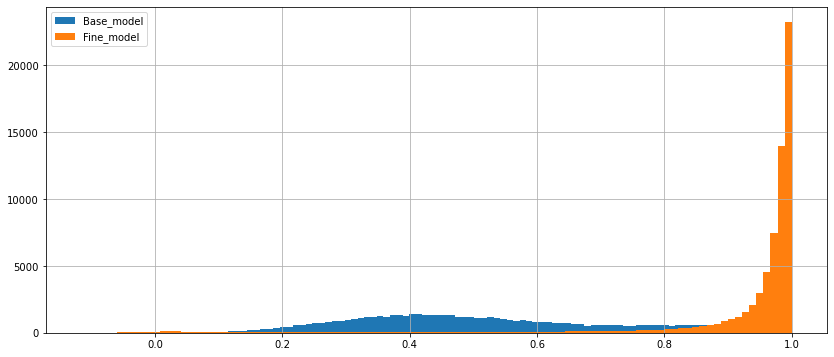

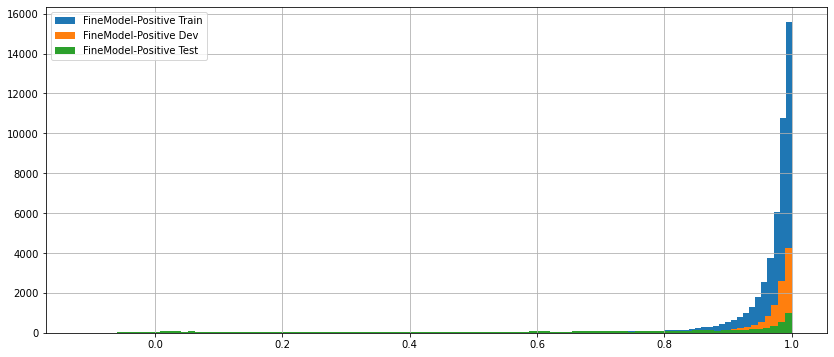

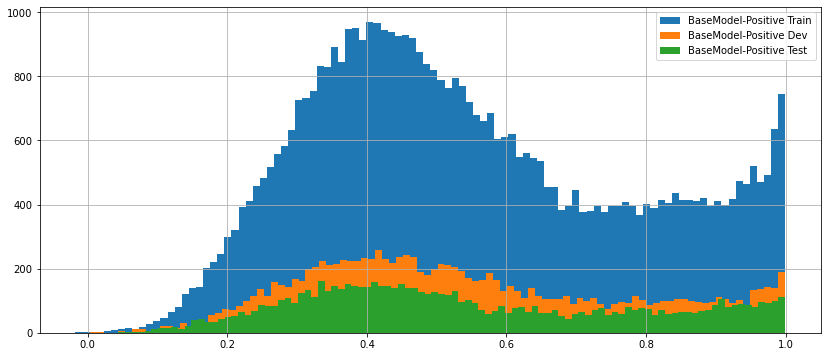

In [40]:
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('sorted_by_diff/positive_all_term_diff.xlsx')


def plot_dist(model):
    step = (np.max(model) - np.min(model))/100
    bin_values = np.arange(start=np.min(model), stop=np.max(model+step), step=step)
    model.hist(bins=bin_values, figsize=[14,6],legend=True)

plot_dist(df['Base_model'])
plot_dist(df['Fine_model'])

plt.figure()
plot_dist(df[df['split']=='train']['Fine_model'])
plot_dist(df[df['split']=='dev']['Fine_model'])
plot_dist(df[df['split']=='test']['Fine_model'])
labels= ["FineModel-Positive Train","FineModel-Positive Dev", "FineModel-Positive Test"]
plt.legend(labels)

plt.figure()
plot_dist(df[df['split']=='train']['Base_model'])
plot_dist(df[df['split']=='dev']['Base_model'])
plot_dist(df[df['split']=='test']['Base_model'])
labels= ["BaseModel-Positive Train","BaseModel-Positive Dev", "BaseModel-Positive Test"]
plt.legend(labels)